In [16]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import seaborn as sns

path = '/Users/stanleynicholson/code/Bjorn/Optimal Transport/OTProject/trajectory_inference/src/wandb'
os.chdir(path)

## early april results
first_folder = 'run-20250402_150034-cipamfdh'
last_folder = 'run-20250405_213636-gzlsabui' # not including this folder
# fixed results
first_folder = 'run-20250416_151943-znh59ox2'
last_folder = 'run-20250416_190818-70g32jwx' # not including this folder
last_folder = 'run-20250419_195556-tdchn8zm'

sorted_folders = sorted(os.listdir())
first_folder_idx = sorted_folders.index(first_folder)
last_folder_idx = sorted_folders.index(last_folder)

folders = sorted_folders[first_folder_idx:last_folder_idx]
print("number of runs", len(folders))

number of runs 737


In [39]:
df = pd.DataFrame()
for folder in folders:
    with open(os.path.join(folder, 'files/wandb-summary.json')) as file:
        output = json.load(file)
    with open(os.path.join(folder, 'files/config.yaml')) as file:
        params = yaml.safe_load(file)
    try:
        params['A_grit_error'] = output['A_grit_final_error']
        params['A_appex_error'] = output['A_appex_final_error']
        params['dim'] = len(output['A'])
        params['folder'] = folder
        # A = np.array(output['A'])
        # A_grit = np.array(output['A_grit'])
        # A_appex = np.array(output['A_appex'])
        # print(A)
        # print(A_grit)
        # print(A_appex)
        # A_grit_error = np.linalg.norm(A - A_grit, ord='fro')
        # A_appex_error = np.linalg.norm(A - A_appex, ord='fro')
        # params['A_grit_error'] = A_grit_error
        # params['A_appex_error'] = A_appex_error
        df = pd.concat([df, pd.DataFrame(params)])
        
    except Exception as e:
        print('A_grit_final_error' in output.keys())
        print(f"Error processing folder {folder}")
        print(f"Error: {e}")
        continue


False
Error processing folder run-20250416_171648-znh59ox2
Error: 'A_grit_final_error'
False
Error processing folder run-20250416_173659-cax78uqf
Error: 'A_grit_final_error'
False
Error processing folder run-20250416_185114-r1gkozvf
Error: 'A_grit_final_error'
False
Error processing folder run-20250416_190346-6de68d66
Error: 'A_grit_final_error'
False
Error processing folder run-20250416_200746-oyw48twf
Error: 'A_grit_final_error'
False
Error processing folder run-20250416_201823-o41hdq1f
Error: 'A_grit_final_error'
False
Error processing folder run-20250417_090502-saj88pcc
Error: 'A_grit_final_error'
False
Error processing folder run-20250417_091449-dlfttylo
Error: 'A_grit_final_error'
False
Error processing folder run-20250417_100430-x33mxi7z
Error: 'A_grit_final_error'
False
Error processing folder run-20250417_100706-6psok8yb
Error: 'A_grit_final_error'
False
Error processing folder run-20250417_100934-wd9jbvfs
Error: 'A_grit_final_error'
False
Error processing folder run-20250417_

In [58]:
As = {}
for folder in df['folder']:
    with open(os.path.join(folder, 'files/wandb-summary.json')) as file:
        output = json.load(file)
        try:
            output['A_grit']['bins']
            continue
        except:
            pass
        try:
            As[folder] = {'A': np.array(output['A']), 
                        'A_grit': np.array(output['A_grit']),
                        'A_appex': np.array(output['A_appex'])}
        except:
            print('A_grit_final_error' in output.keys())
            print(f"Error processing folder {folder}")
            continue

/var/folders/zr/tnch39_n5hx8s_zsx1gqggch0000gn/T/ipykernel_42647/1113674237.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
/var/folders/zr/tnch39_n5hx8s_zsx1gqggch0000gn/T/ipykernel_42647/1113674237.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


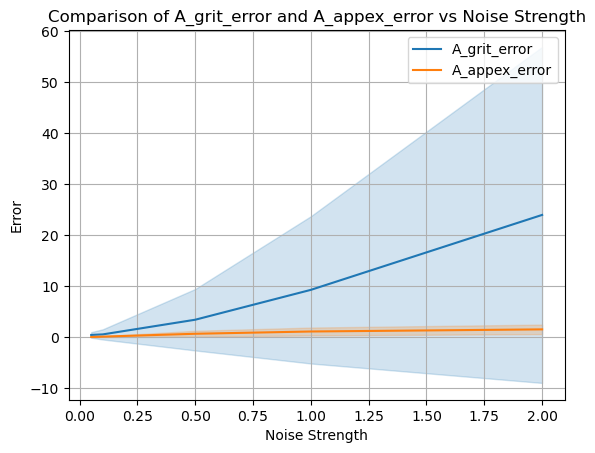

In [60]:
sns.lineplot(
    data=df,
    x="noise_strength",
    y="A_grit_error",
    label="A_grit_error",
    ci="sd",  # Confidence interval around the mean
)
sns.lineplot(
    data=df,
    x="noise_strength",
    y="A_appex_error",
    label="A_appex_error",
    ci="sd",
)
plt.title("Comparison of A_grit_error and A_appex_error vs Noise Strength")
plt.xlabel("Noise Strength")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()

In [62]:
df['dim']

value     2
value     2
value     2
value     2
value     2
         ..
value    10
value    10
value    10
value    10
value    20
Name: dim, Length: 707, dtype: int64

Correlation with A_appex_error:
A_appex_error      1.000000
noise_strength     0.701596
A_grit_error       0.207144
N_init             0.105959
downsample_rate    0.039003
dim               -0.179401
N_sample_scale          NaN
Nt                      NaN
appex_maxiters          NaN
dt                      NaN
Name: A_appex_error, dtype: float64

Correlation with A_grit_error:
A_grit_error       1.000000
noise_strength     0.492402
A_appex_error      0.207144
dim                0.069750
N_init            -0.138773
downsample_rate   -0.371140
N_sample_scale          NaN
Nt                      NaN
appex_maxiters          NaN
dt                      NaN
Name: A_grit_error, dtype: float64


/var/folders/zr/tnch39_n5hx8s_zsx1gqggch0000gn/T/ipykernel_42647/2382747485.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[df['dim'] < 10].corr()


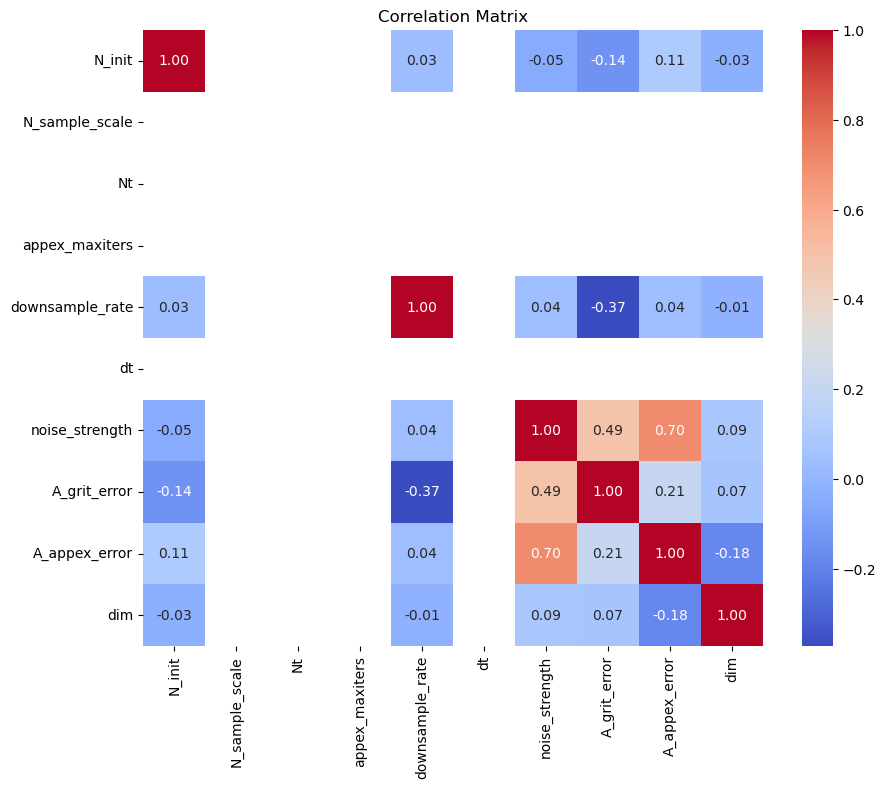

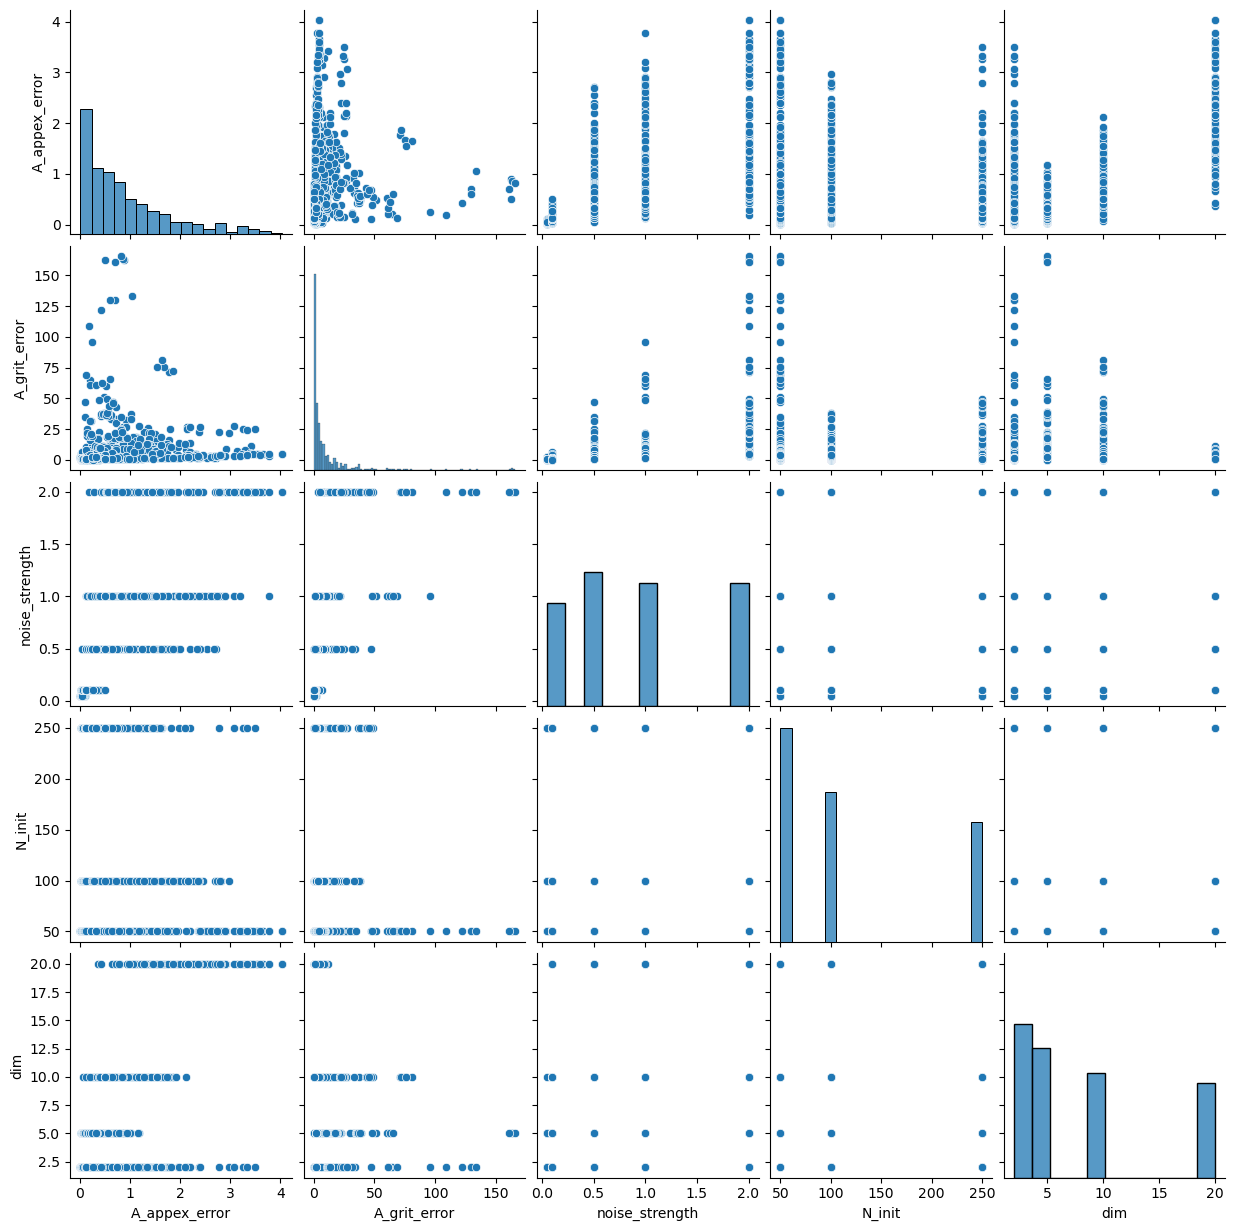

In [63]:
# Correlation analysis
correlation_matrix = df[df['dim'] < 10].corr()
print("Correlation with A_appex_error:")
print(correlation_matrix["A_appex_error"].sort_values(ascending=False))

print("\nCorrelation with A_grit_error:")
print(correlation_matrix["A_grit_error"].sort_values(ascending=False))

# Visualizing correlations with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, vars=["A_appex_error", "A_grit_error", "noise_strength", "N_init", "dim"])
plt.show()

<Axes: xlabel='A_appex_error', ylabel='A_grit_error'>

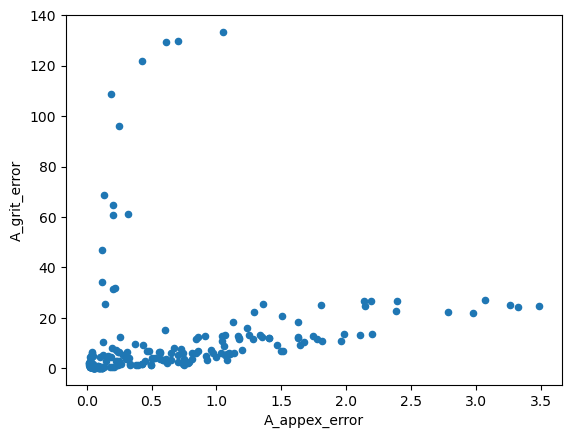

In [66]:
df[(df['dim'] == 2)].plot(x='A_appex_error', y='A_grit_error', kind='scatter')

<Axes: >

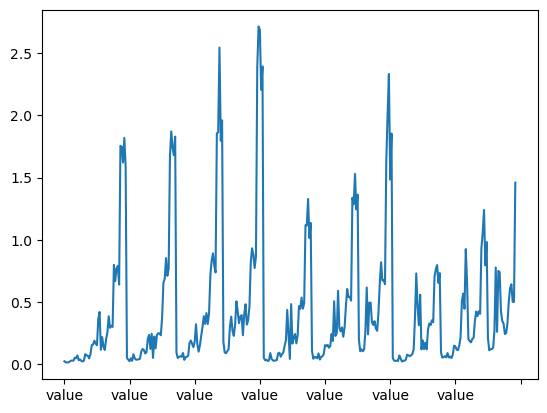

In [74]:
df[df['noise_strength'] < 1.0]['A_appex_error'].plot()

In [ ]:
df[df['dim'] == 5]['A_grit_error'].iloc[40:].plot()
df[df['dim'] == 5]['A_appex_error'].iloc[40:].plot()

/var/folders/zr/tnch39_n5hx8s_zsx1gqggch0000gn/T/ipykernel_42647/273030994.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['noise_strength'] < 1.0][df['dim'] == 5]['A_grit_error'].iloc[40:].plot()


IndexError: indices are out-of-bounds

In [135]:
df[(df['noise_strength'] < 1.0) & (df['dim'] == 5)].head(20)

_wandb  N_init  \
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   
value  {'cli_version': '0.19.8', 'm': [], 'python_ver...      50   

       N_sample_scale     Nt  appex_maxiters  downsample_rate      dt  \
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              100  0.0001   
value               5  15000              20              500  0.0001   
value               5  15000              20              500  0.0001   
value               5  15000              20              500  0.0001   
value               5  15000              20              500  0.0001   
value               5  15000              20              500  0.0001   

       noise_strength  A_grit_error  A_appex_error  dim  \
value            0.05      0.040280       0.028239    5   
value            0.05      0.025634       0.029979    5   
value            0.05      0.027237       0.029193    5   
value            0.05      0.044423       0.053217    5   
value            0.05      0.044129       0.048362    5   
value            0.10      0.148423       0.081466    5   
value            0.10      0.258744       0.071426    5   
value            0.10      0.259784       0.068921    5   
value            0.10      0.229995       0.047242    5   
value            0.10      0.444069       0.081201    5   
value            0.50     14.123954       0.256037    5   
value            0.50     22.809257       0.385649    5   
value            0.50     17.444242       0.293018    5   
value            0.50     16.388497       0.308996    5   
value            0.50     17.967262       0.300254    5   
value            0.05      0.031116       0.080910    5   
value            0.10      0.062090       0.101776    5   
value            0.10    

<Axes: >

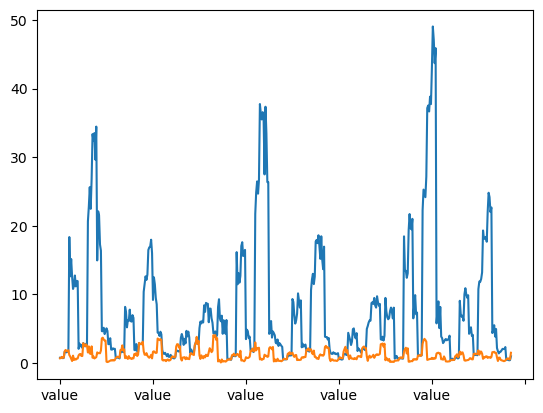

In [155]:
df[(df['noise_strength'] >= 0.5)]['A_grit_error'].iloc[70:].plot()
df[(df['noise_strength'] >= 0.5)]['A_appex_error'].iloc[70:].plot()

<Axes: >

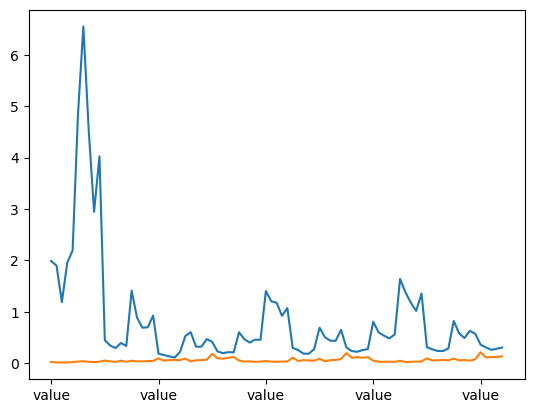

In [151]:
df[(df['noise_strength'] < 0.5) & (df['dim'] == 2)]['A_grit_error'].plot()
df[(df['noise_strength'] < 0.5) & (df['dim'] == 2)]['A_appex_error'].plot()

In [162]:
df[df['noise_strength'] < 1.0].iloc[94]

_wandb             {'cli_version': '0.19.8', 'm': [], 'python_ver...
N_init                                                            50
N_sample_scale                                                     5
Nt                                                             15000
appex_maxiters                                                    20
downsample_rate                                                 1000
dt                                                            0.0001
noise_strength                                                   0.1
A_grit_error                                                0.321704
A_appex_error                                               0.060637
dim                                                                2
folder                                  run-20250416_201120-o41hdq1f
Name: value, dtype: object

In [163]:
df[df['noise_strength'] < 1.0]['A_grit_error'].iloc[70:]

value    5.427540
value    3.428240
value    2.761091
value    3.229328
value    3.627839
           ...   
value    0.446771
value    0.492347
value    0.359589
value    0.387326
value    0.945281
Name: A_grit_error, Length: 277, dtype: float64

<Axes: title={'center': 'Appex Error vs Noise Strength'}, xlabel='Noise Strength', ylabel='AppEx Error'>

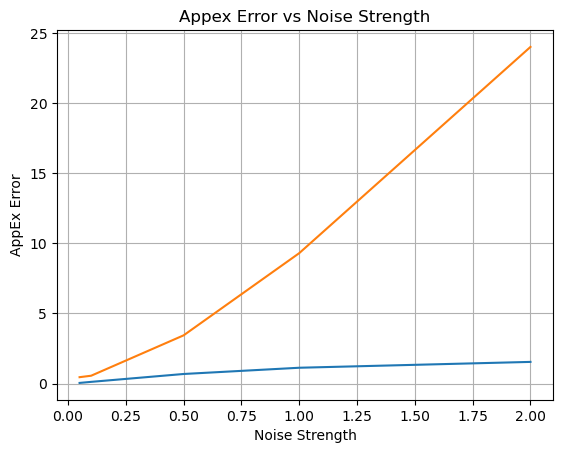

In [ ]:
df["A_appex_error"].groupby(df['noise_strength']).iloc[40:].mean().plot(title="Appex Error vs Noise Strength", ylabel="AppEx Error", xlabel="Noise Strength", grid=True)
df["A_grit_error"].groupby(df['noise_strength']).mean().plot(title="Appex Error vs Noise Strength", ylabel="AppEx Error", xlabel="Noise Strength", grid=True)
# df["A_grit_error"].groupby(df['noise_strength']).plot()

In [180]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    df,
    x="A_appex_error",
    y="A_grit_error",
    title="Interactive Scatter Plot of A_appex_error vs A_grit_error",
    labels={"A_appex_error": "A_appex Error", "A_grit_error": "A_grit Error"},
    hover_data=["noise_strength", "dim"],
    color="dim",
)

fig.show()

In [181]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    df,
    x="A_appex_error",
    y="A_grit_error",
    title="Interactive Scatter Plot of A_appex_error vs A_grit_error",
    labels={"A_appex_error": "A_appex Error", "A_grit_error": "A_grit Error"},
    hover_data=["noise_strength", "dim"],
    color="noise_strength",
)

fig.show()

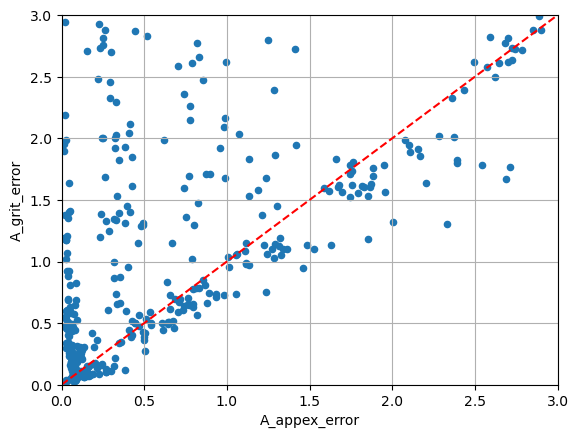

In [174]:
upperbound = 3
df.plot(x='A_appex_error', y='A_grit_error', kind='scatter'), plt.ylim(0, upperbound), plt.xlim(0, upperbound), plt.grid()
plt.plot([0, upperbound], [0, upperbound], color='red', linestyle='--')

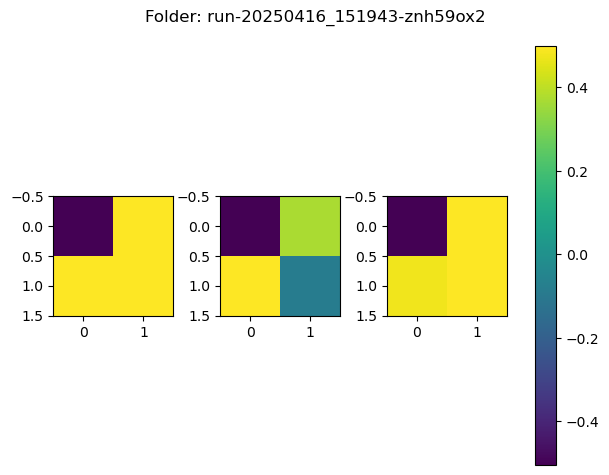

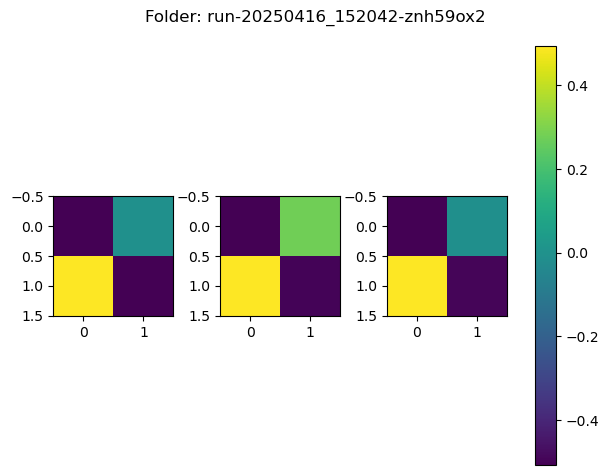

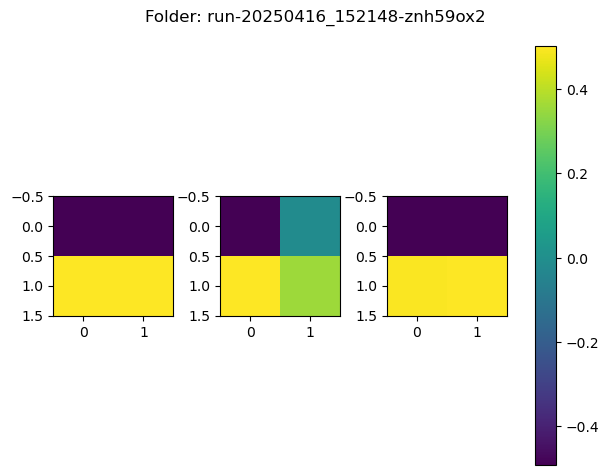

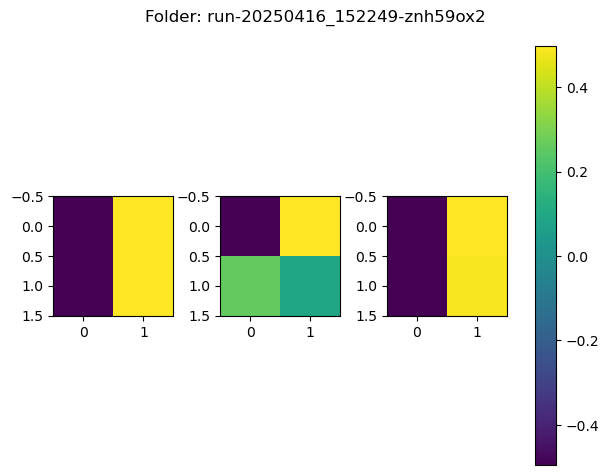

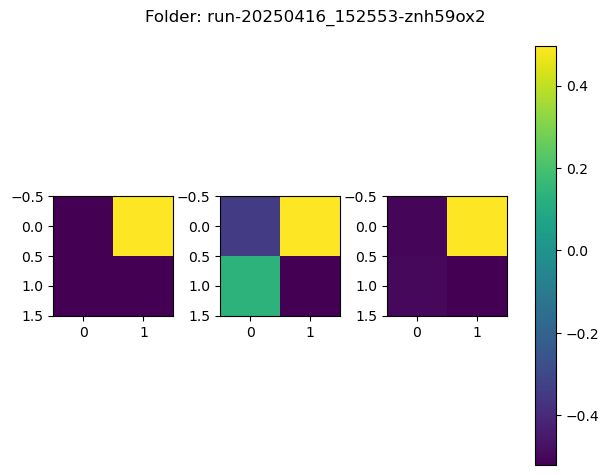

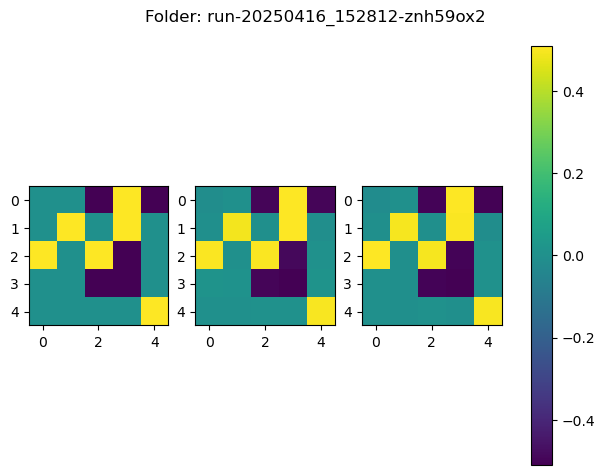

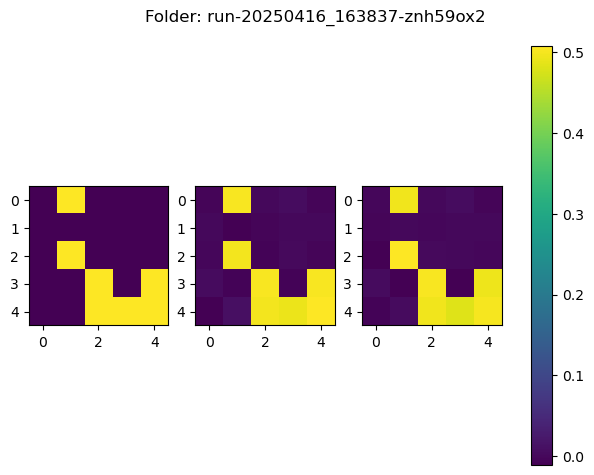

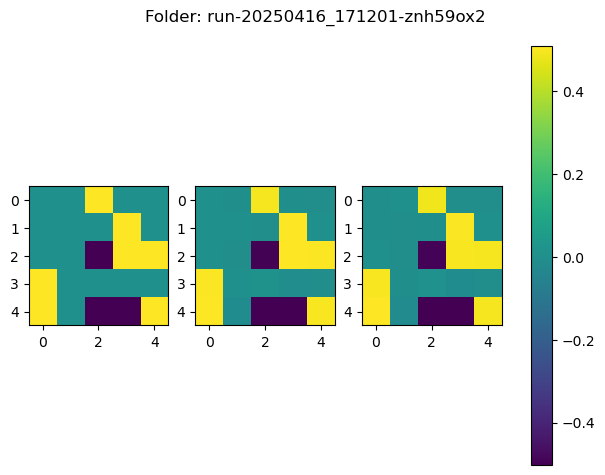

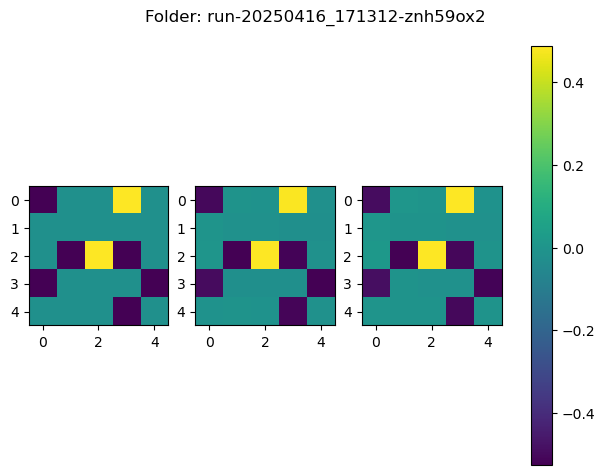

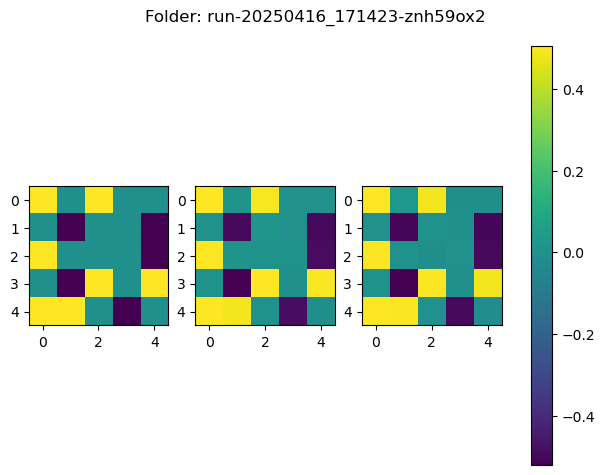

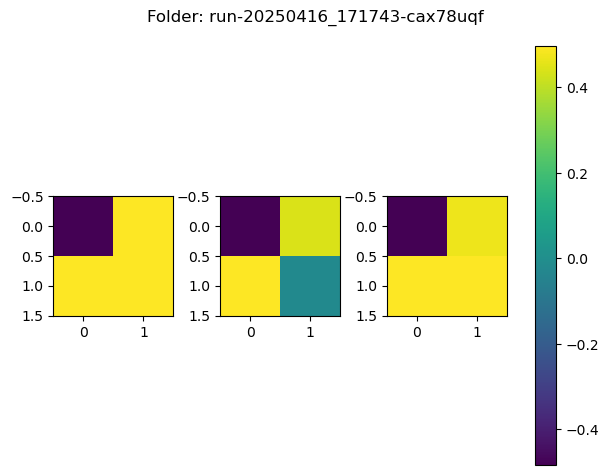

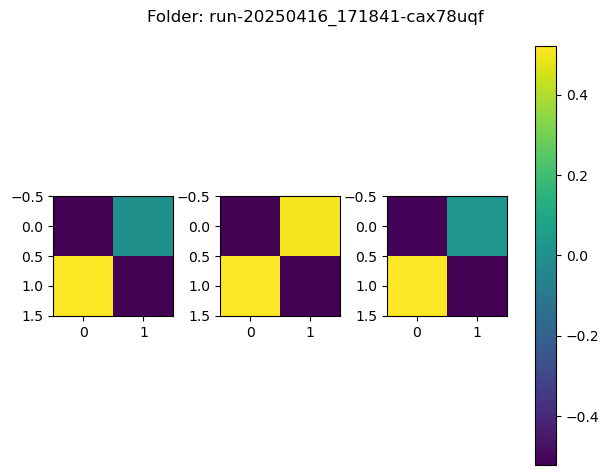

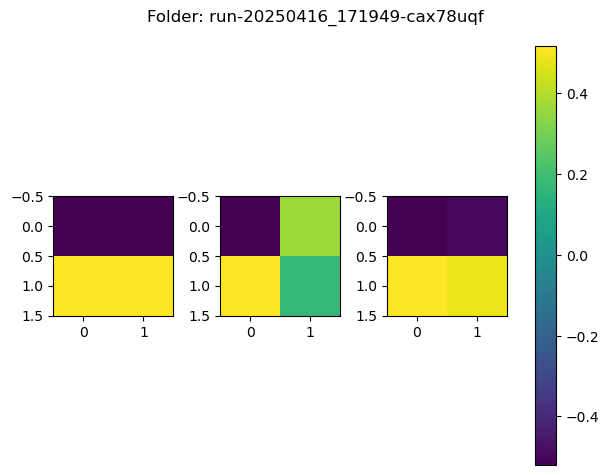

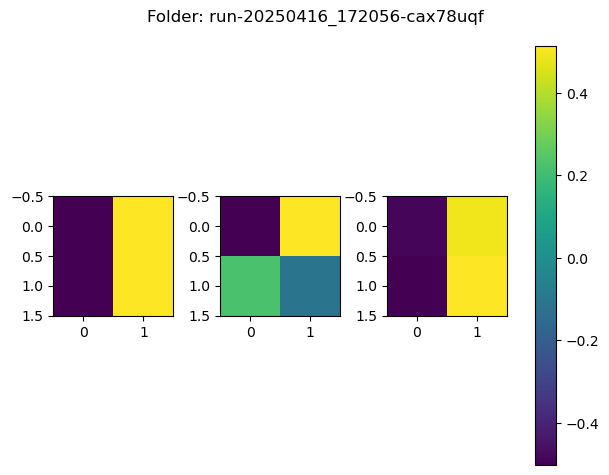

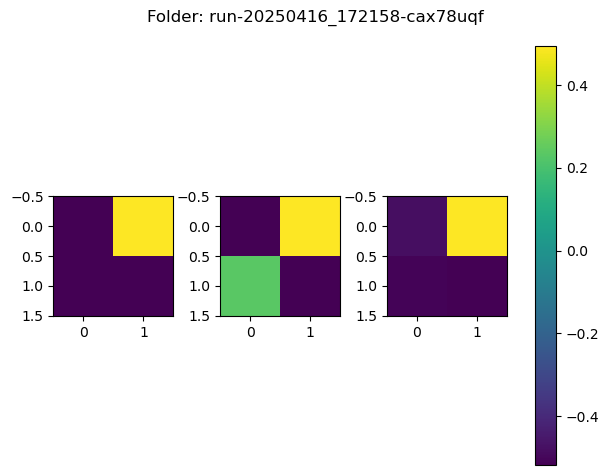

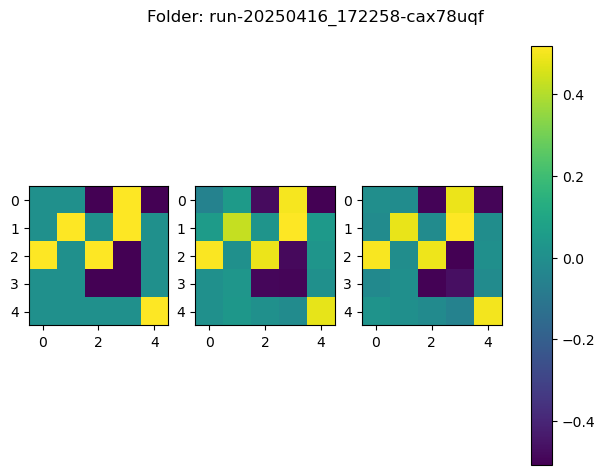

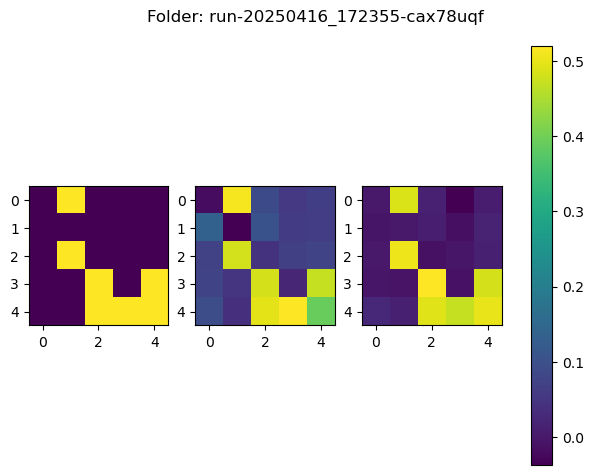

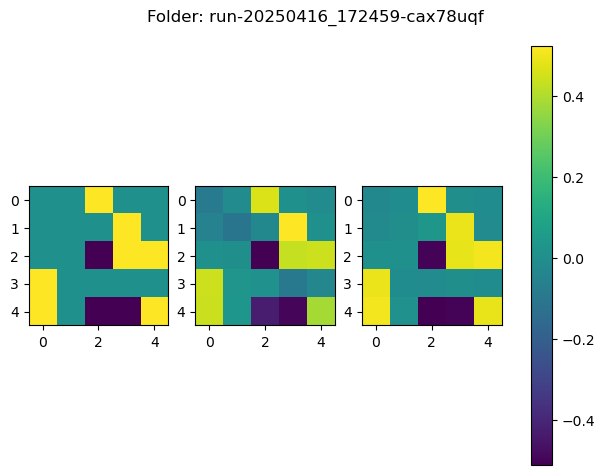

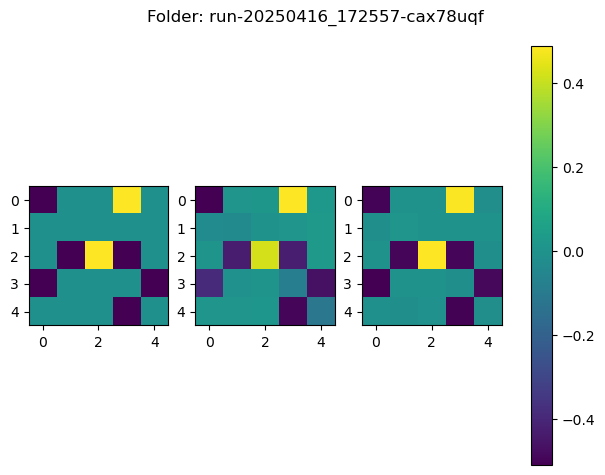

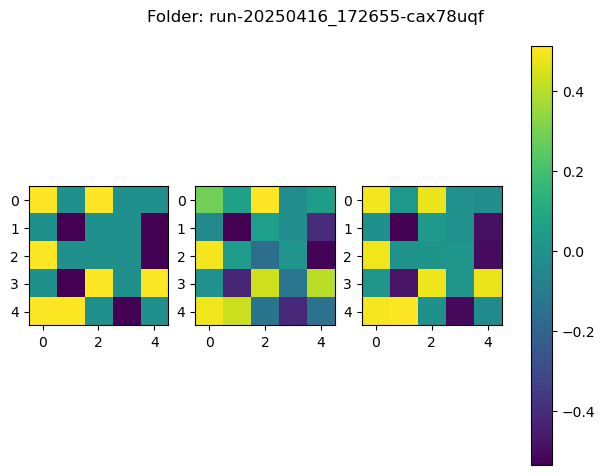

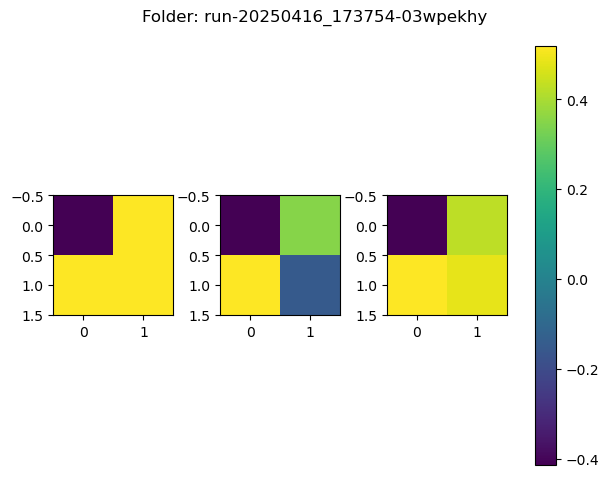

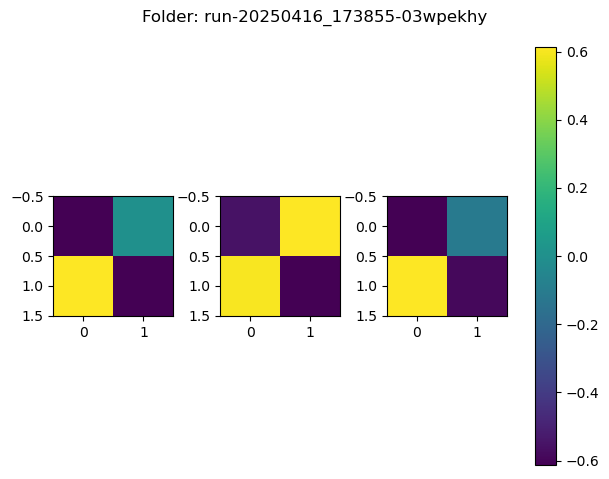

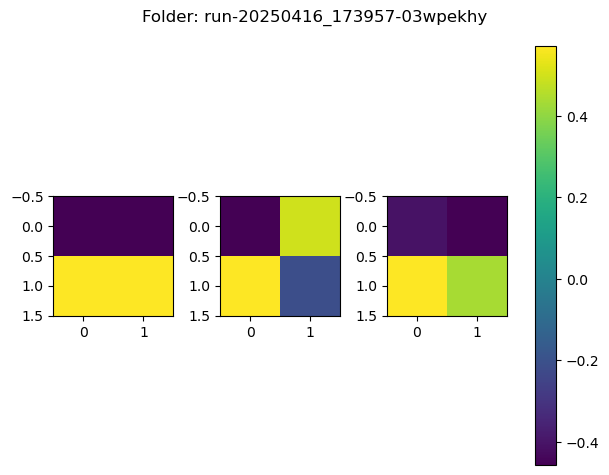

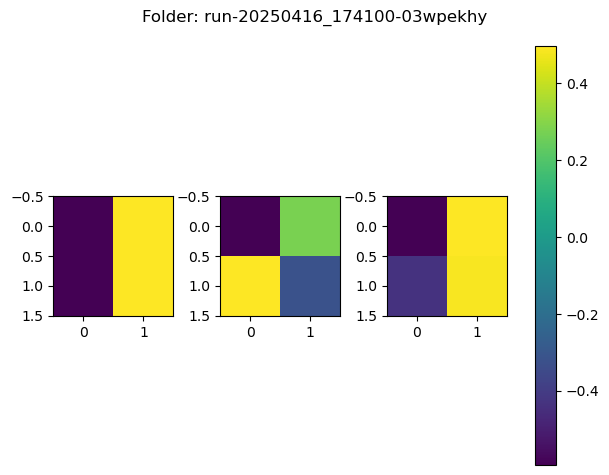

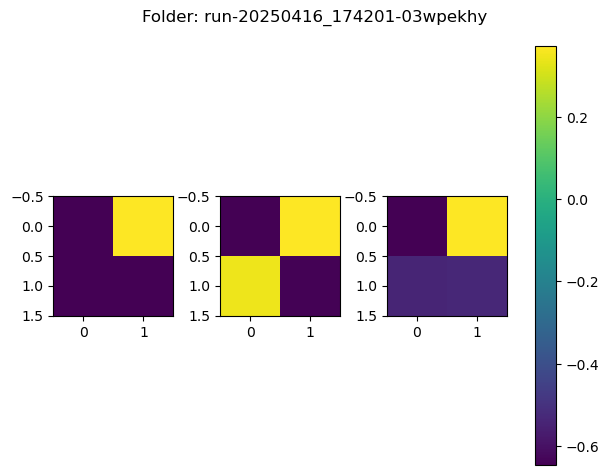

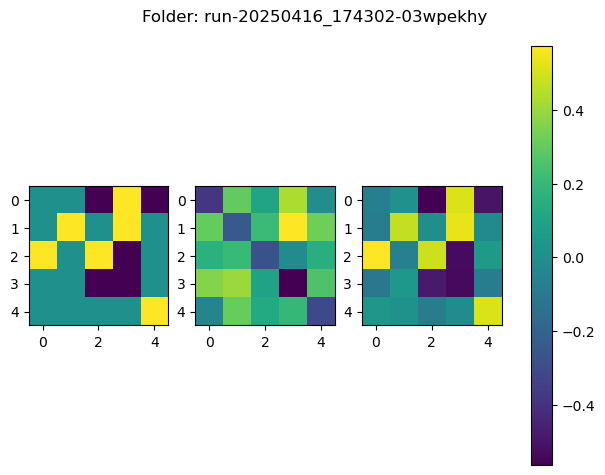

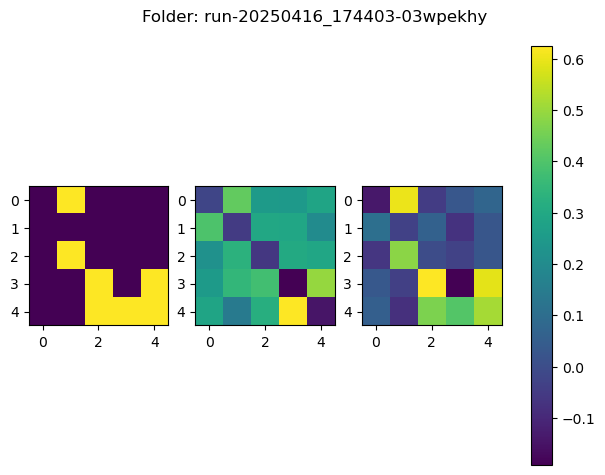

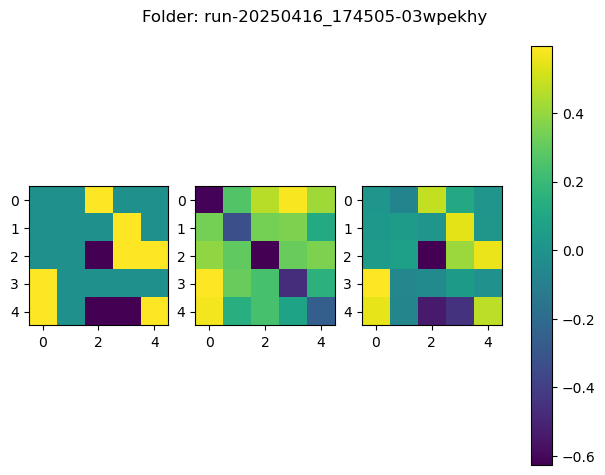

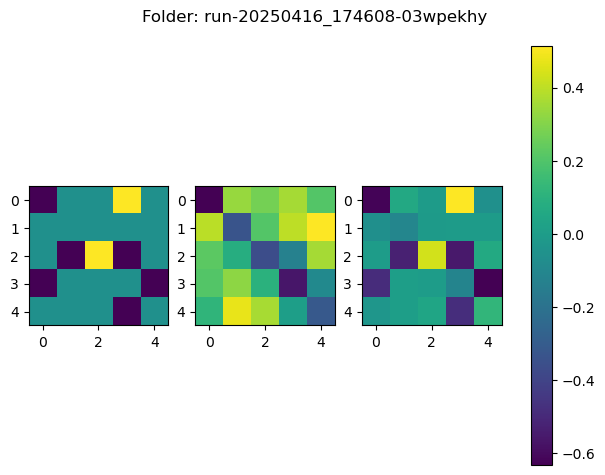

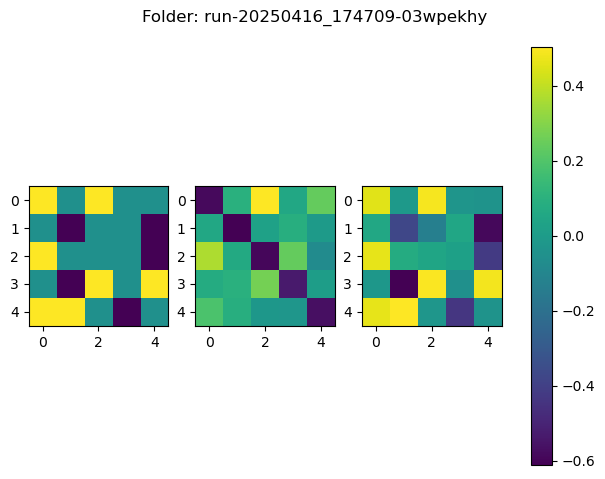

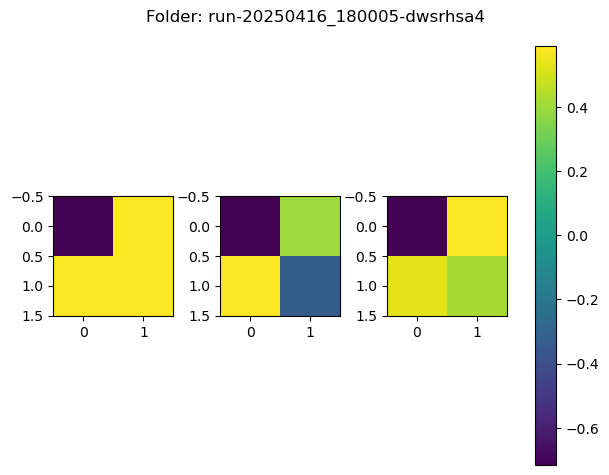

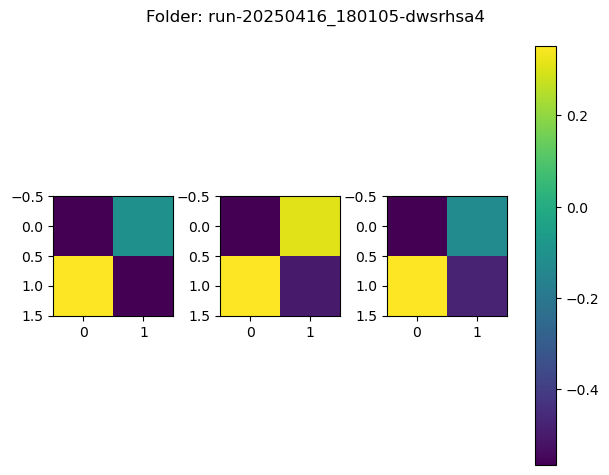

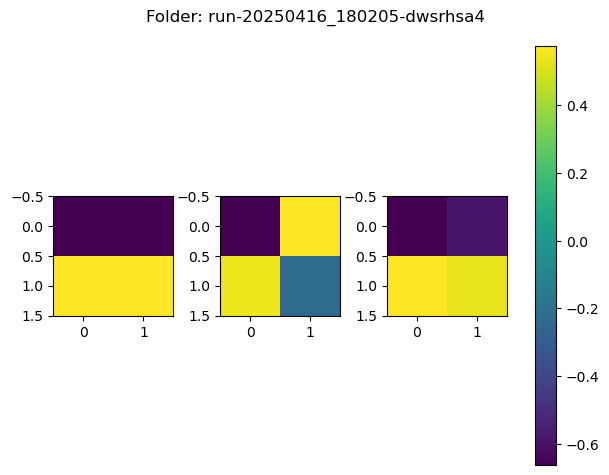

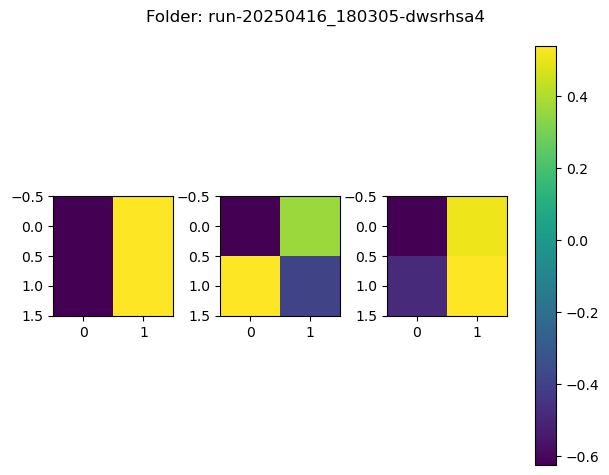

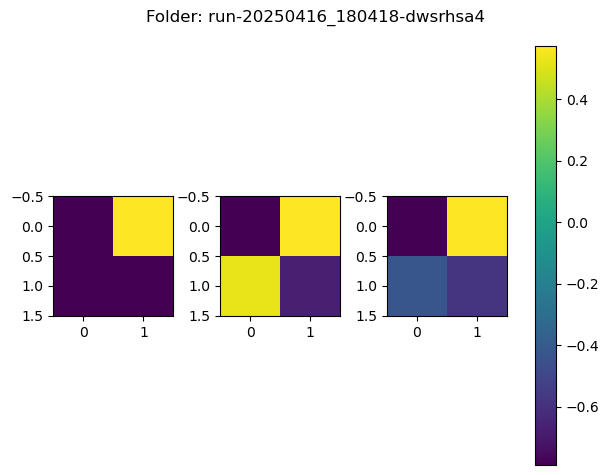

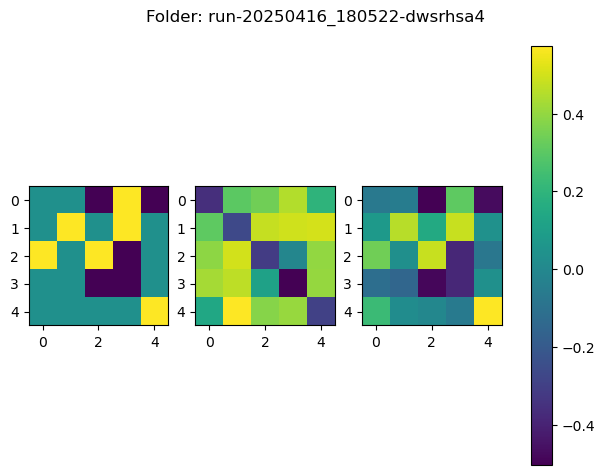

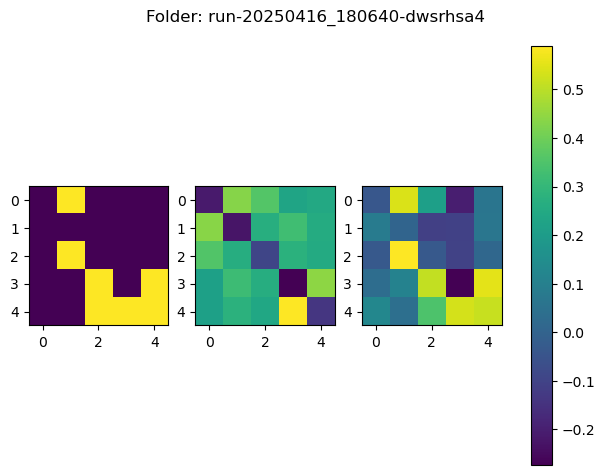

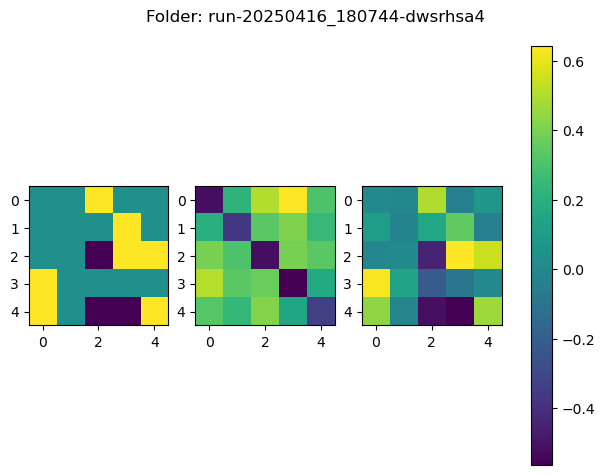

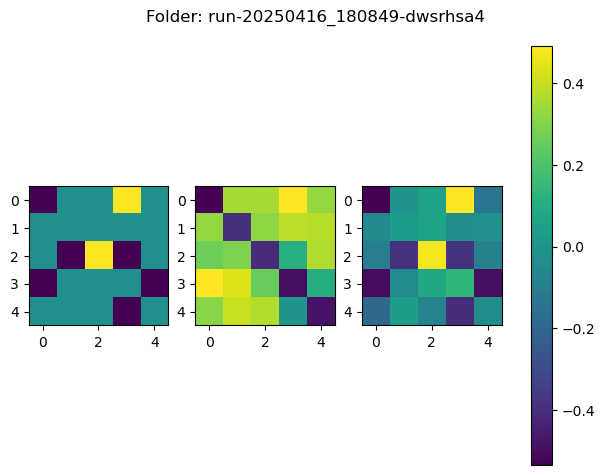

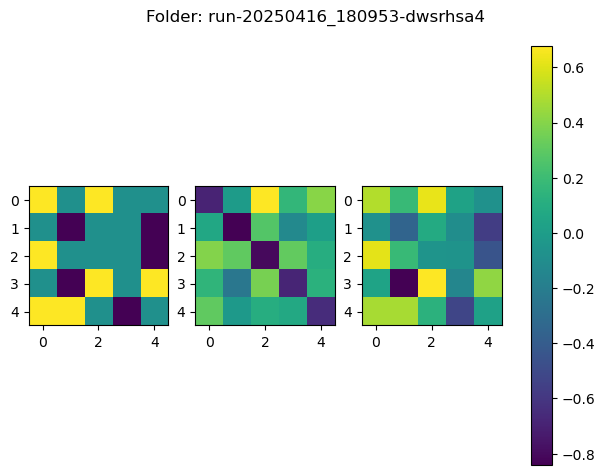

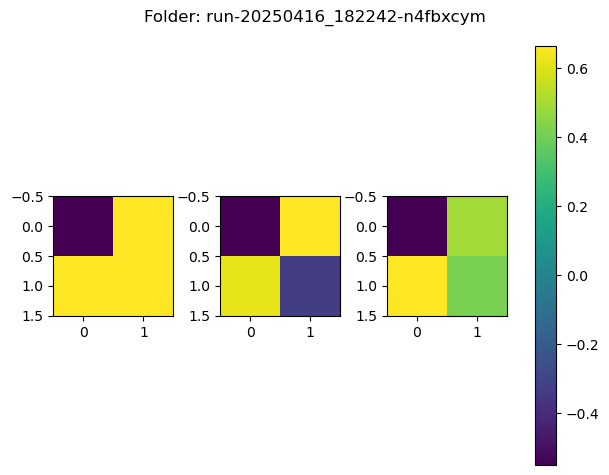

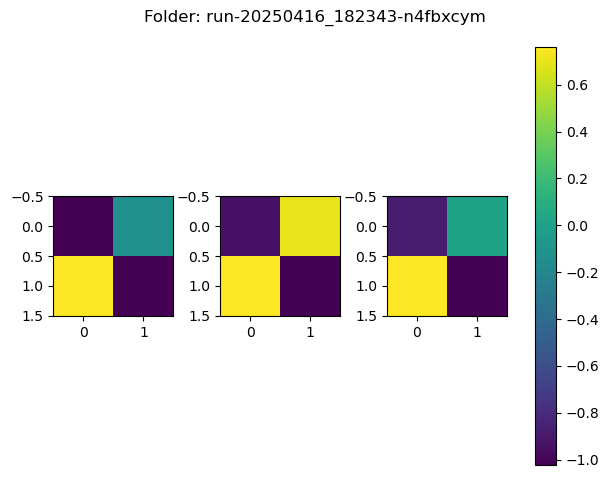

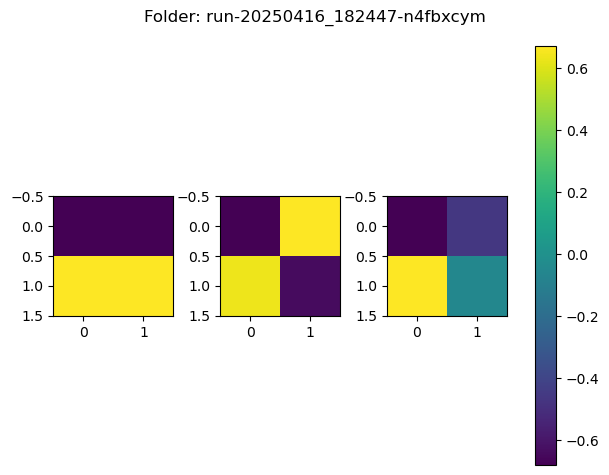

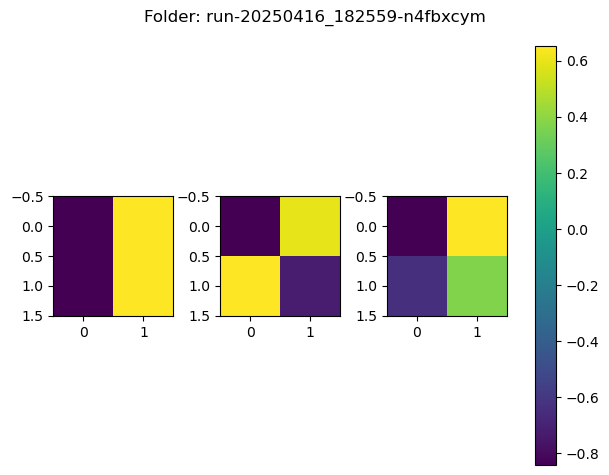

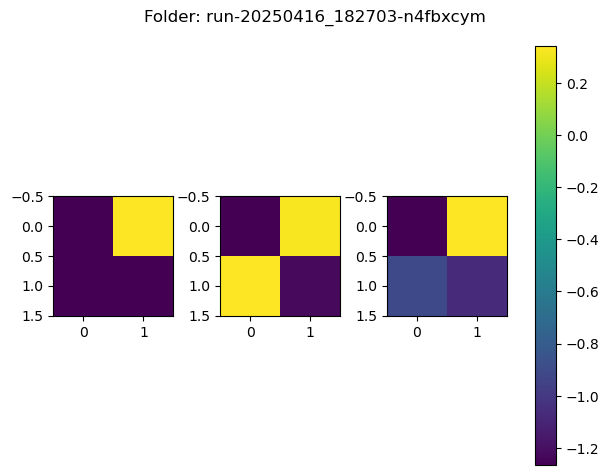

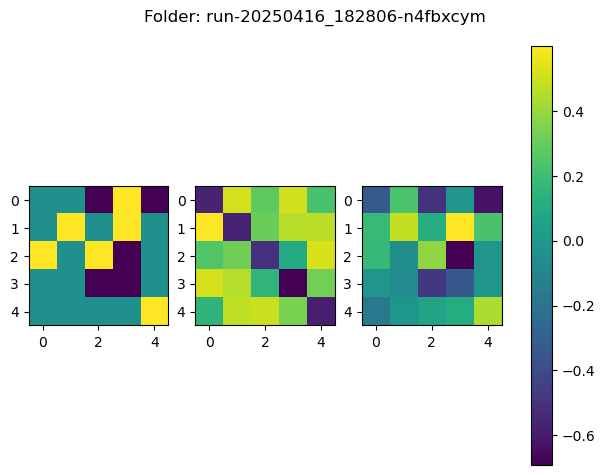

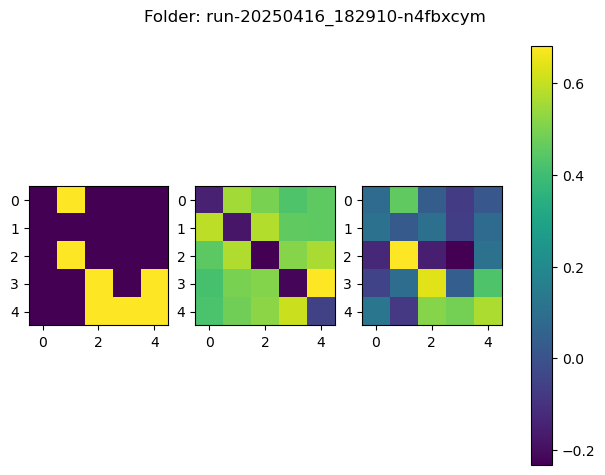

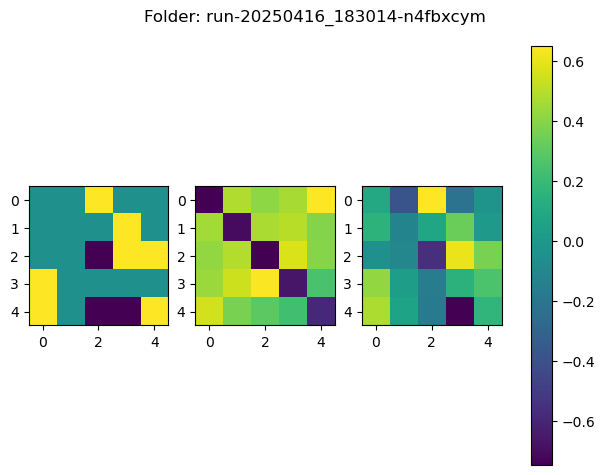

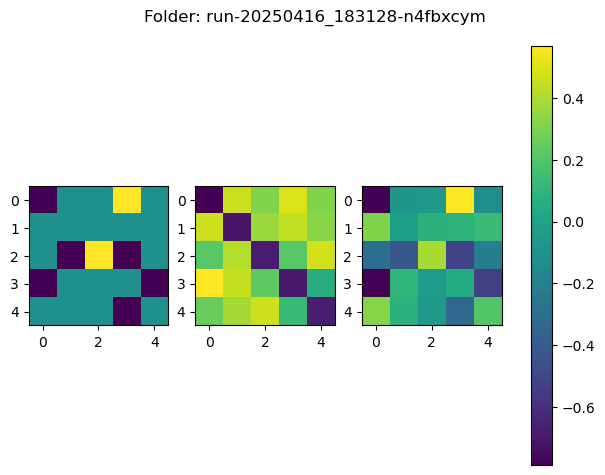

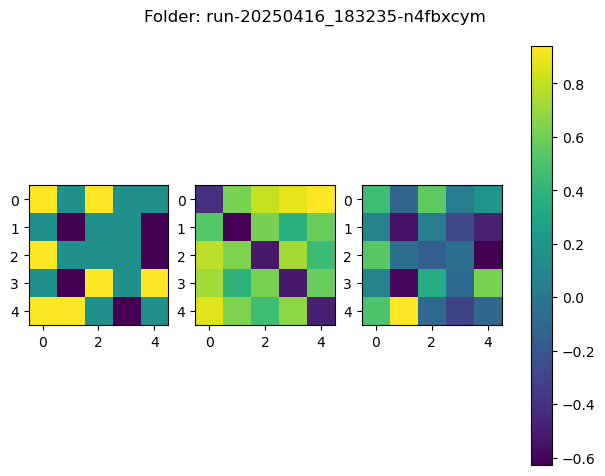

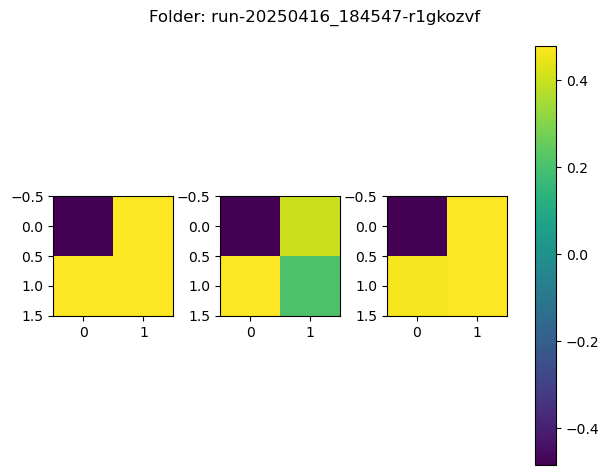

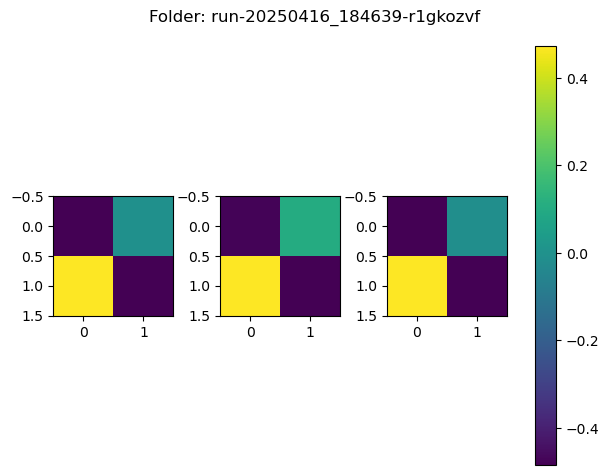

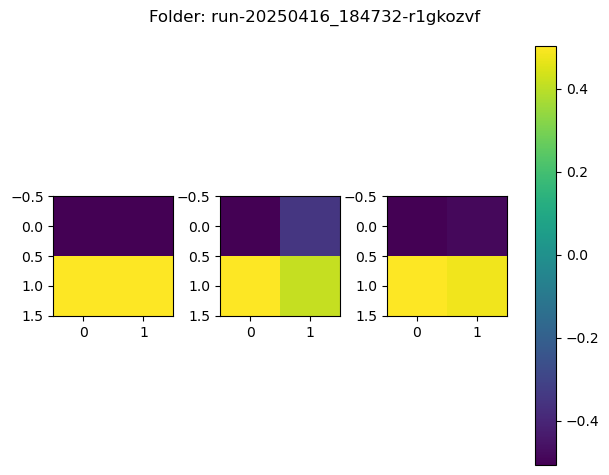

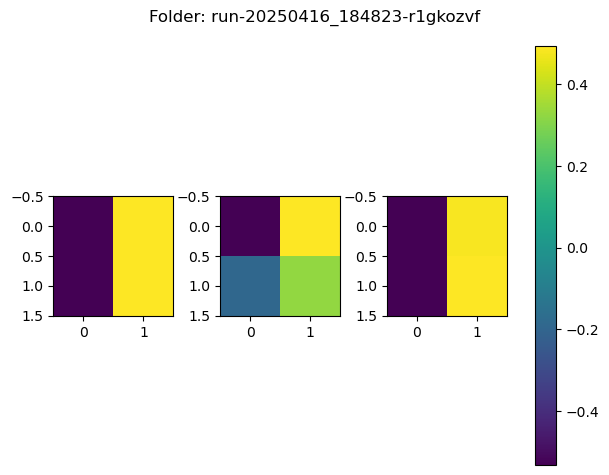

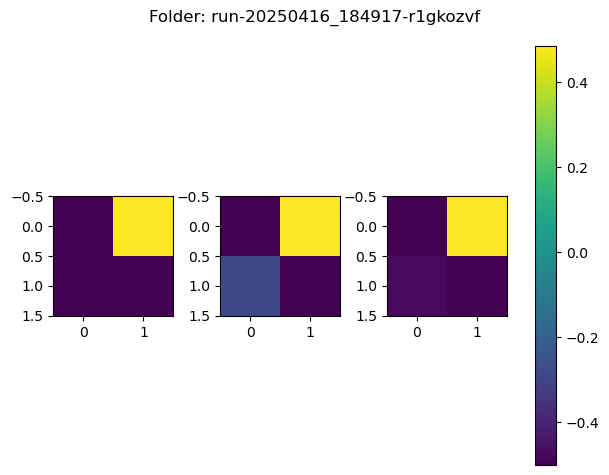

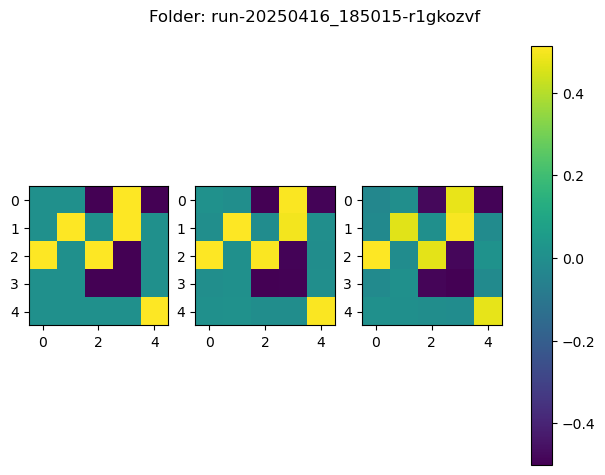

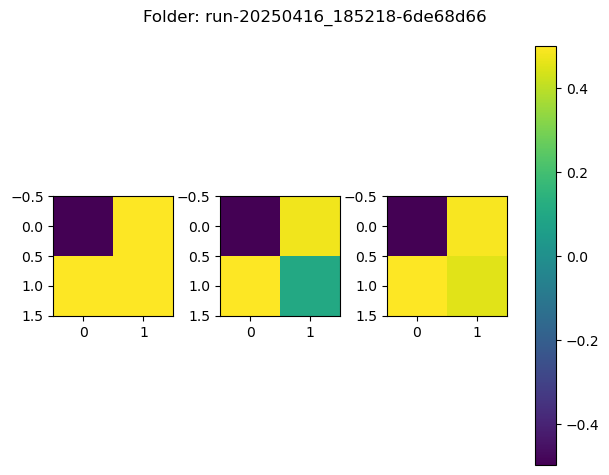

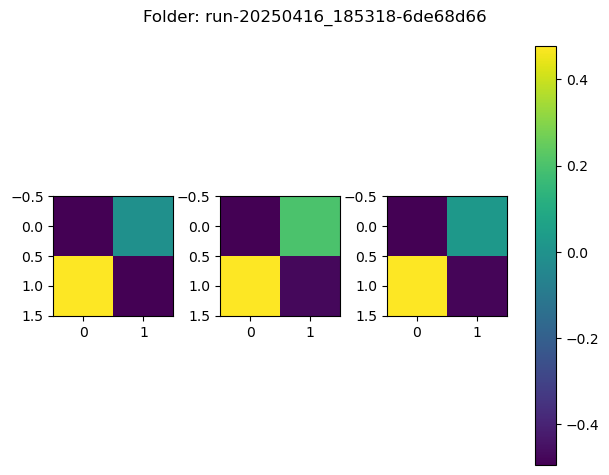

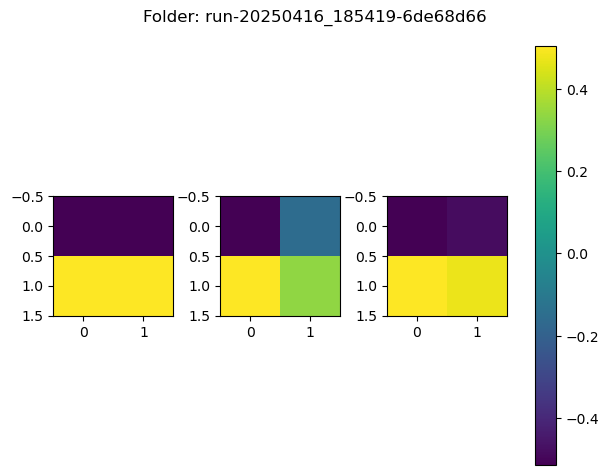

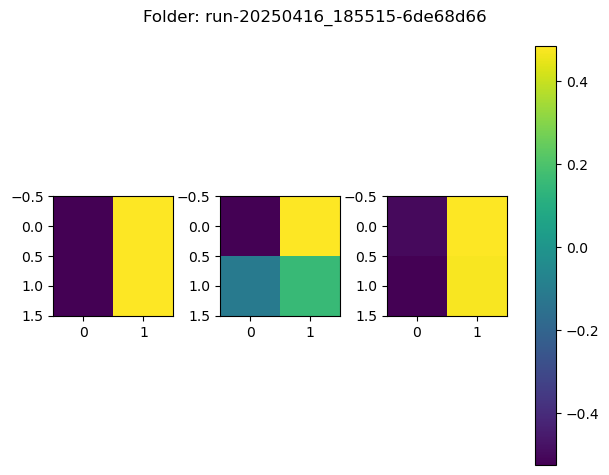

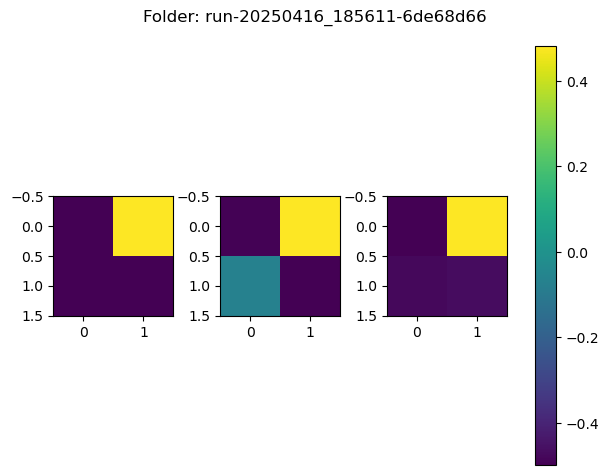

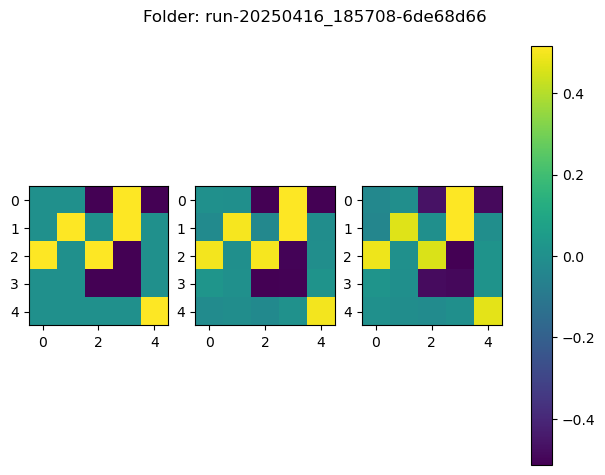

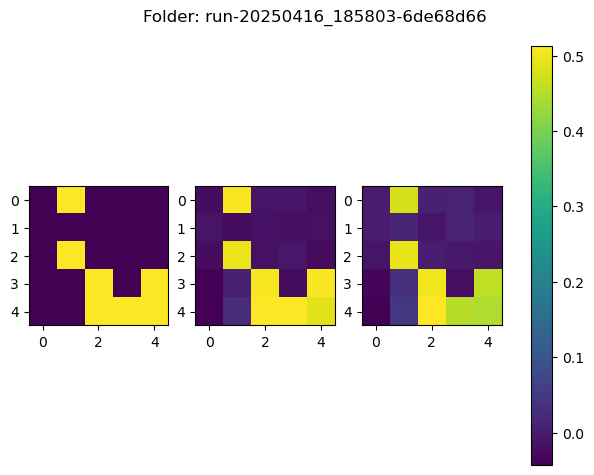

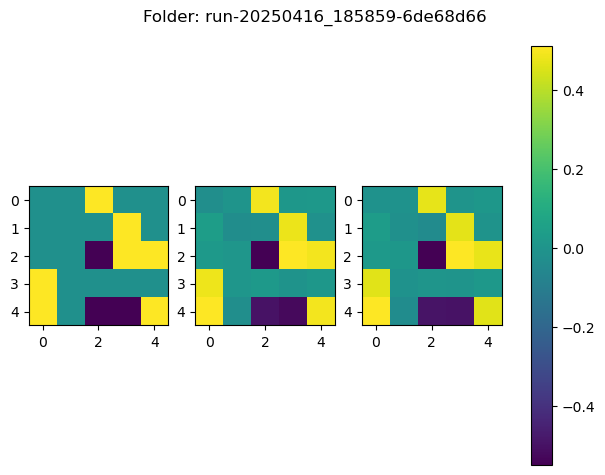

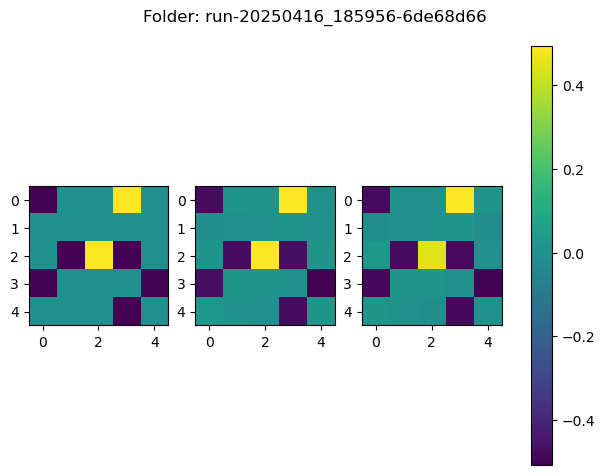

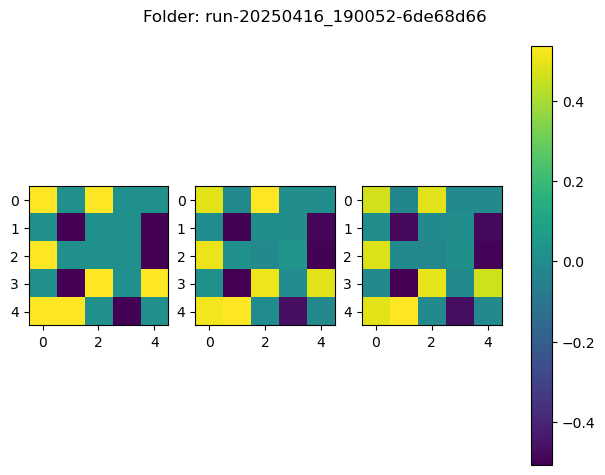

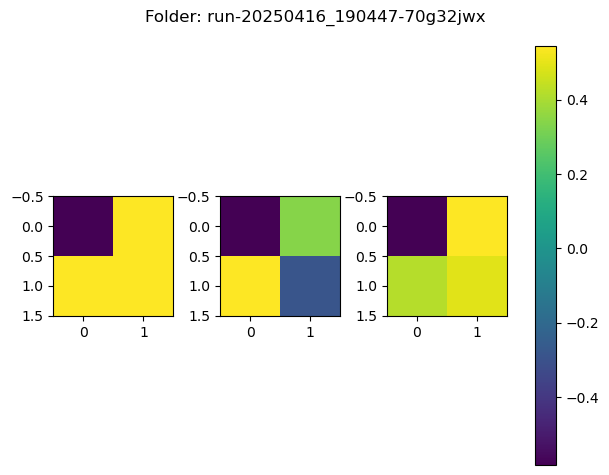

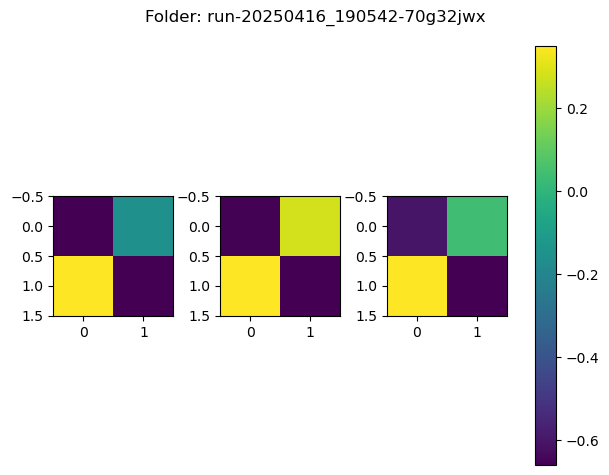

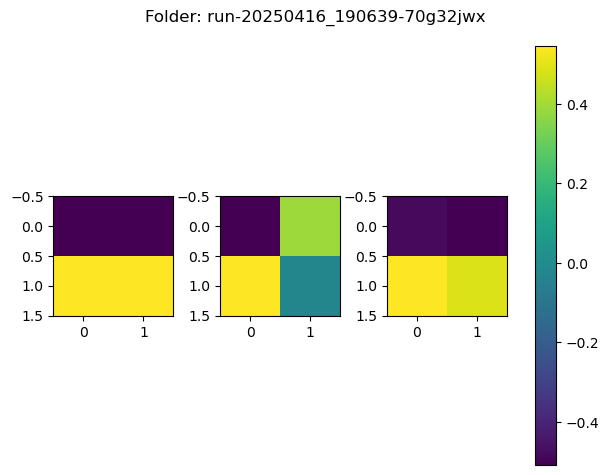

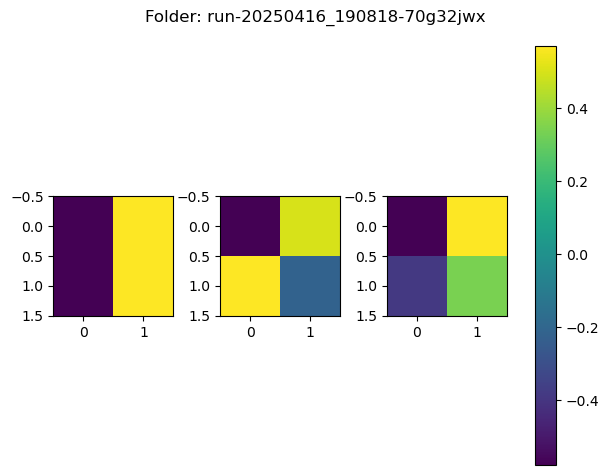

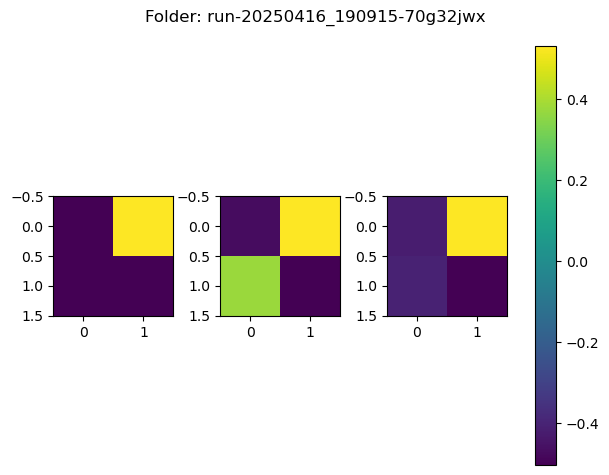

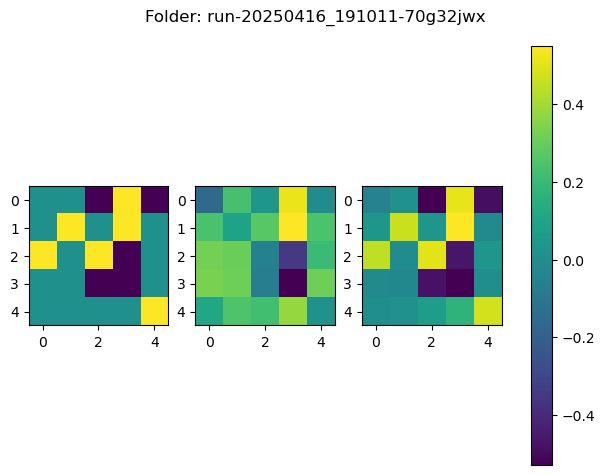

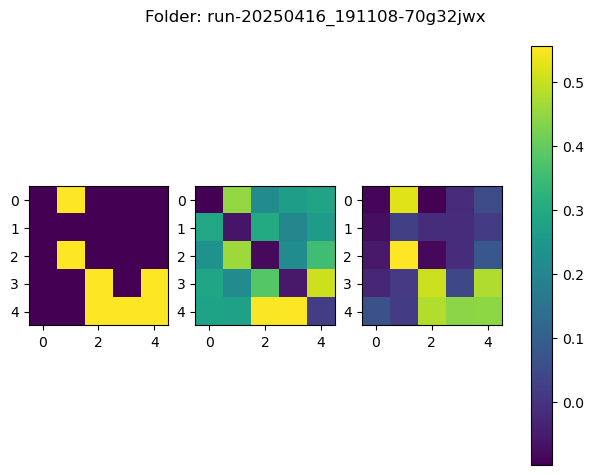

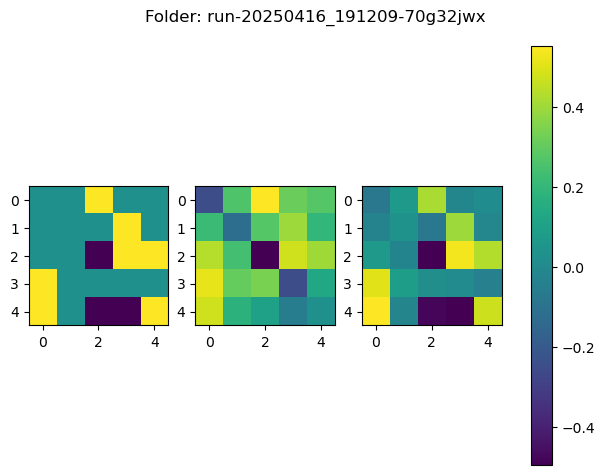

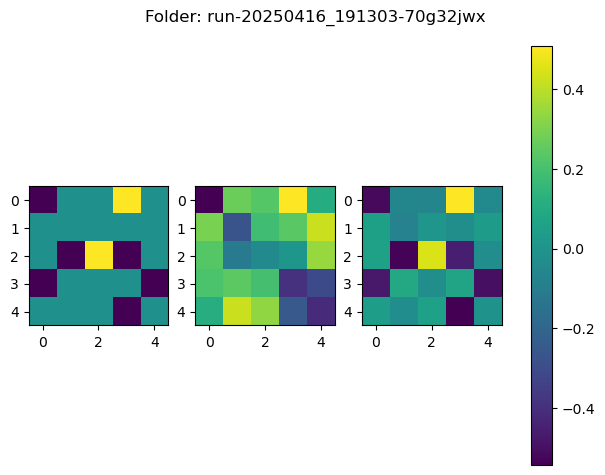

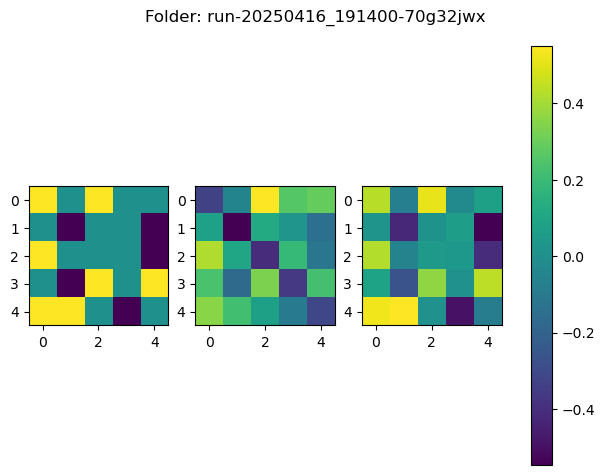

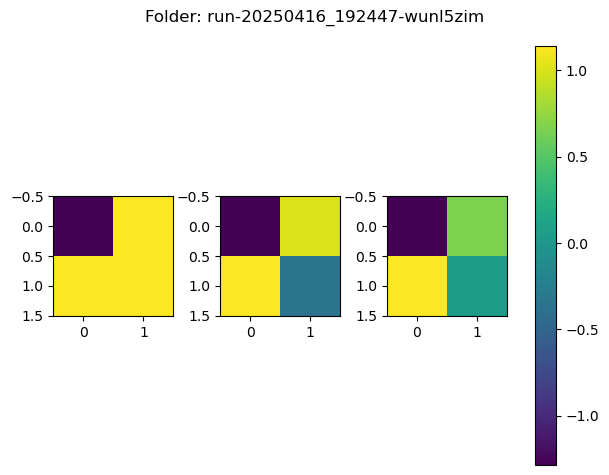

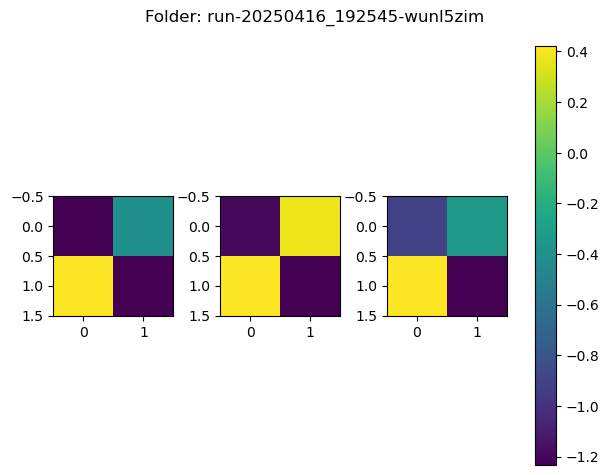

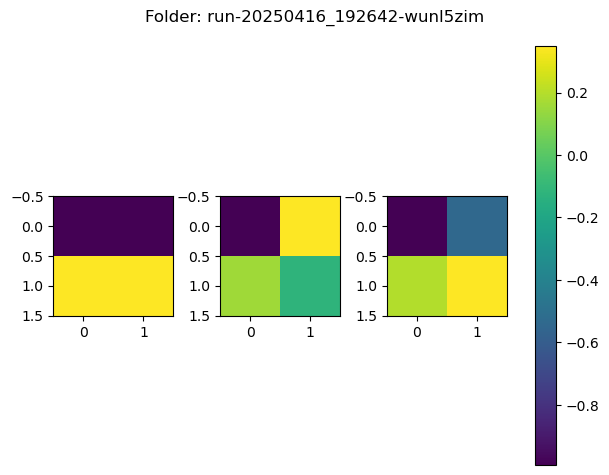

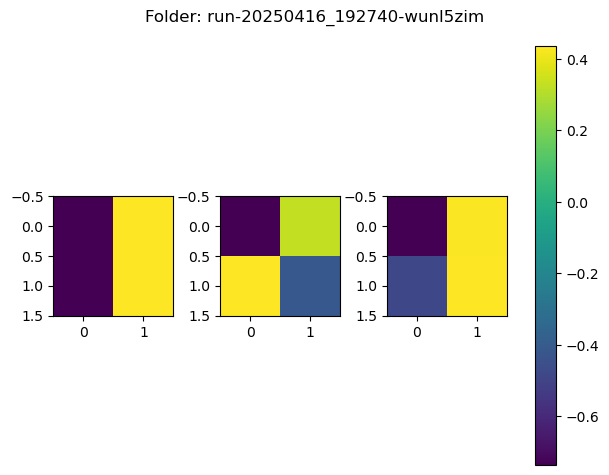

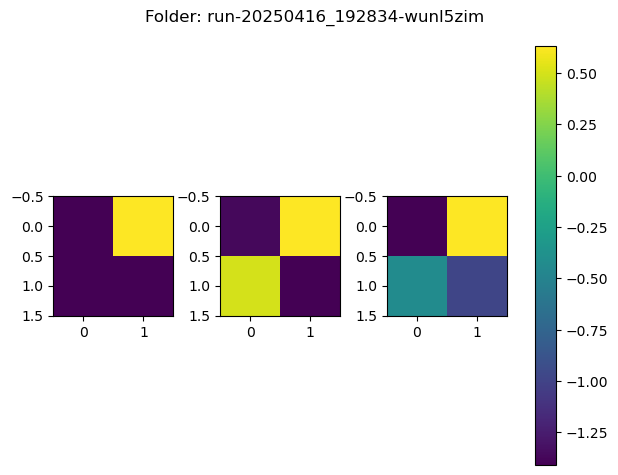

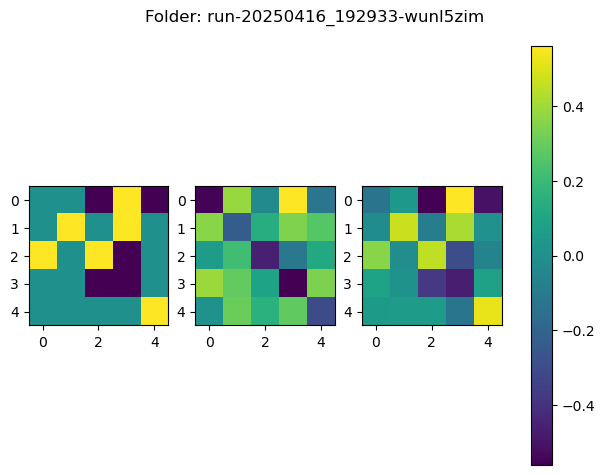

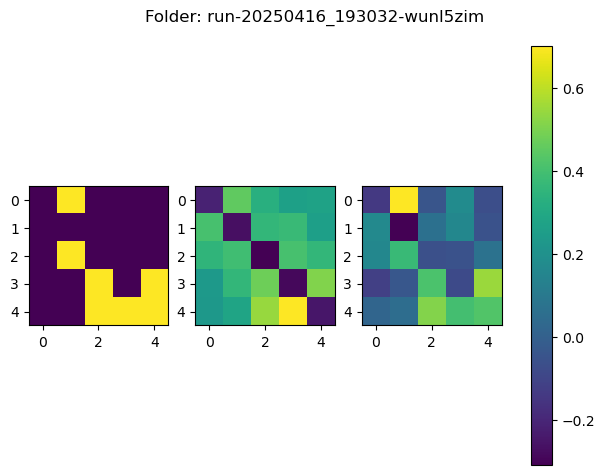

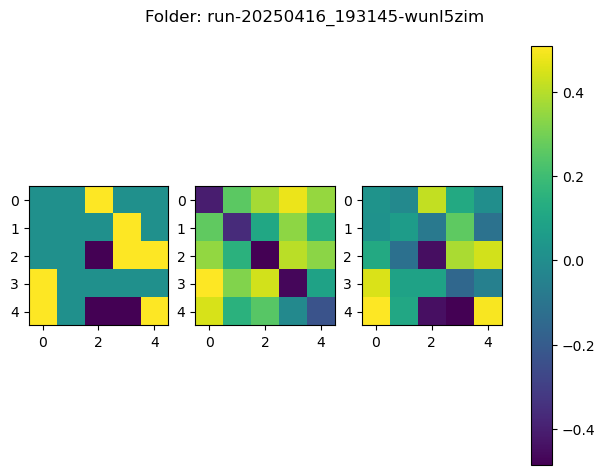

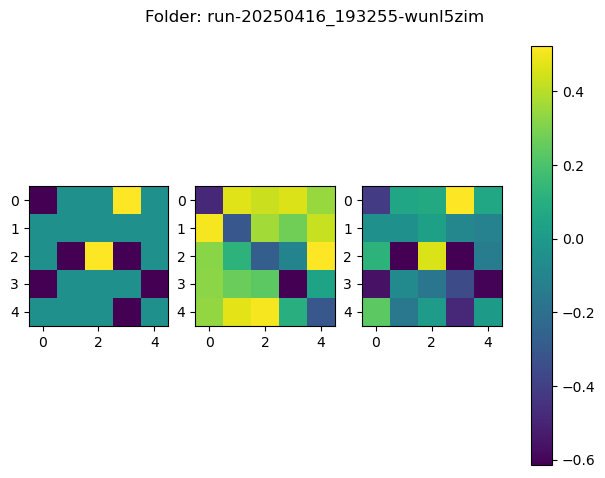

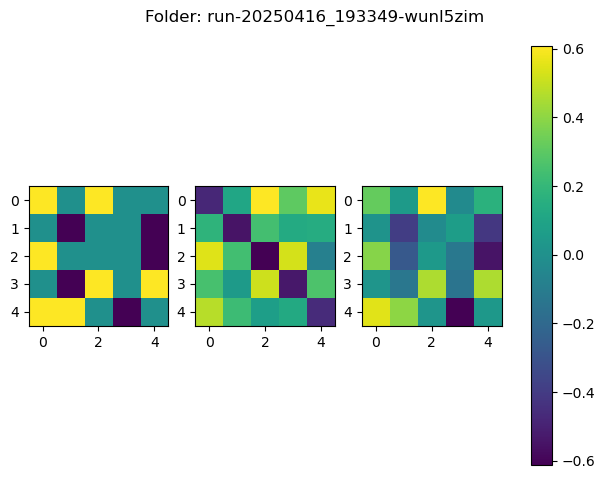

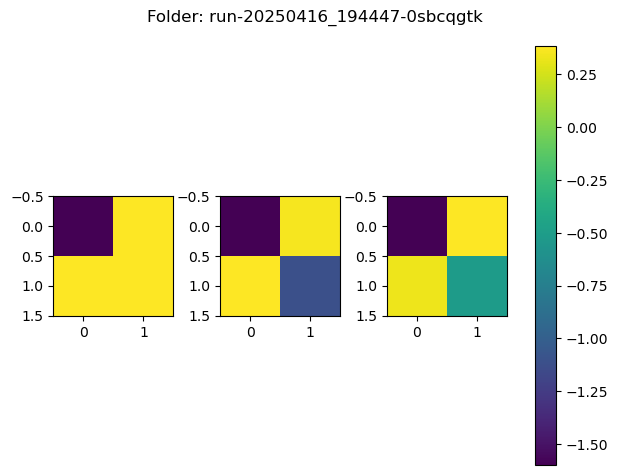

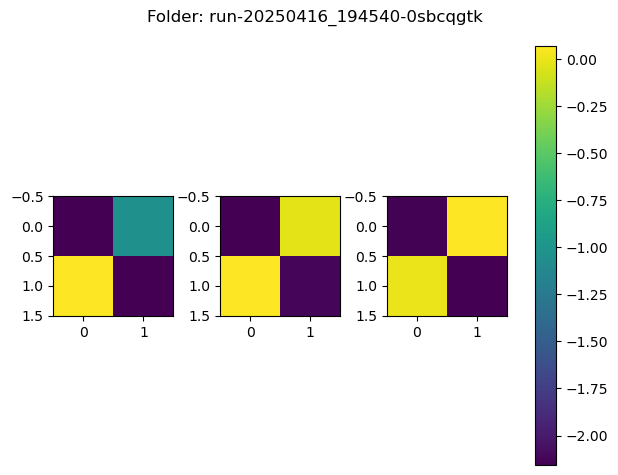

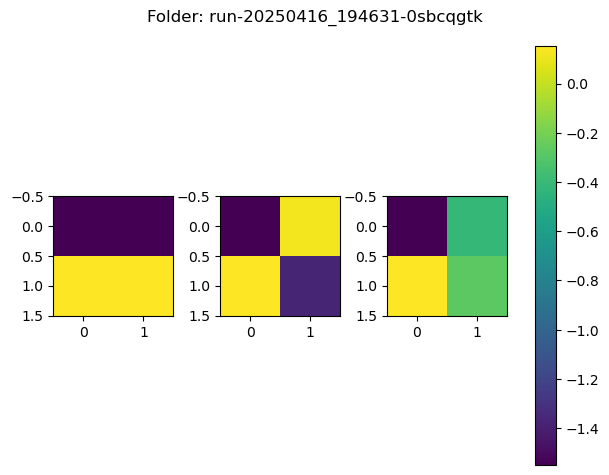

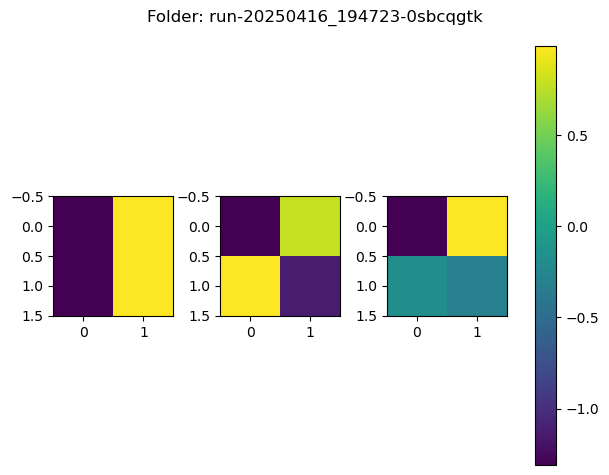

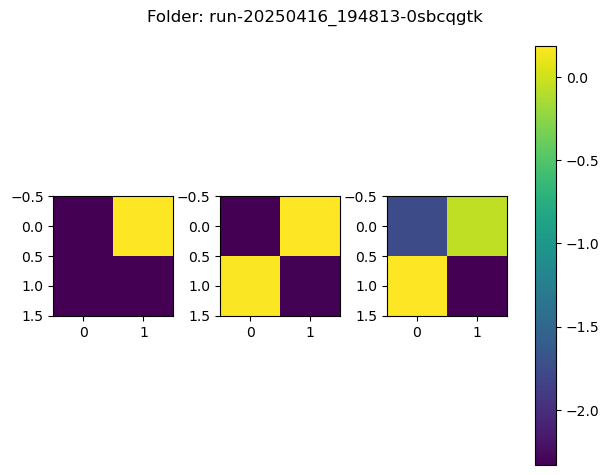

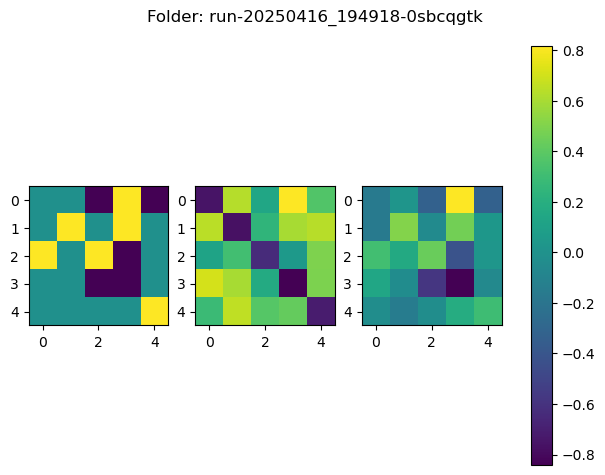

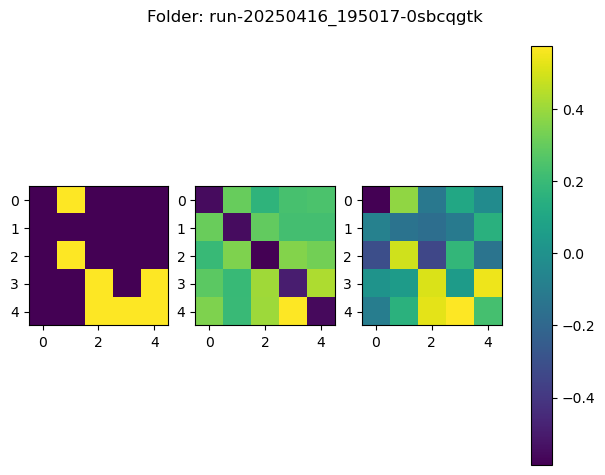

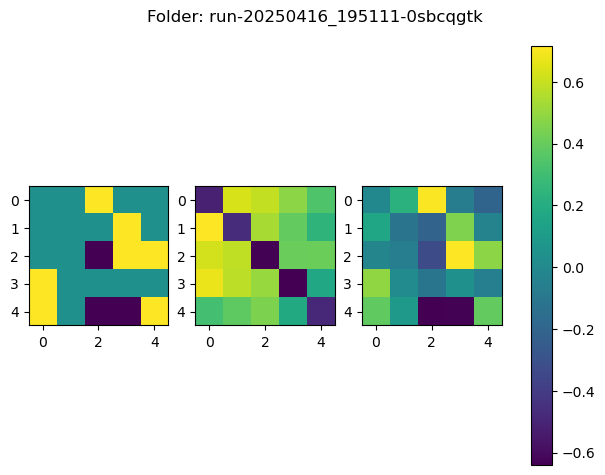

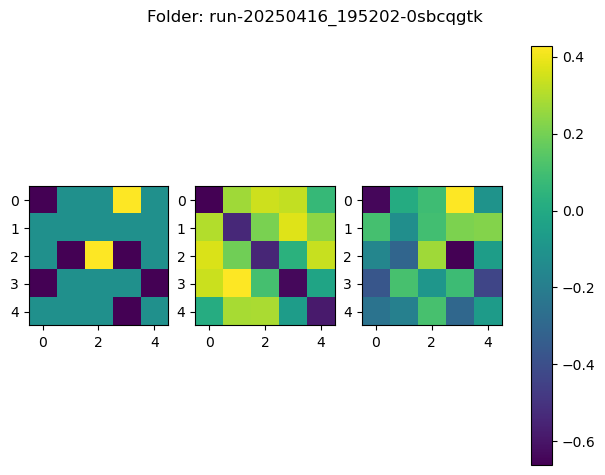

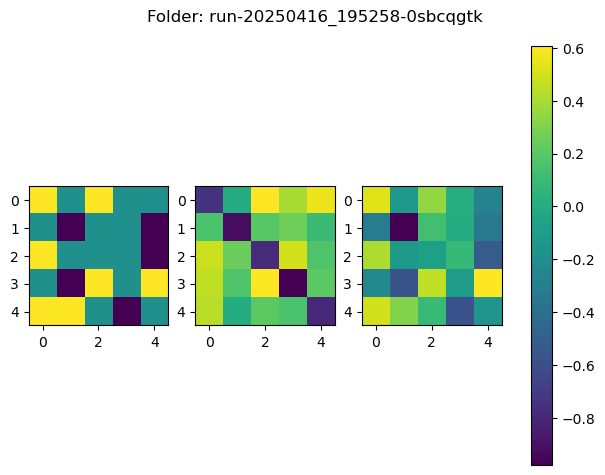

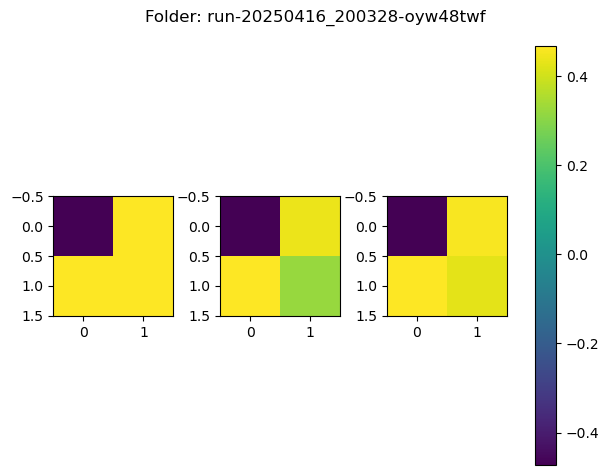

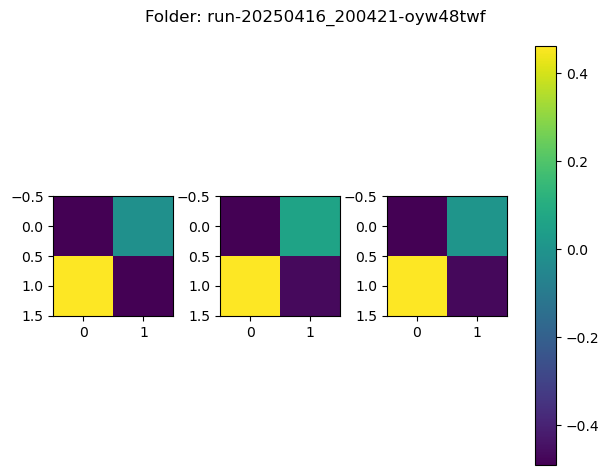

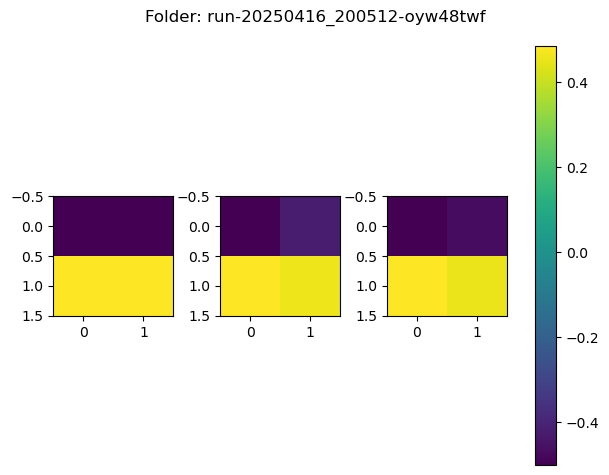

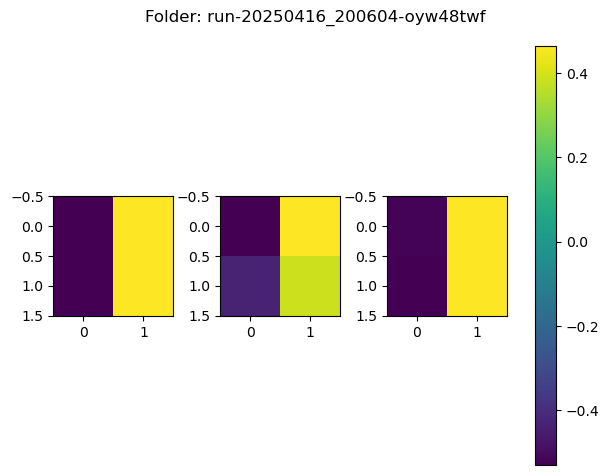

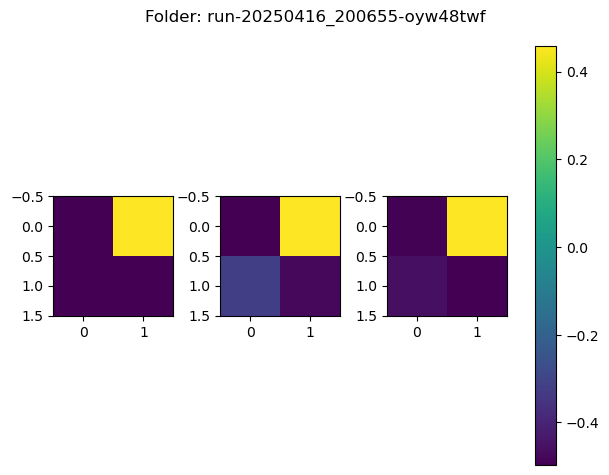

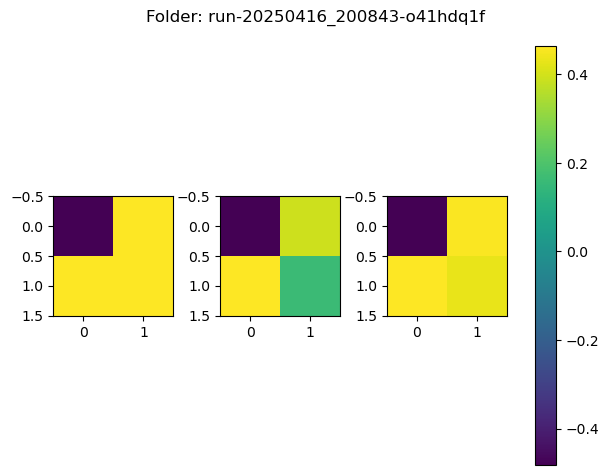

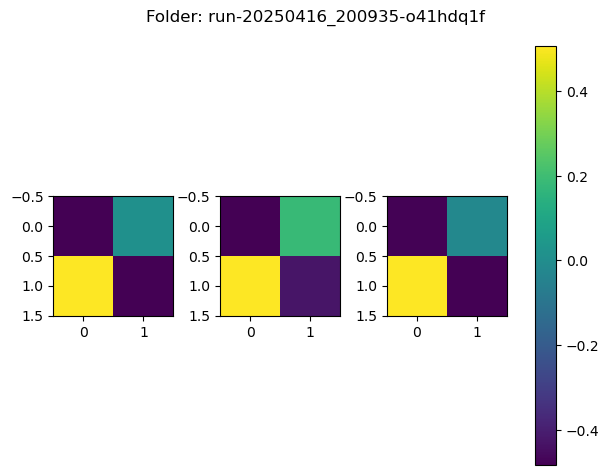

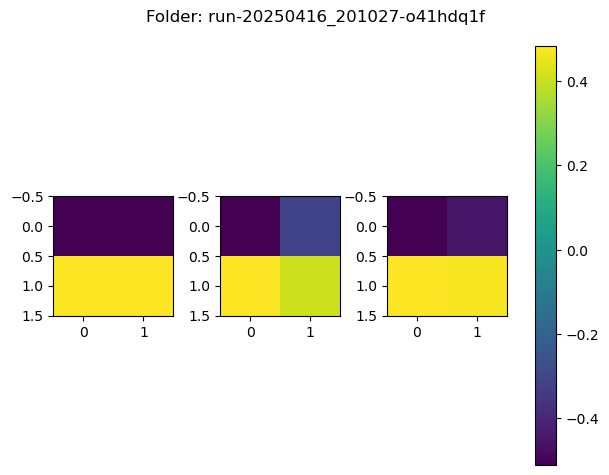

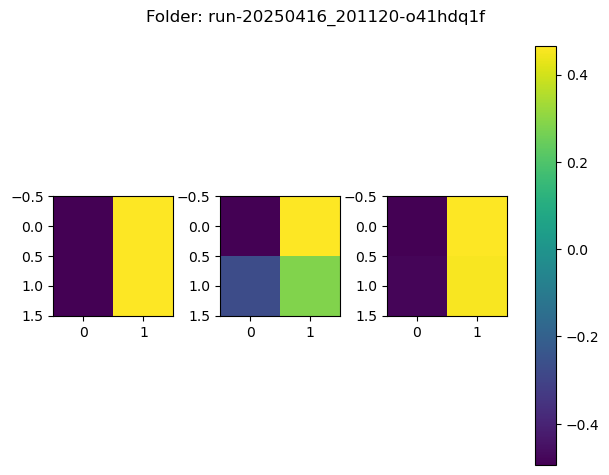

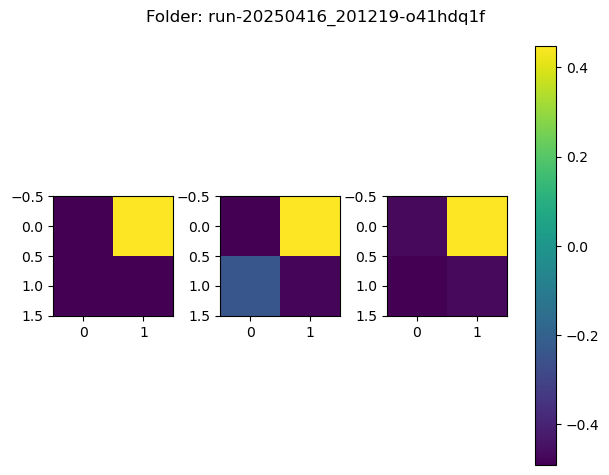

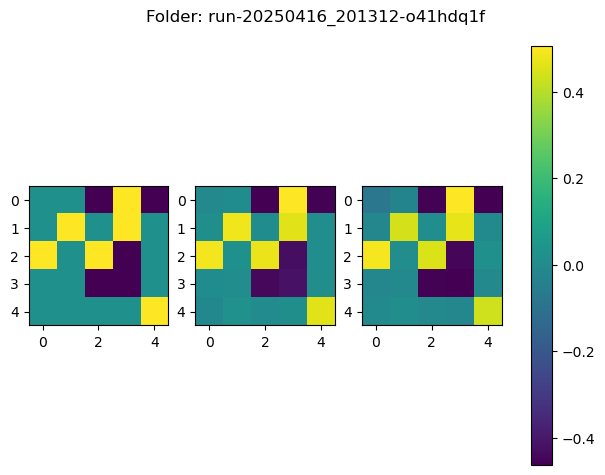

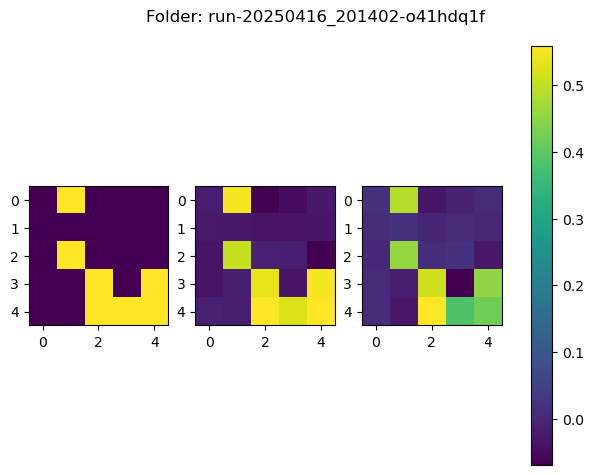

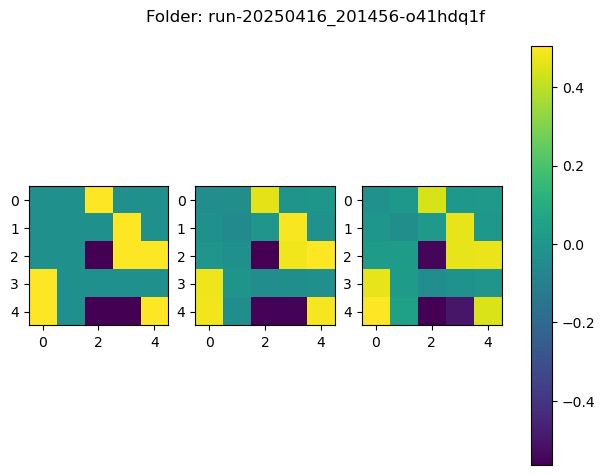

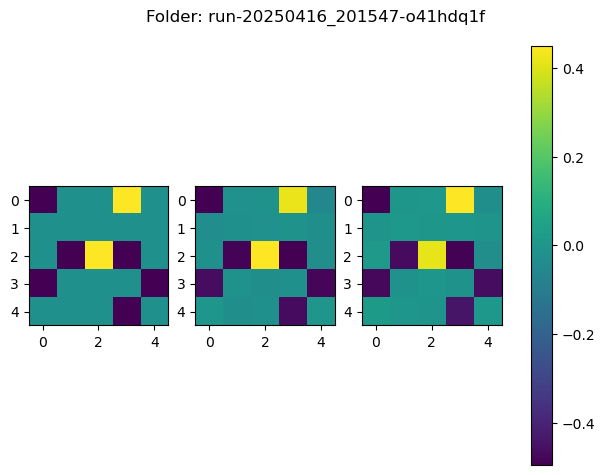

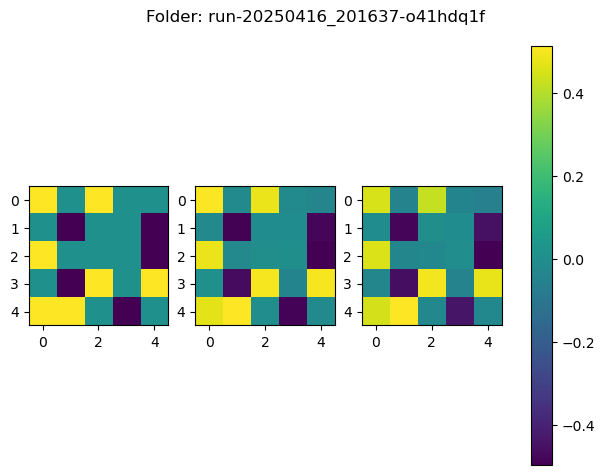

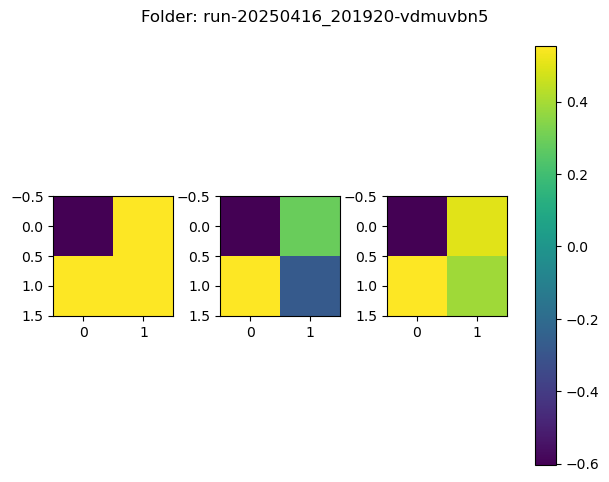

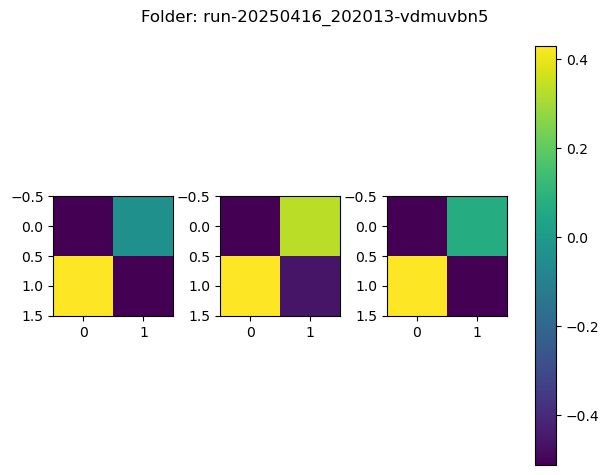

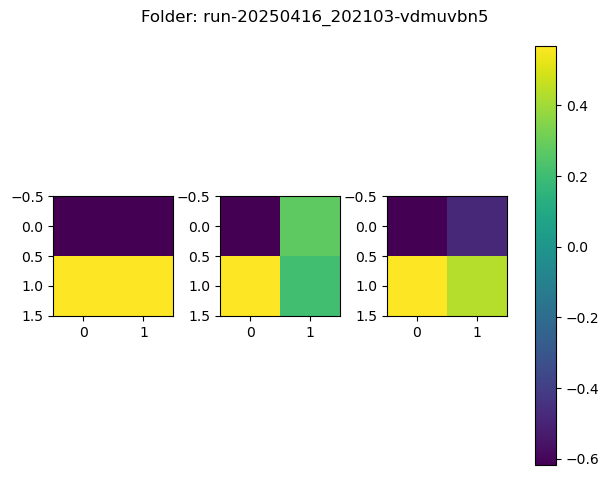

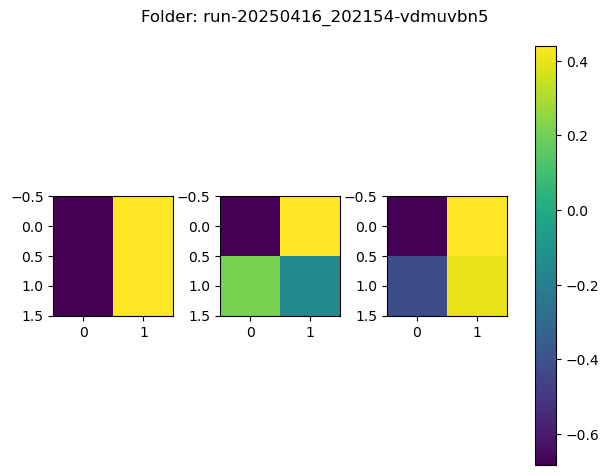

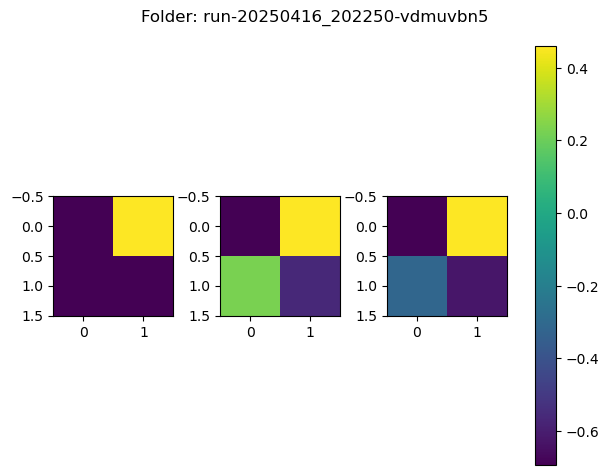

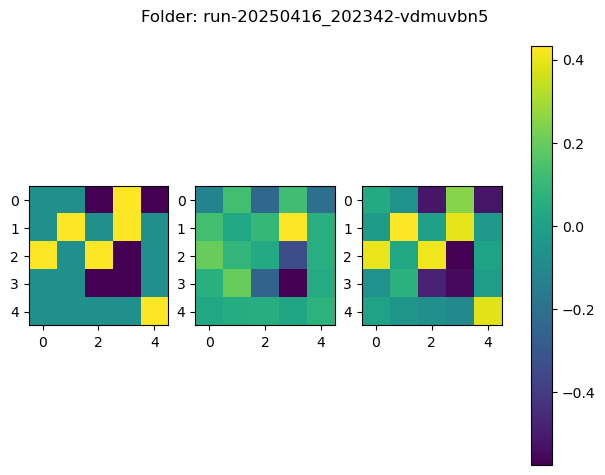

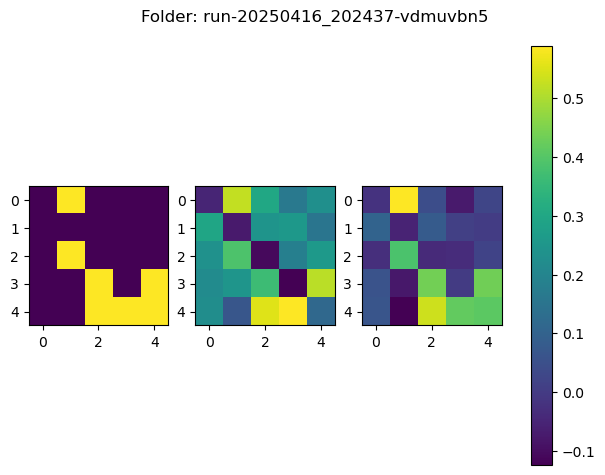

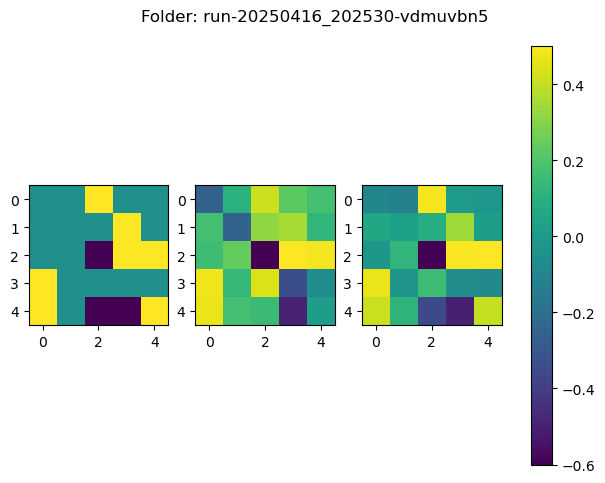

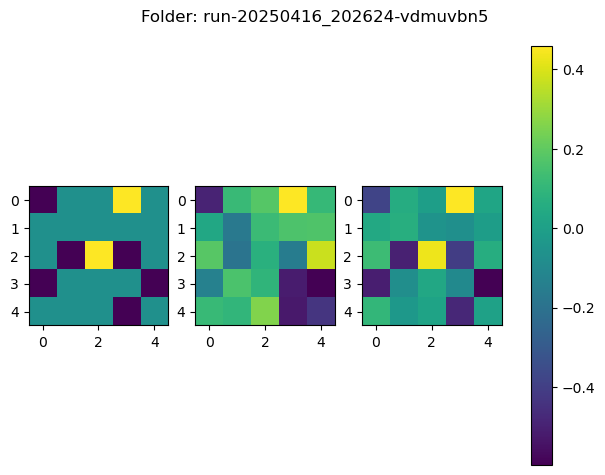

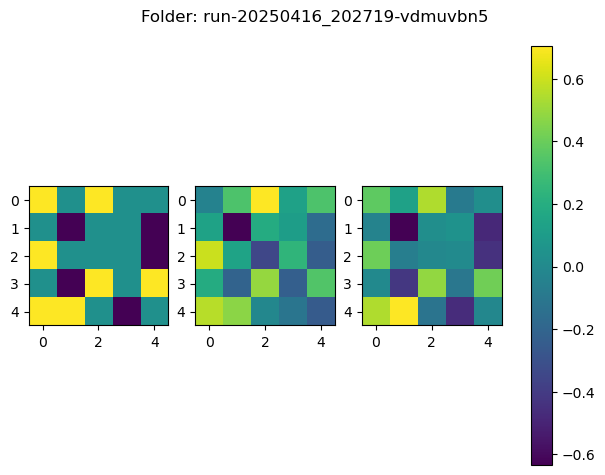

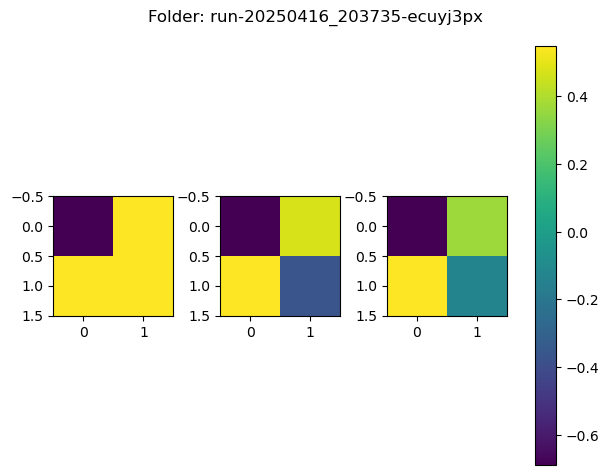

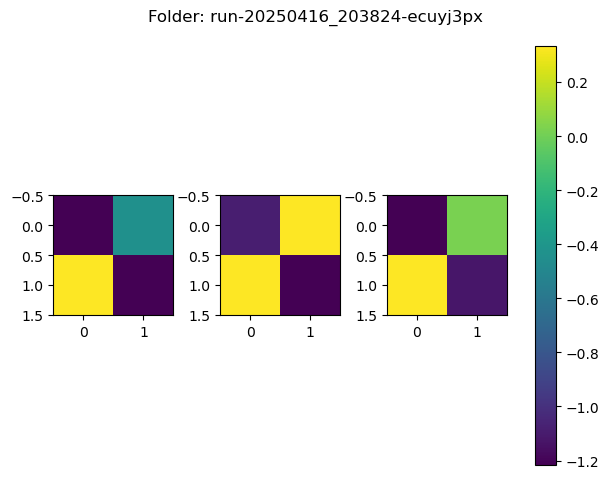

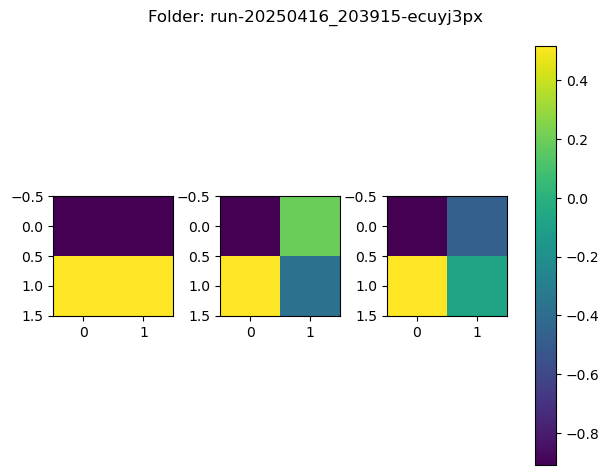

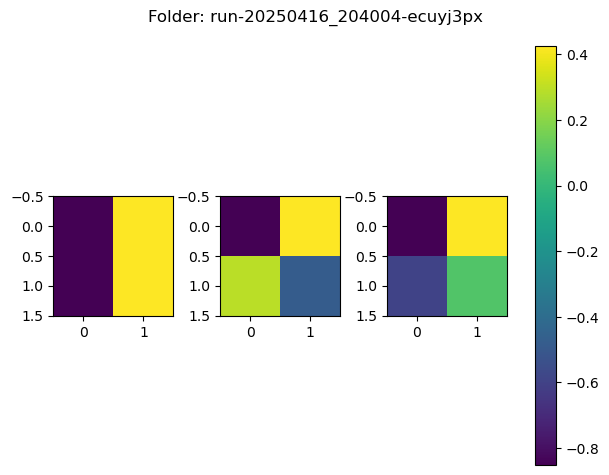

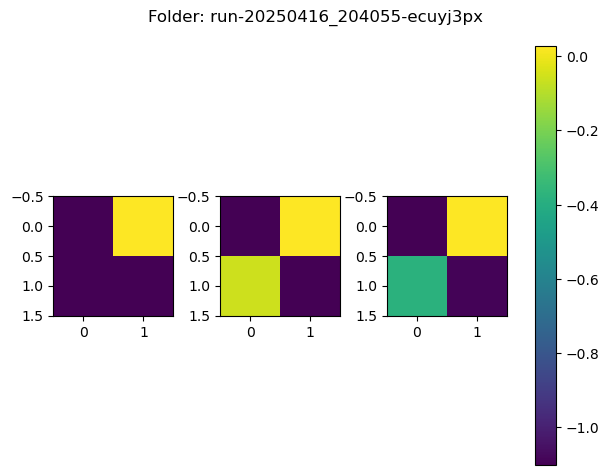

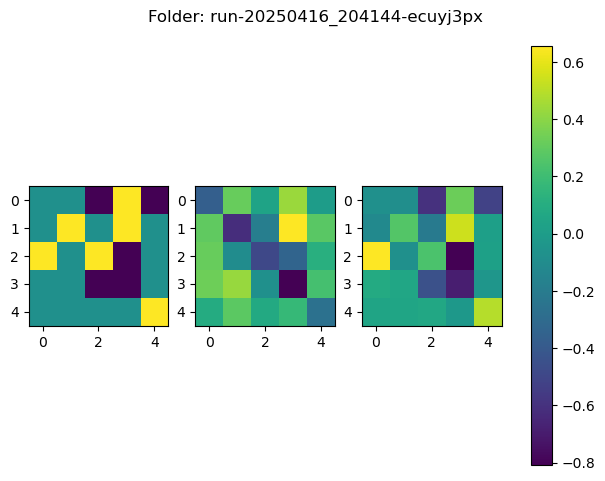

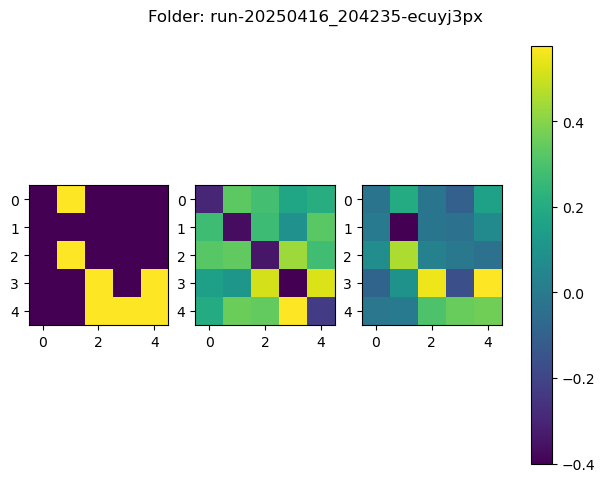

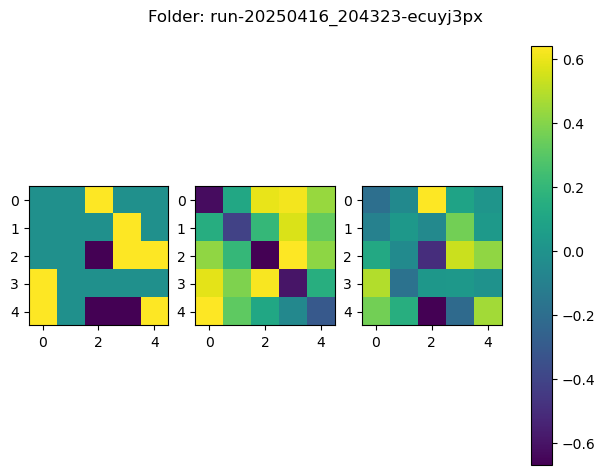

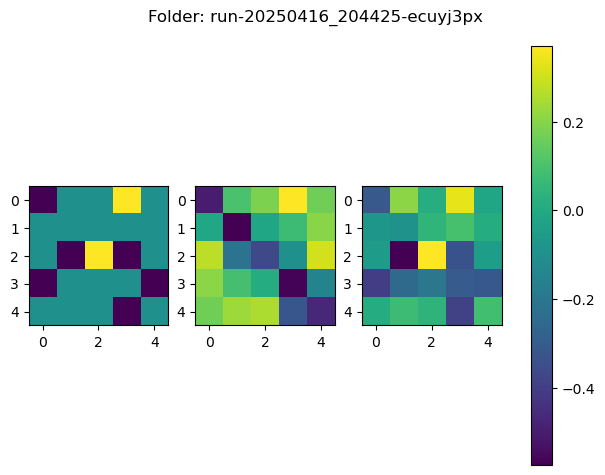

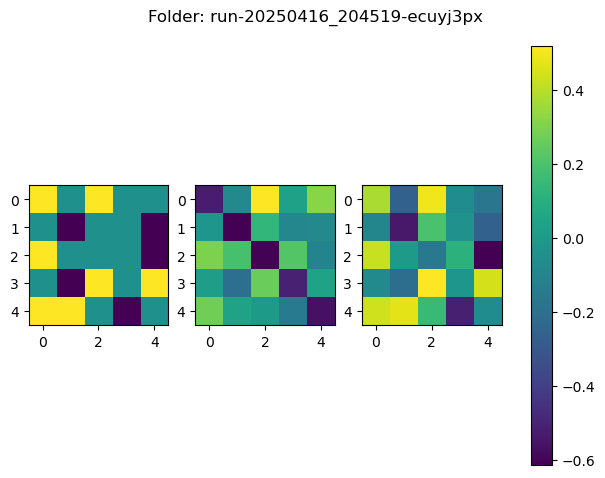

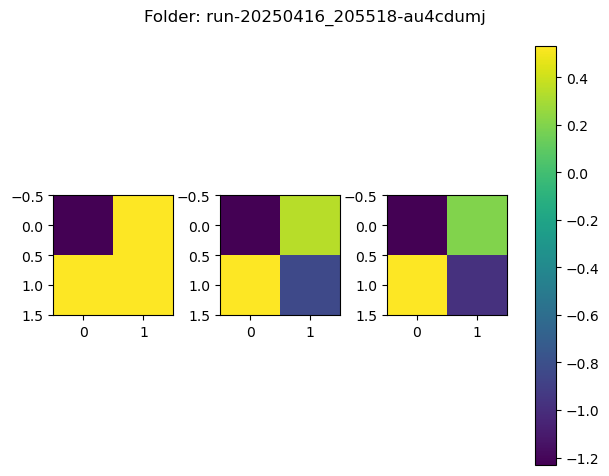

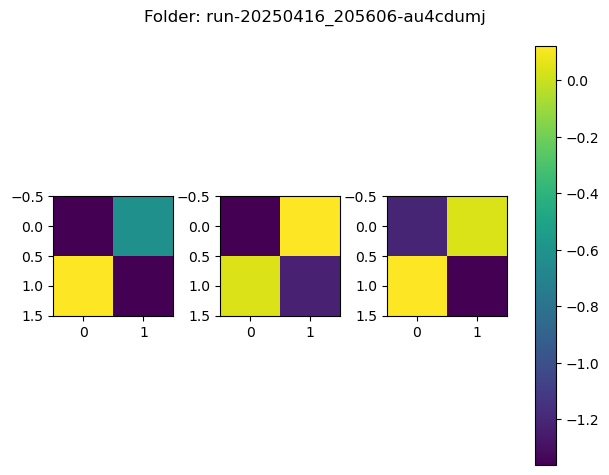

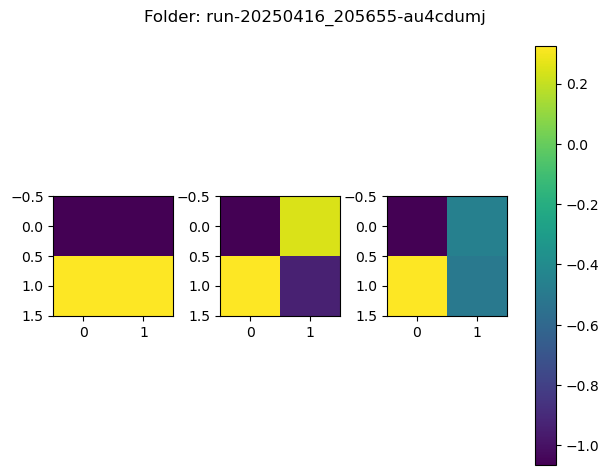

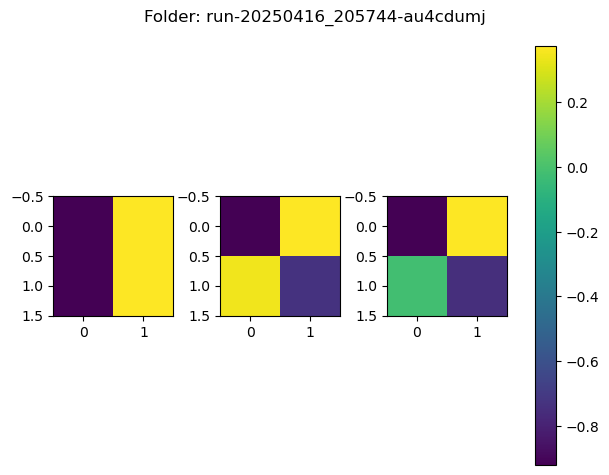

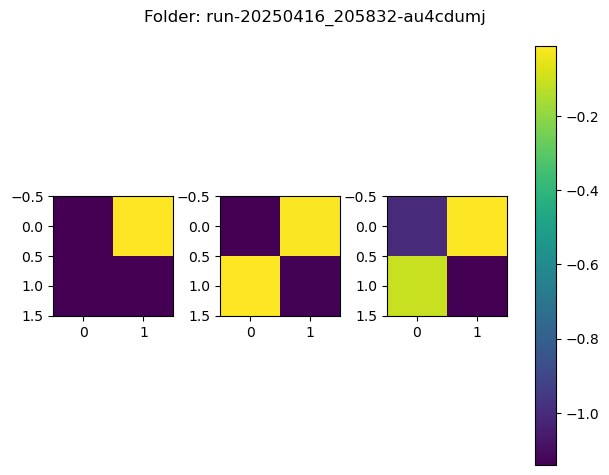

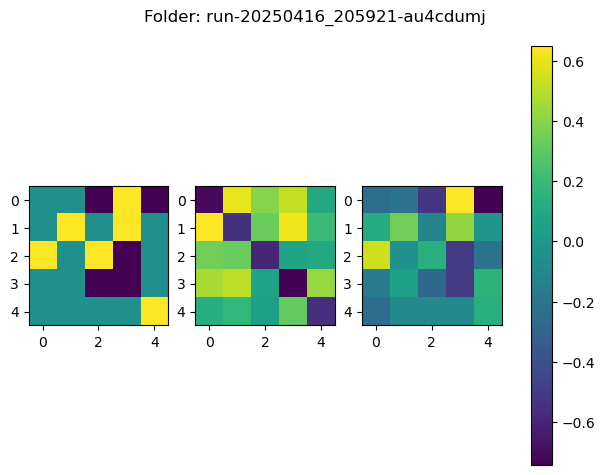

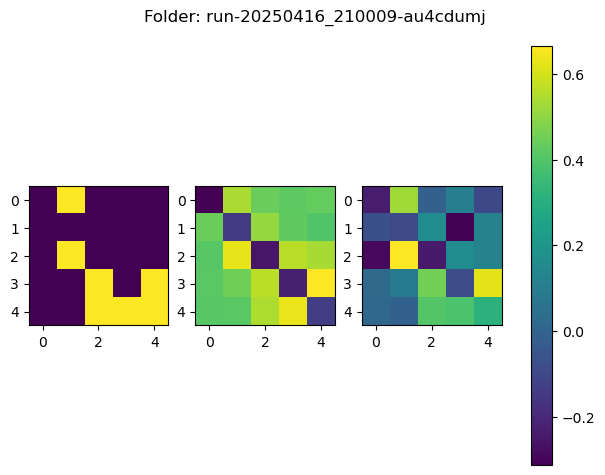

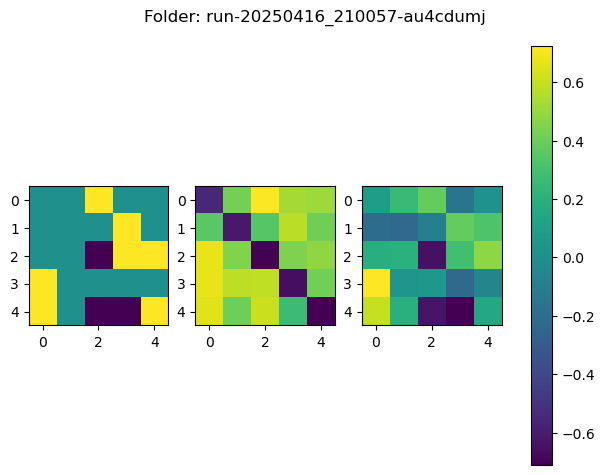

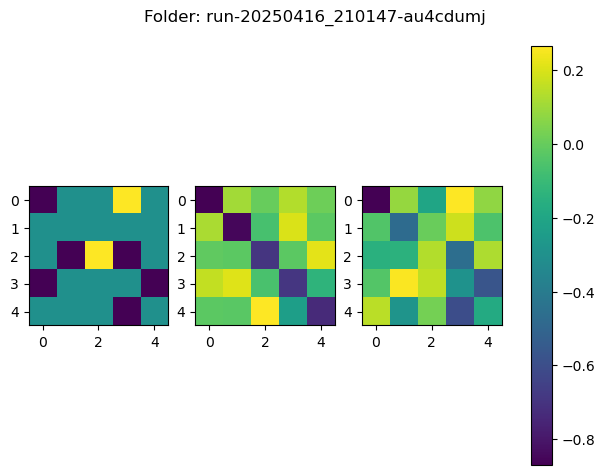

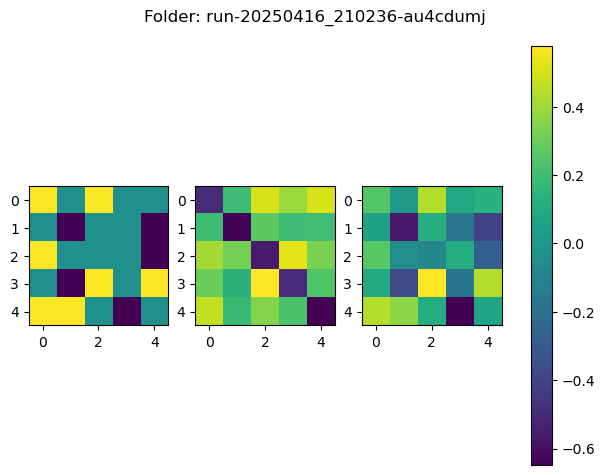

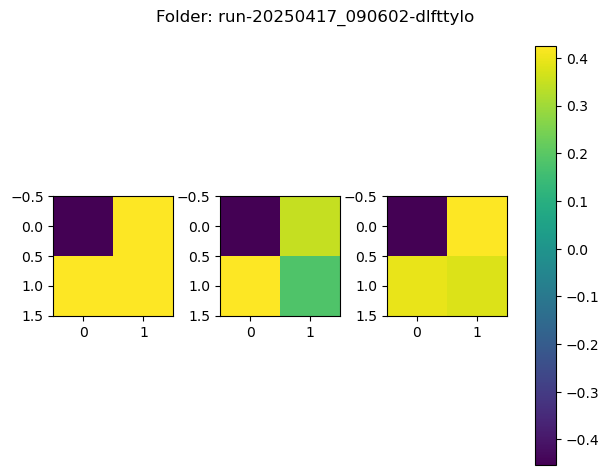

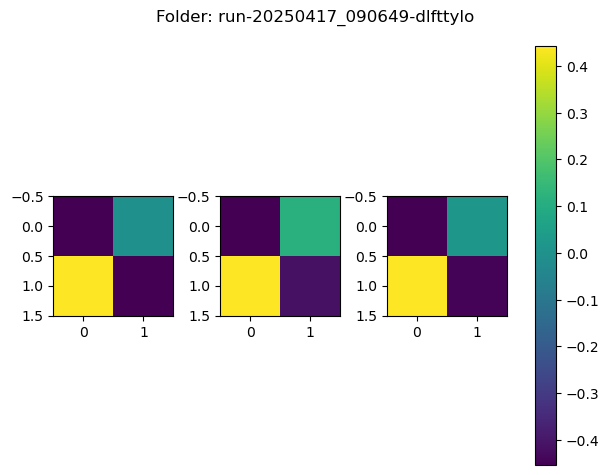

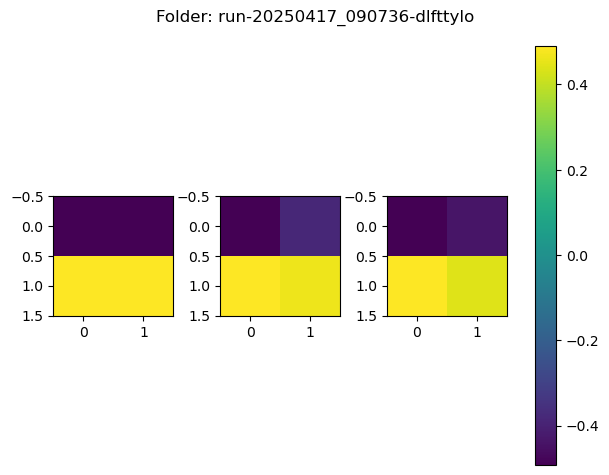

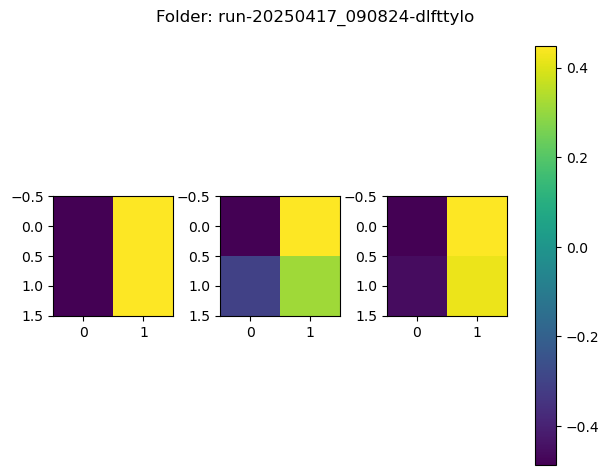

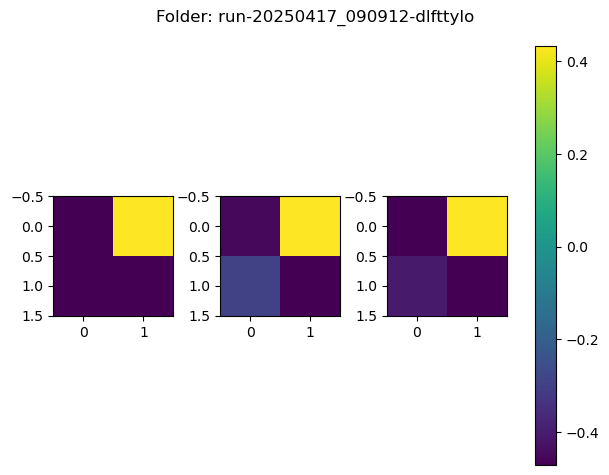

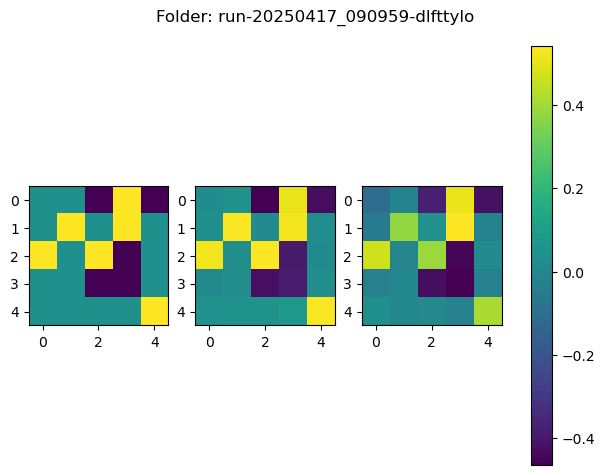

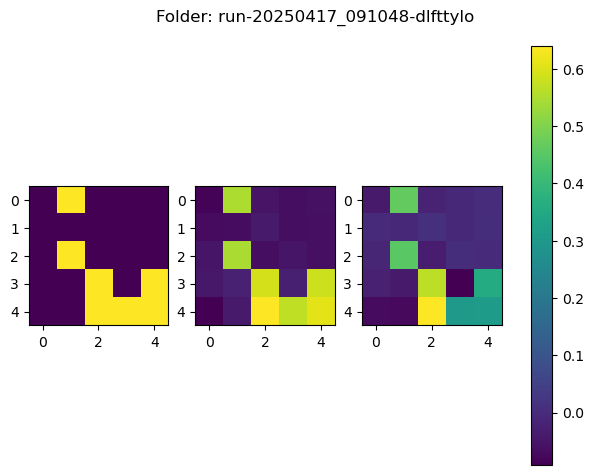

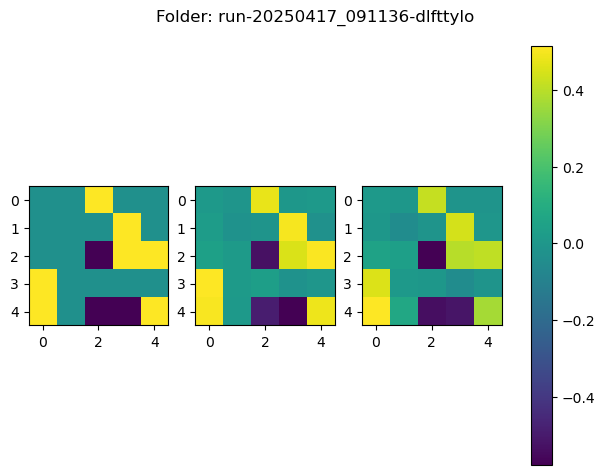

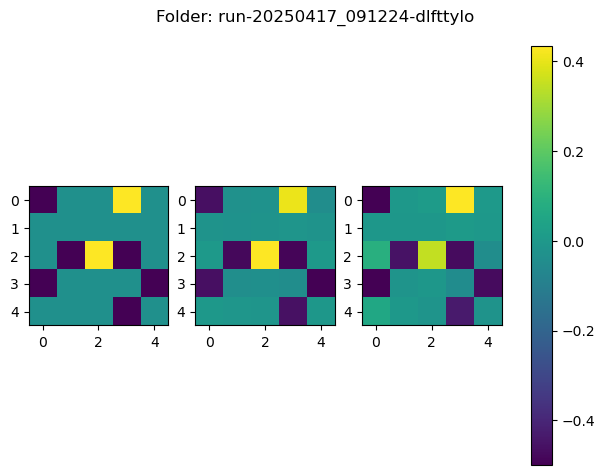

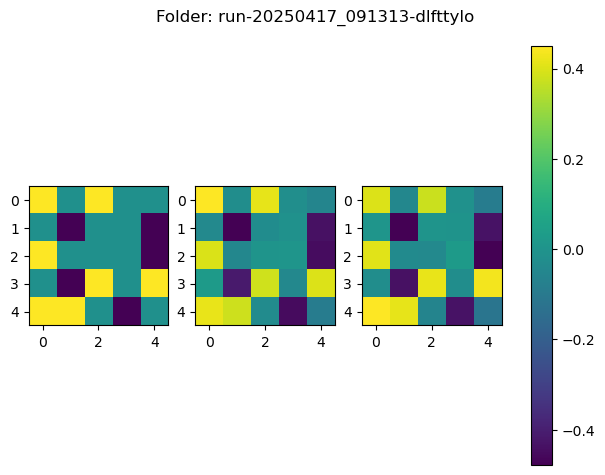

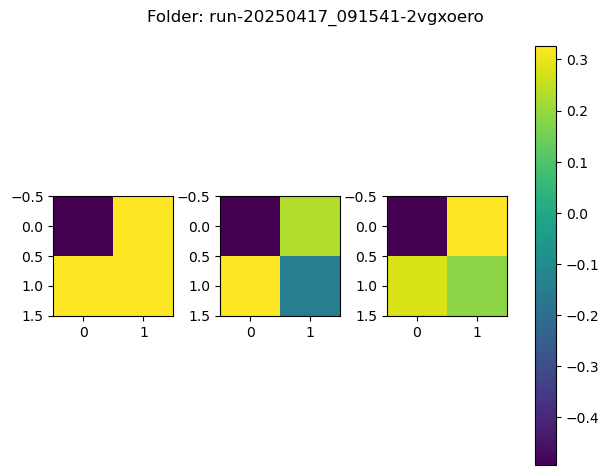

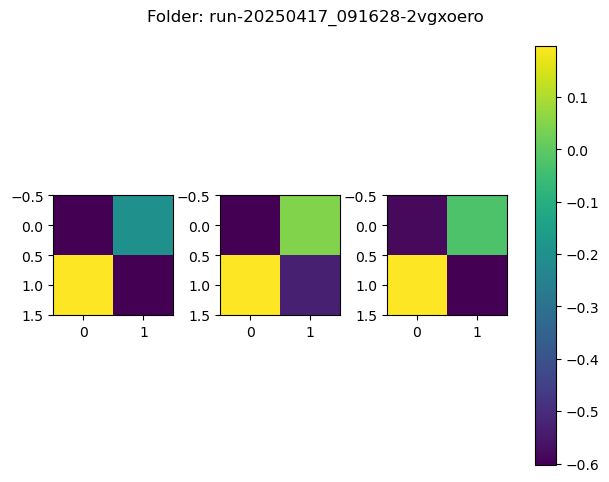

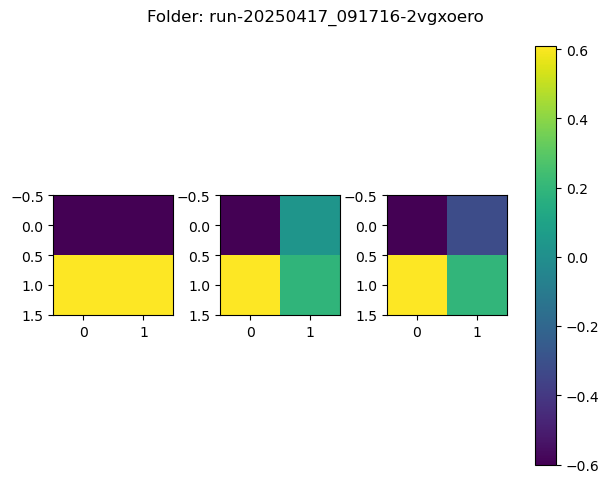

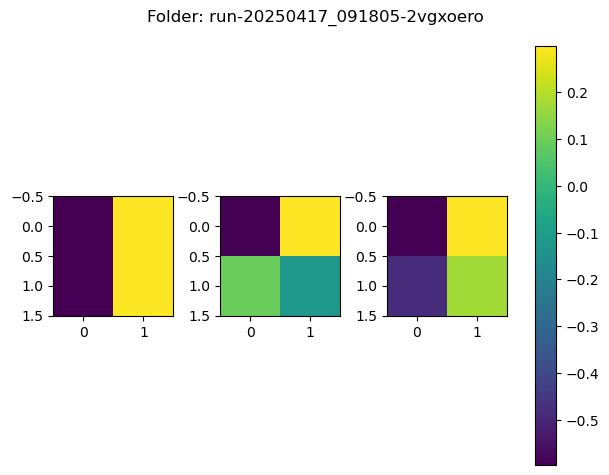

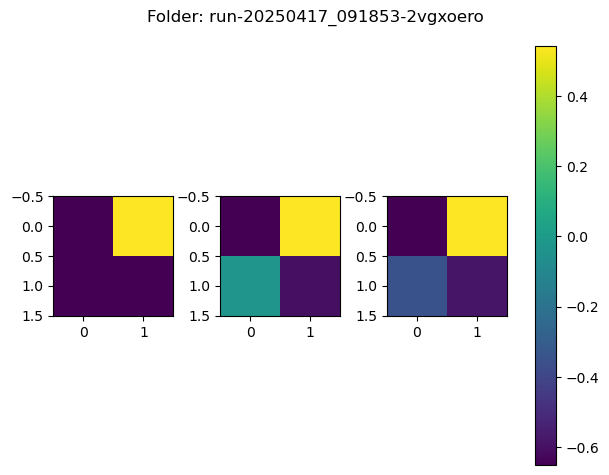

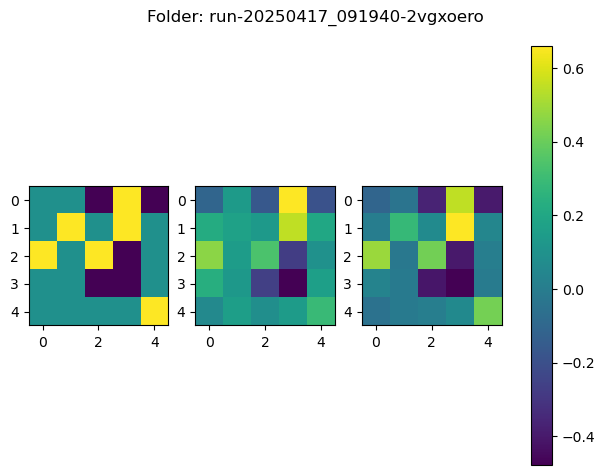

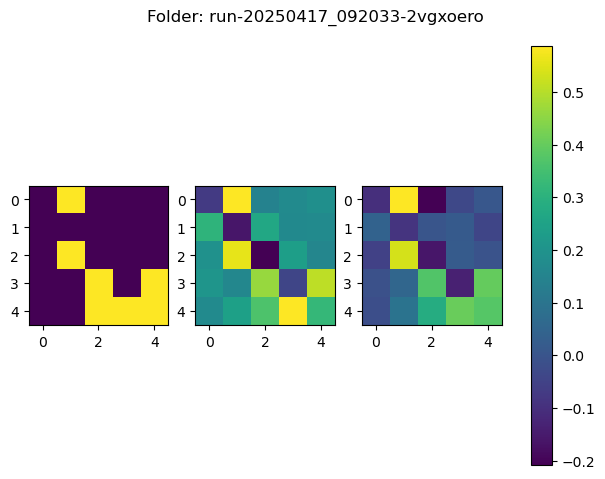

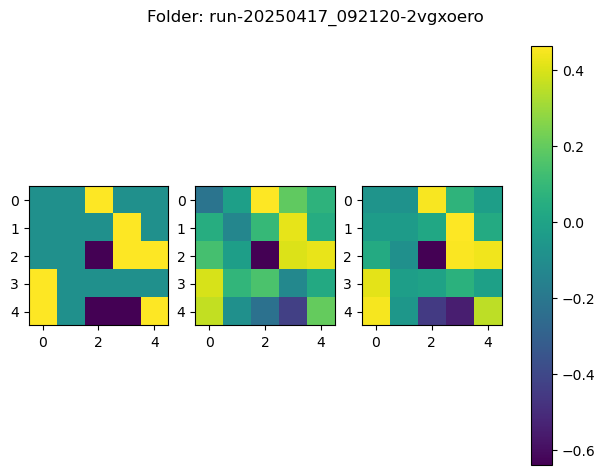

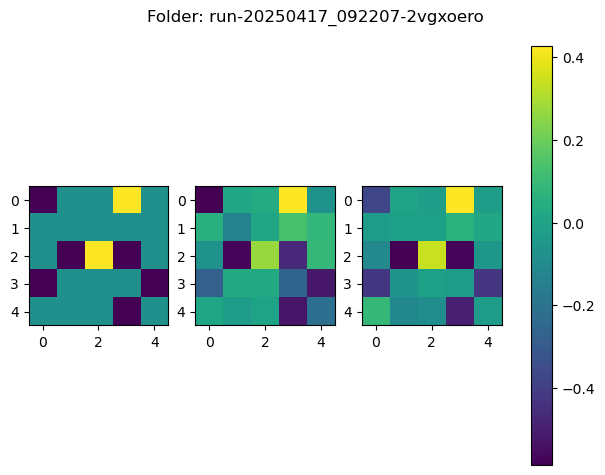

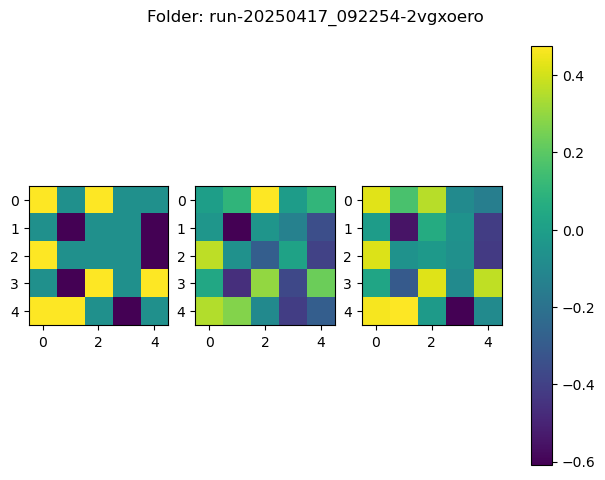

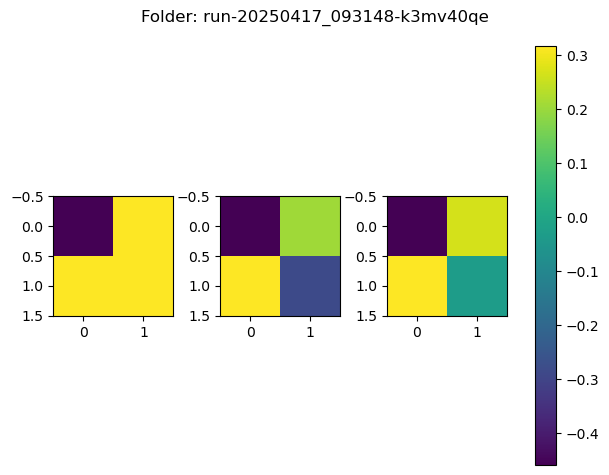

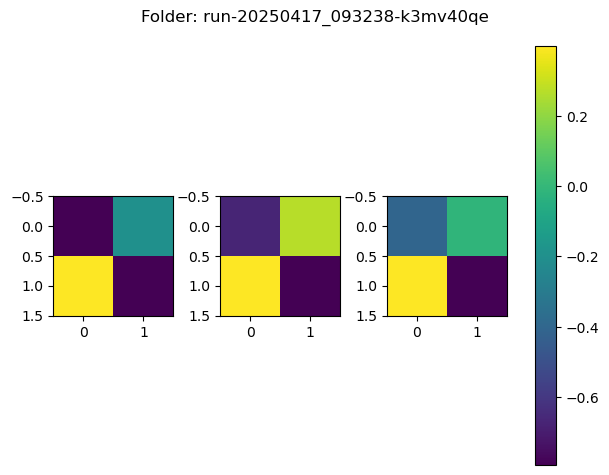

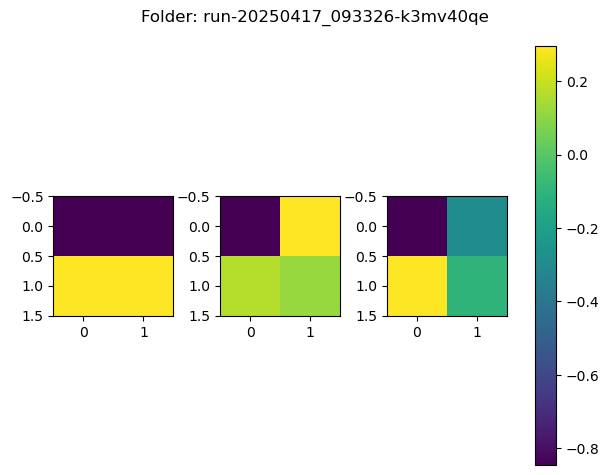

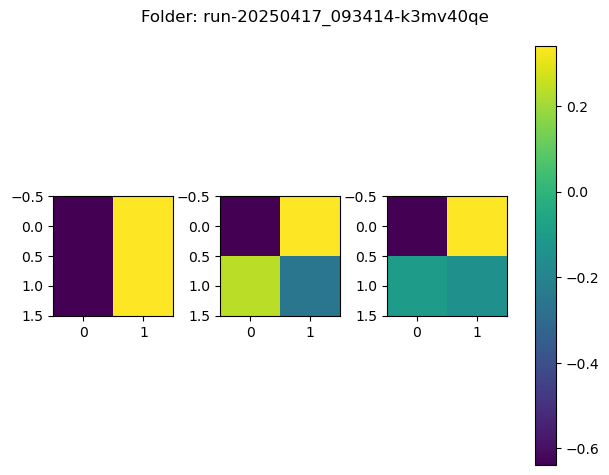

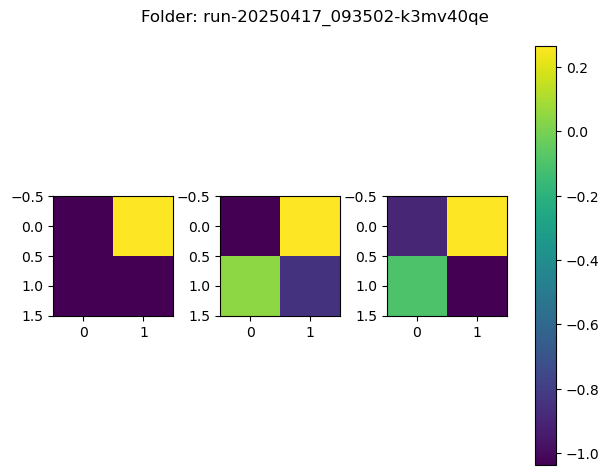

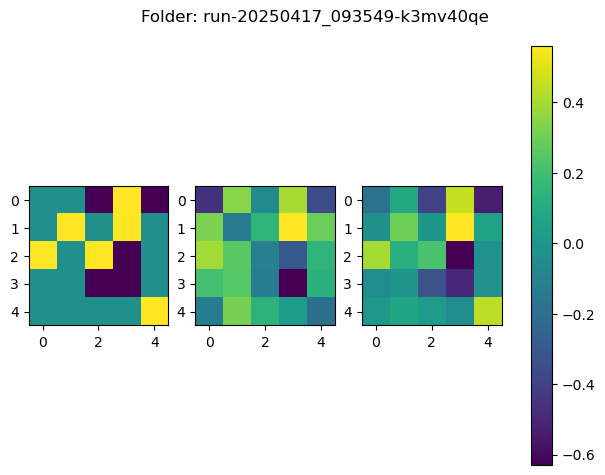

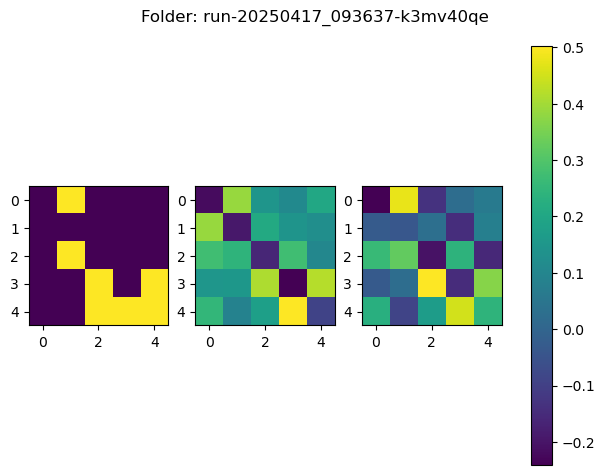

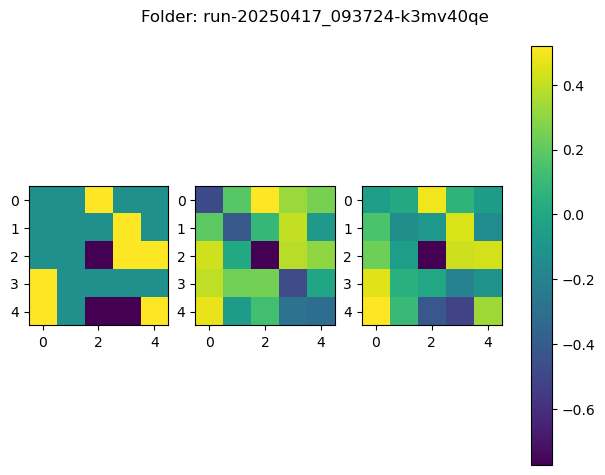

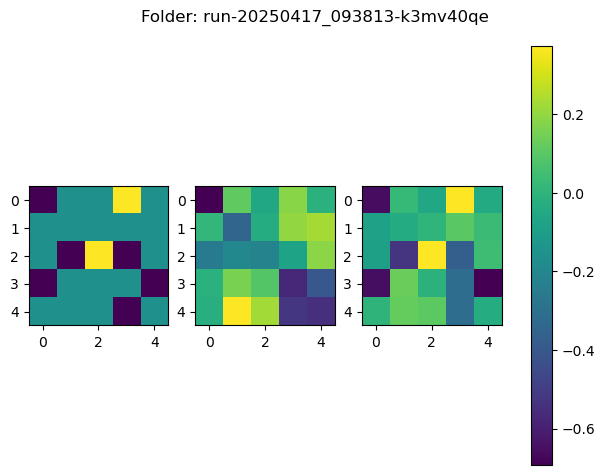

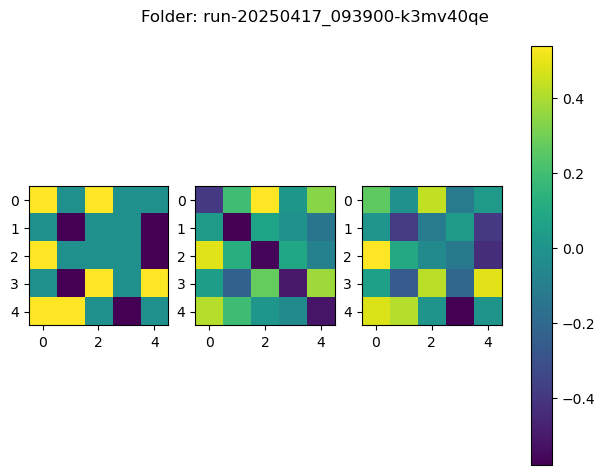

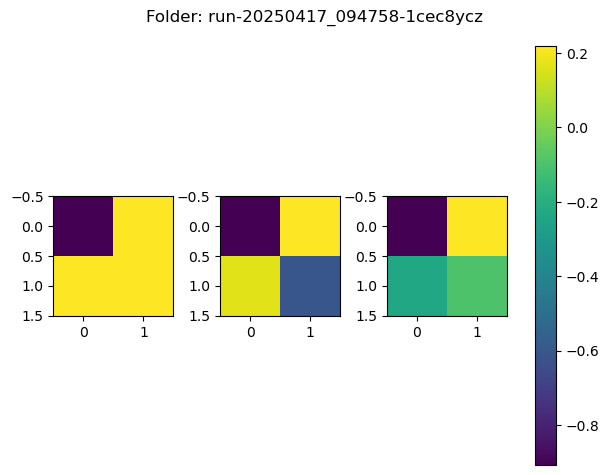

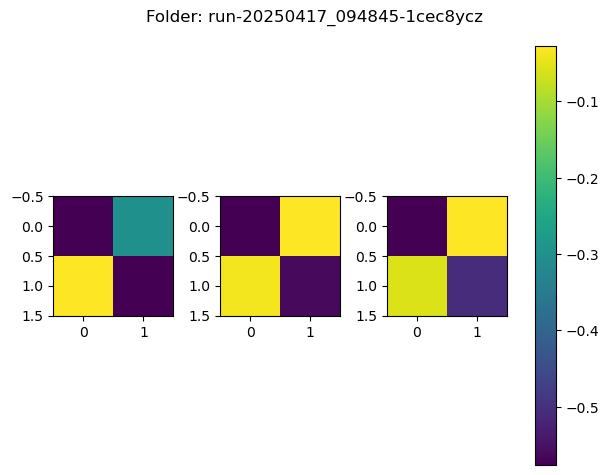

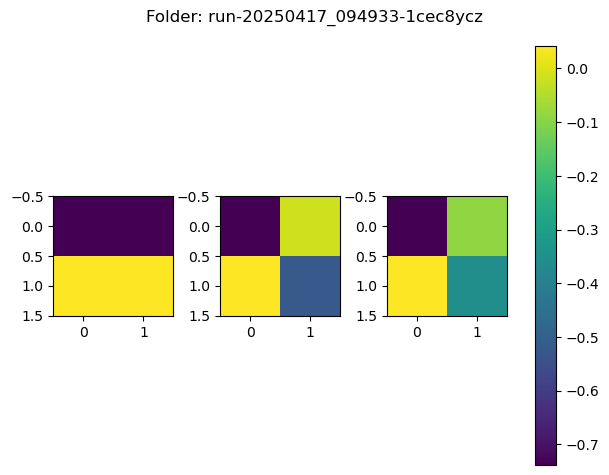

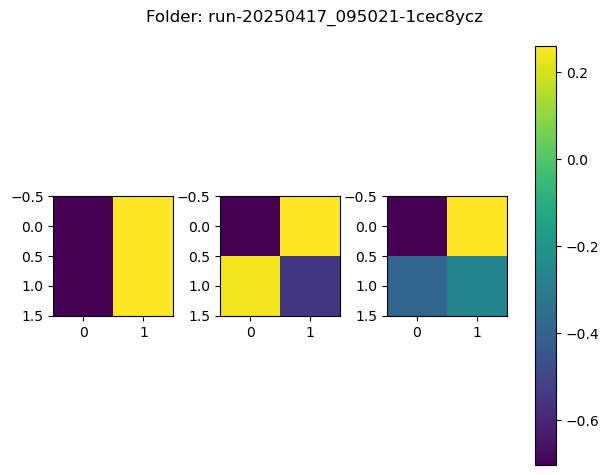

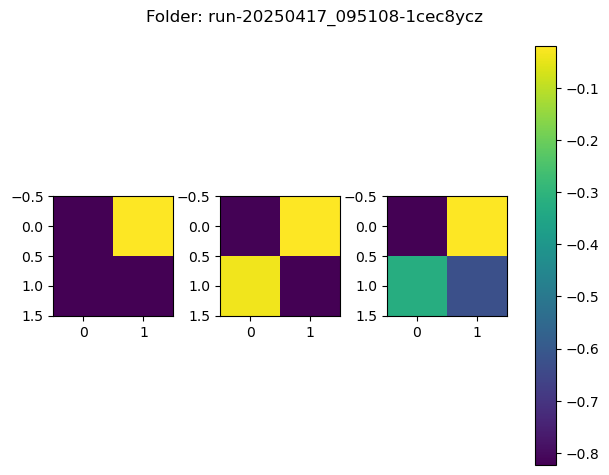

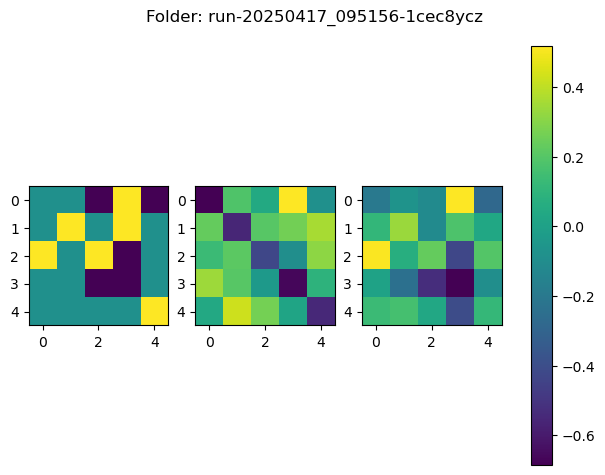

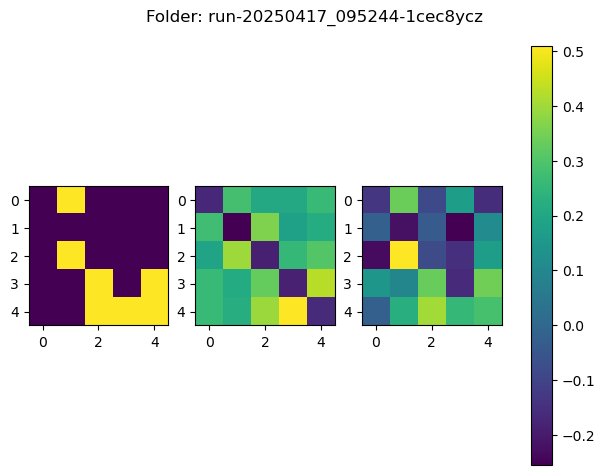

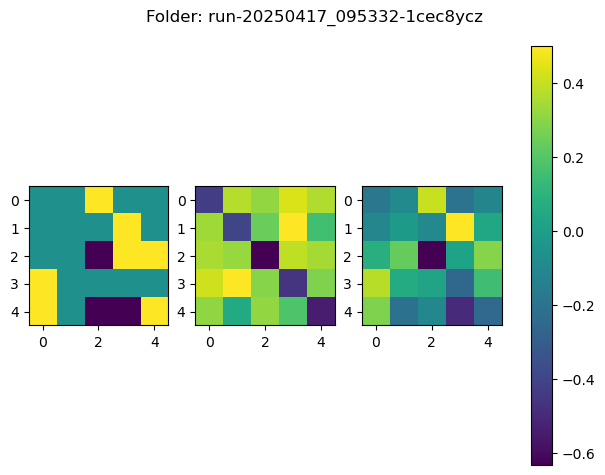

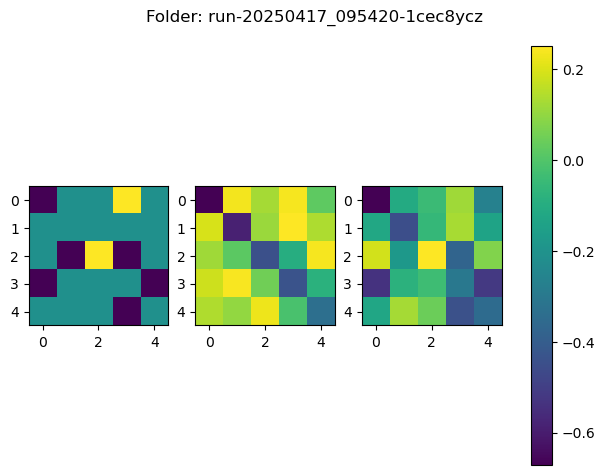

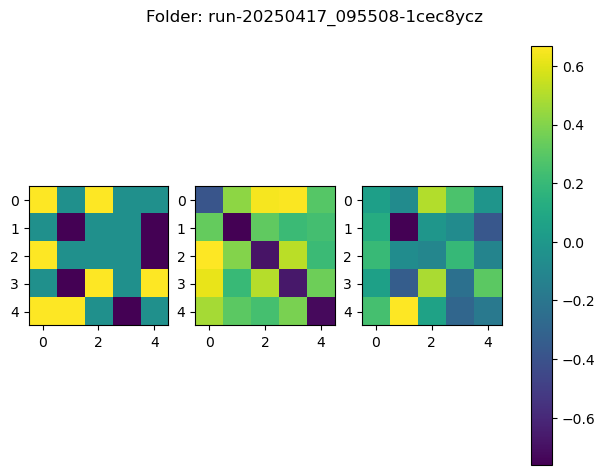

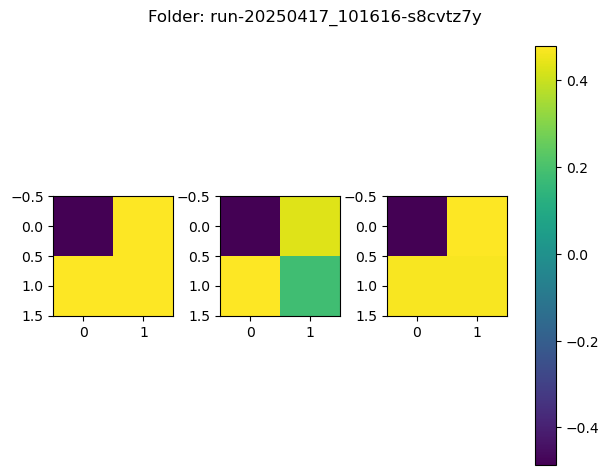

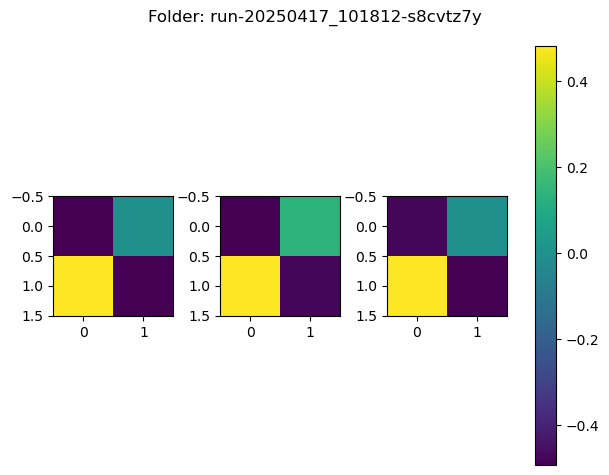

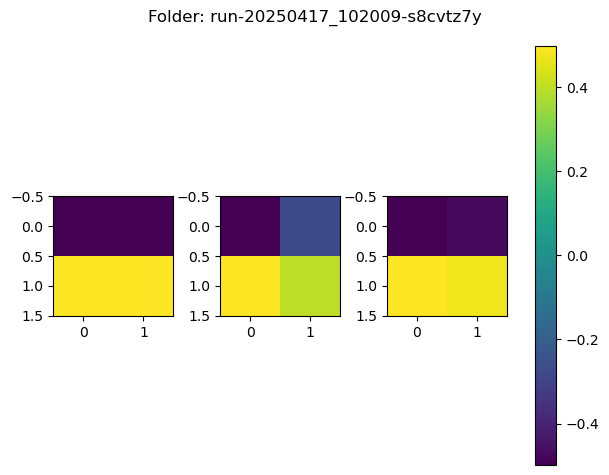

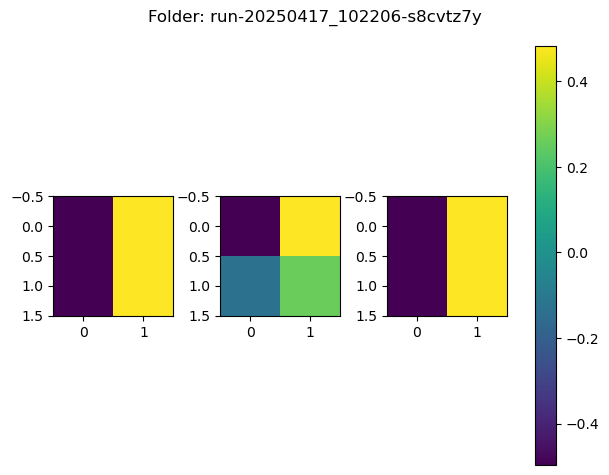

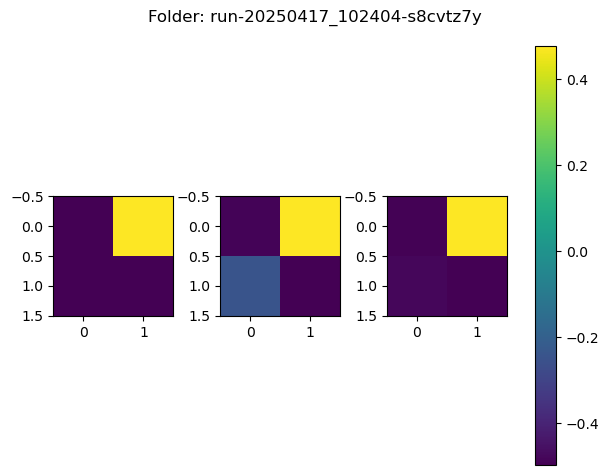

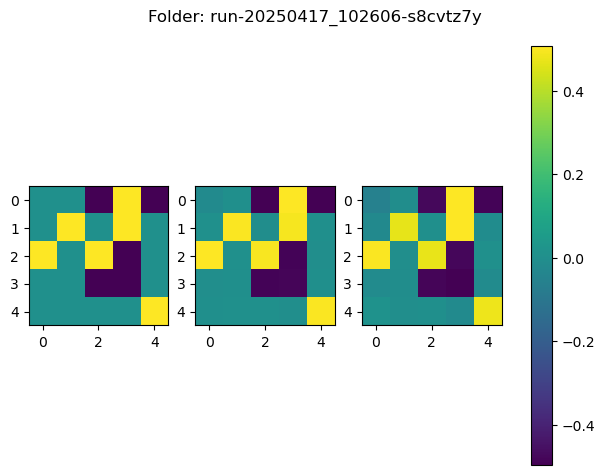

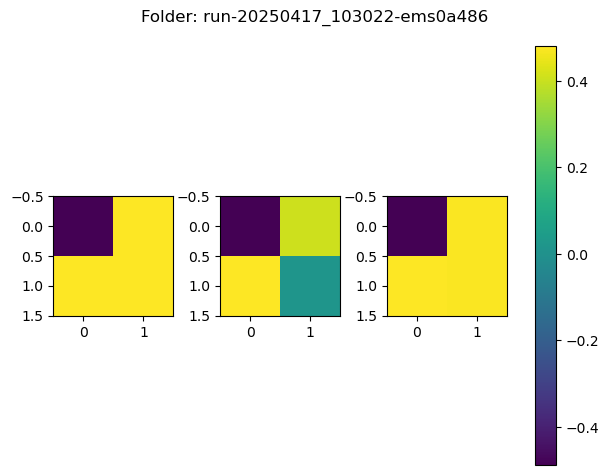

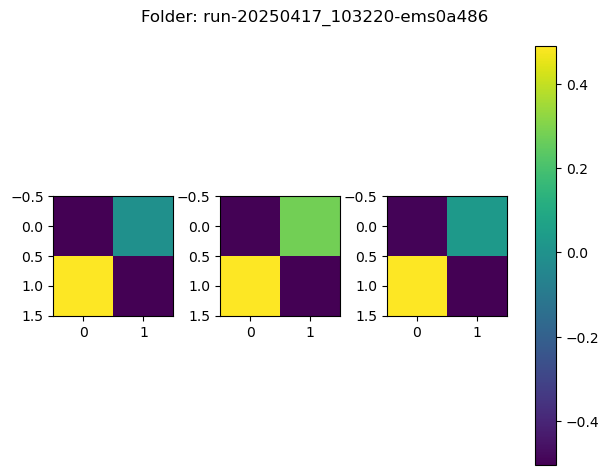

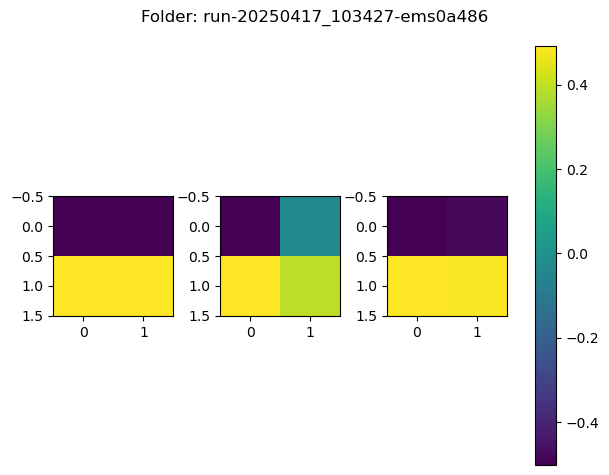

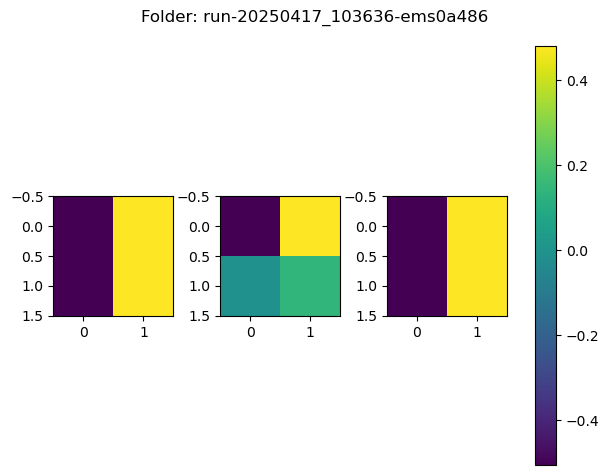

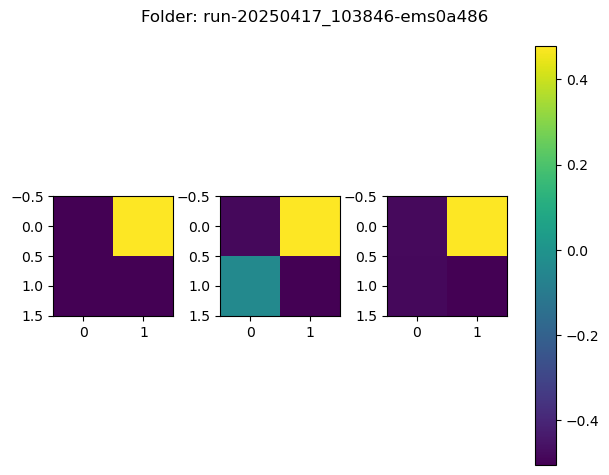

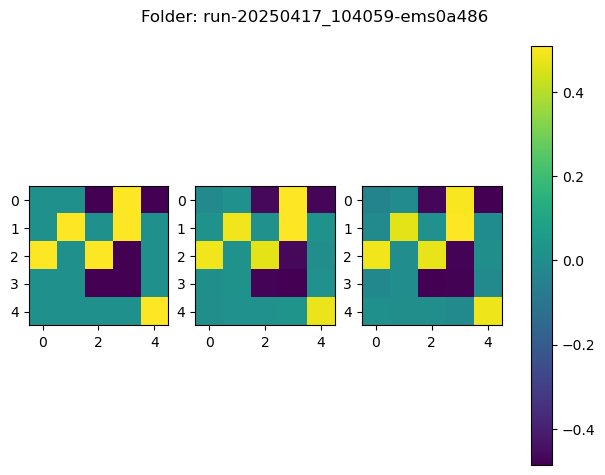

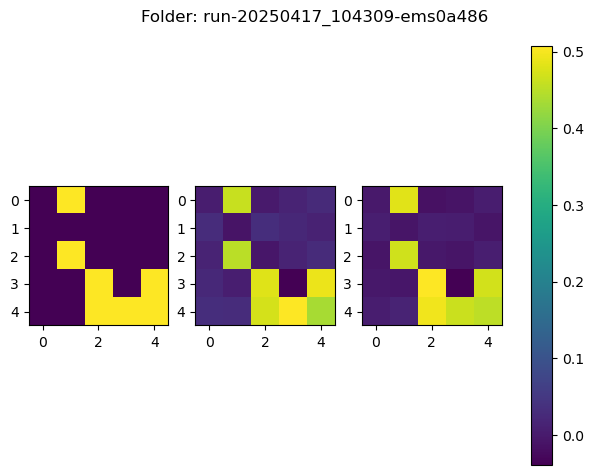

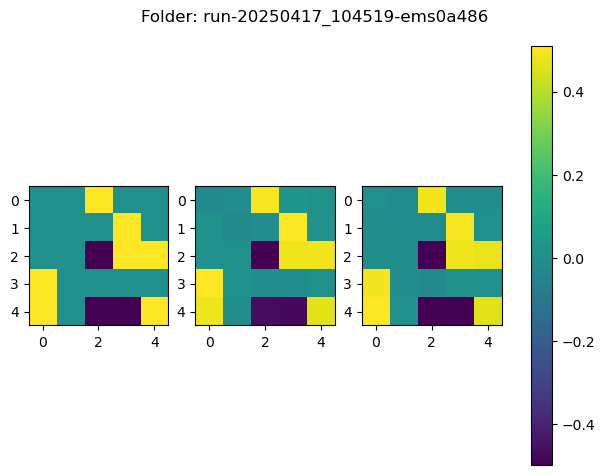

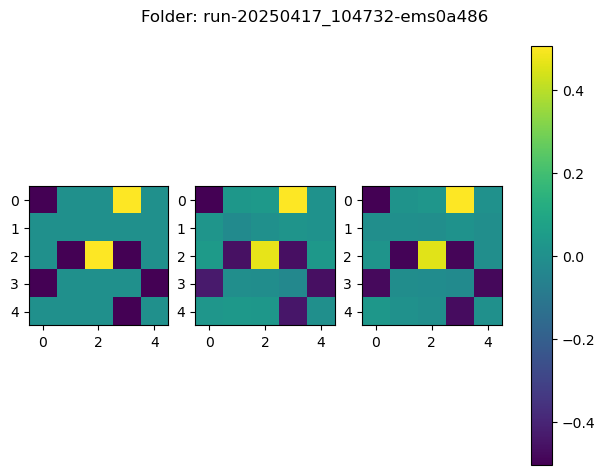

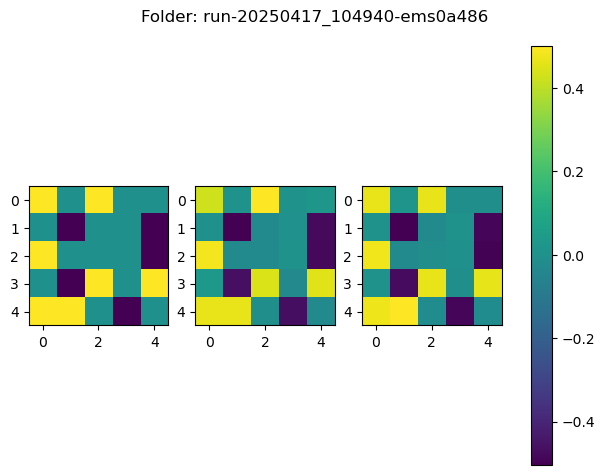

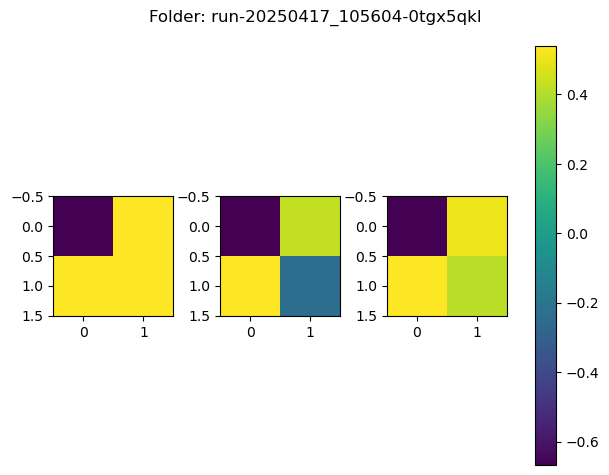

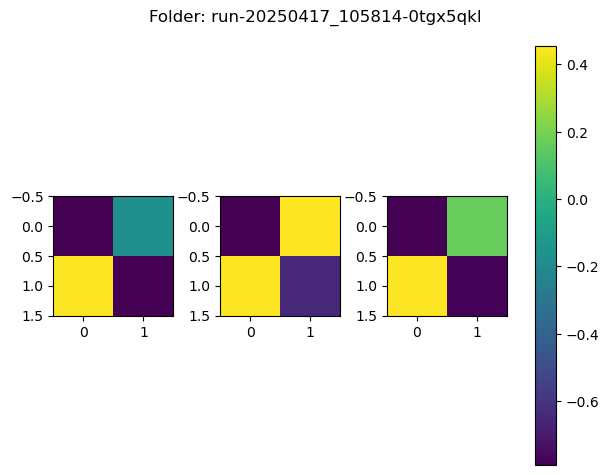

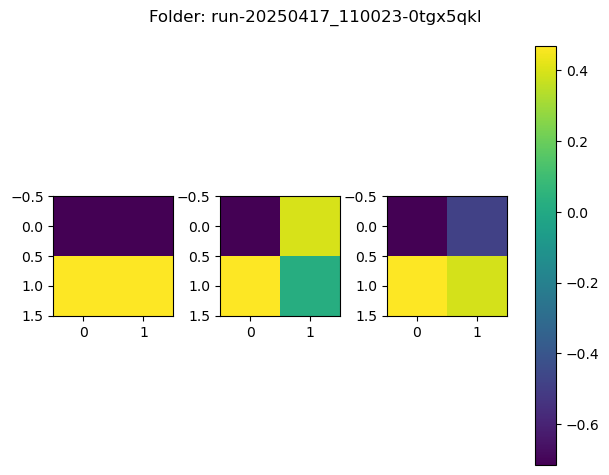

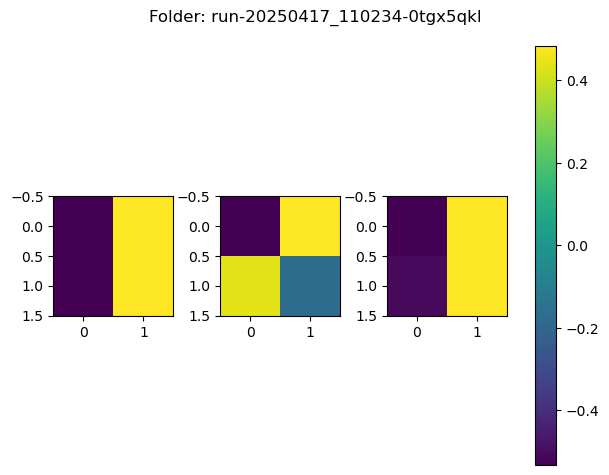

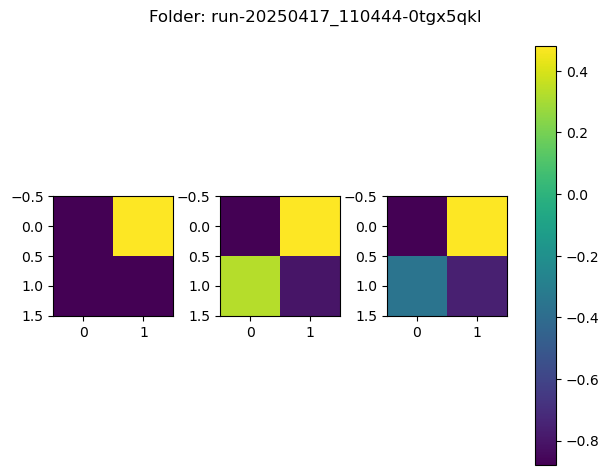

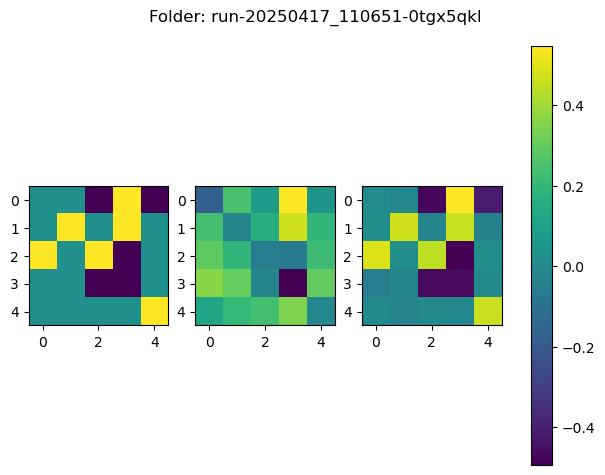

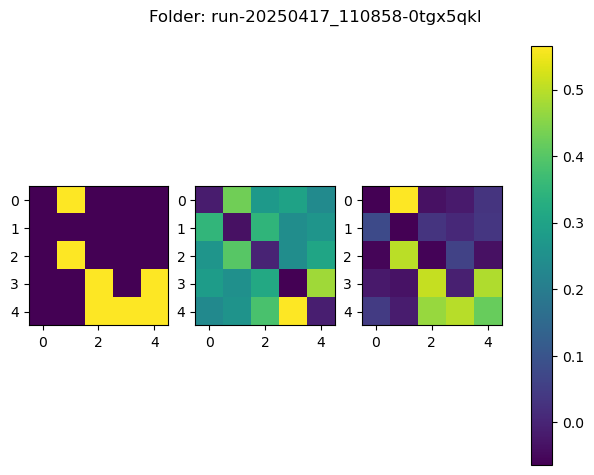

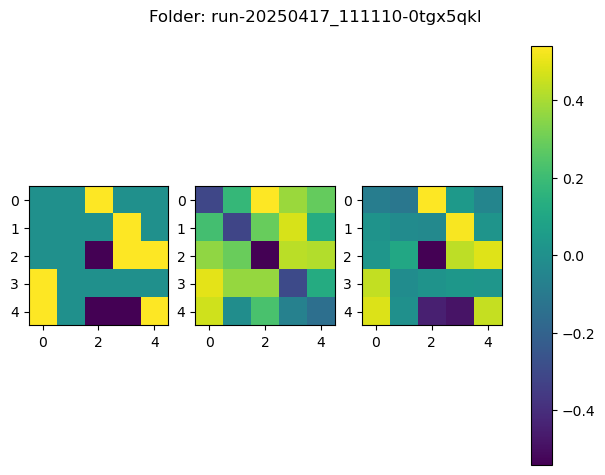

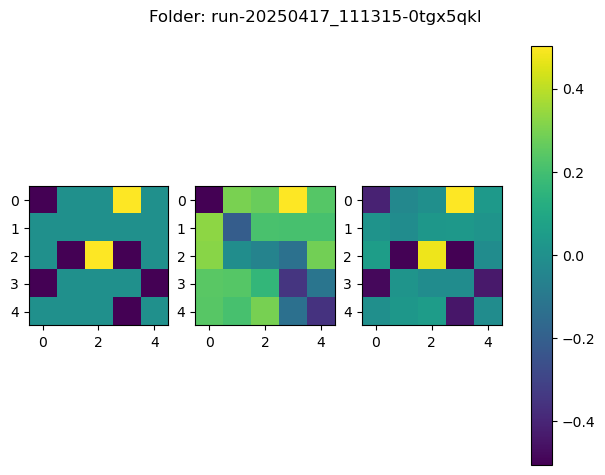

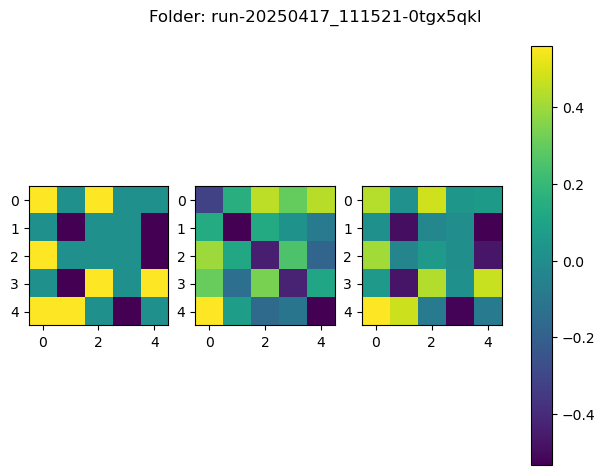

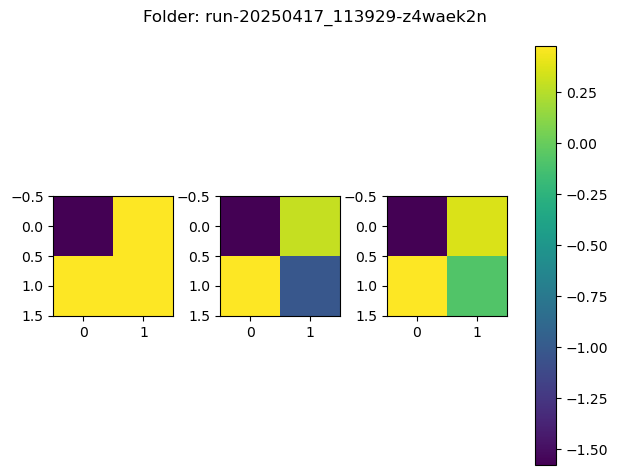

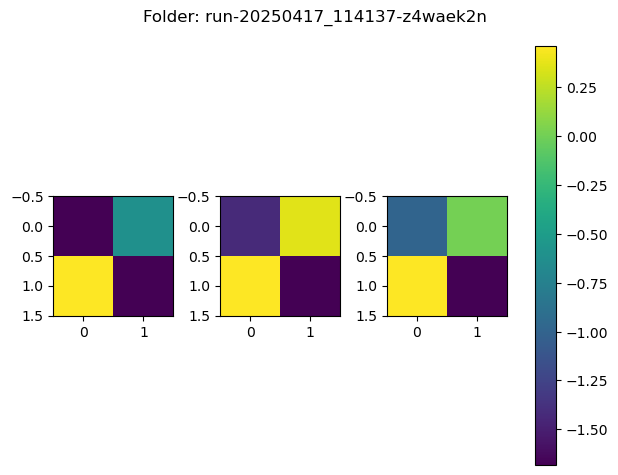

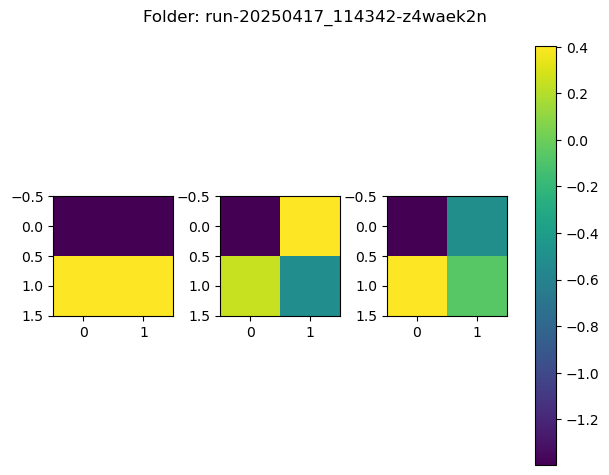

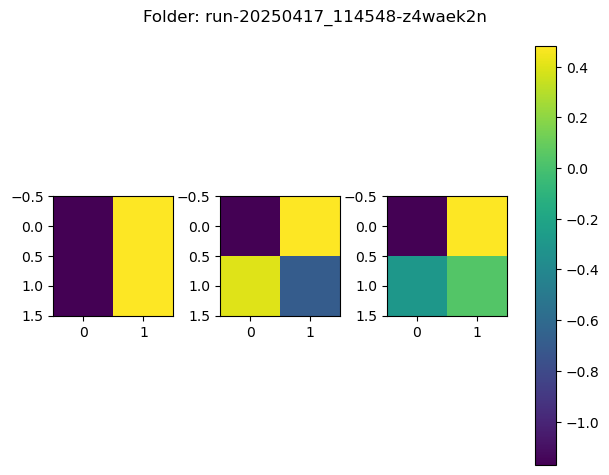

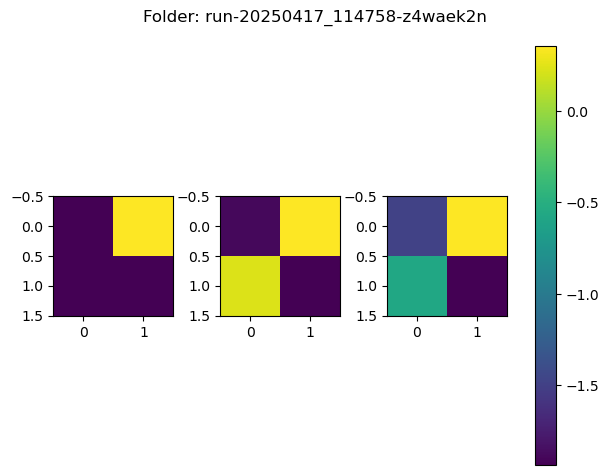

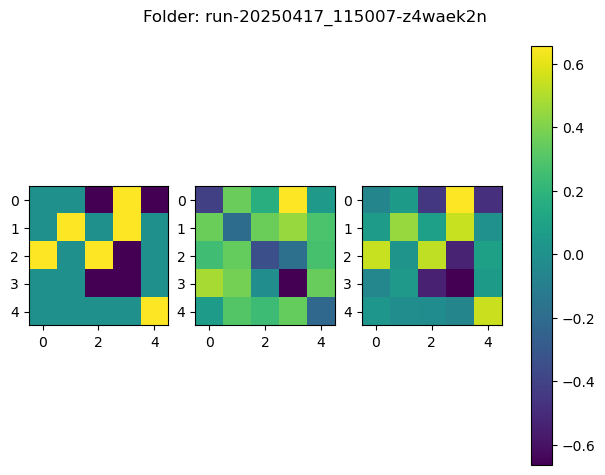

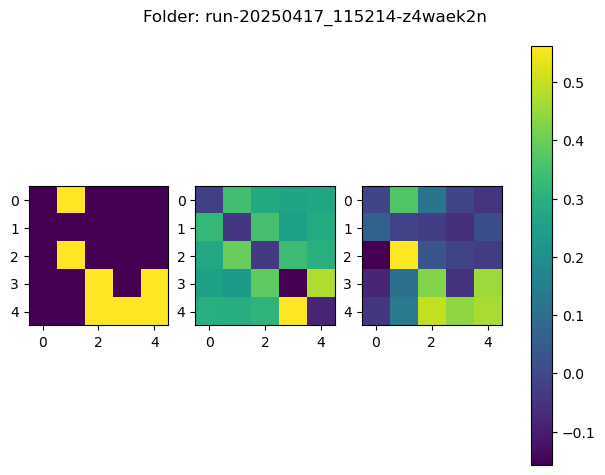

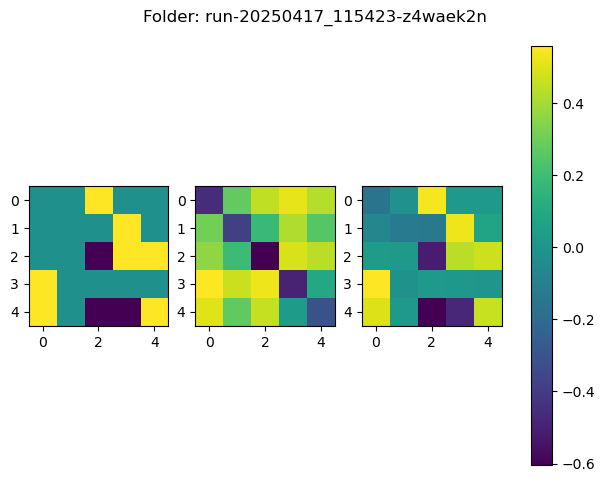

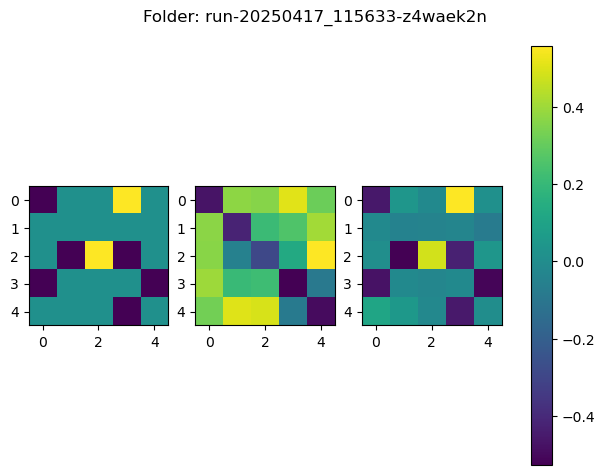

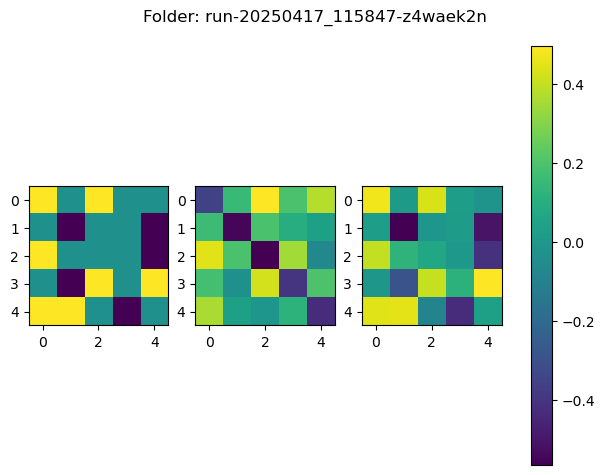

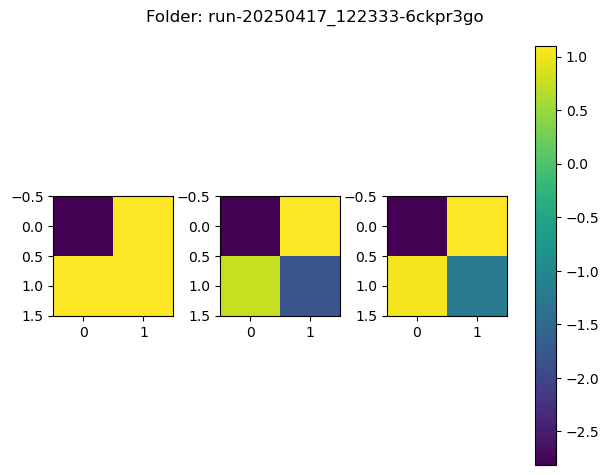

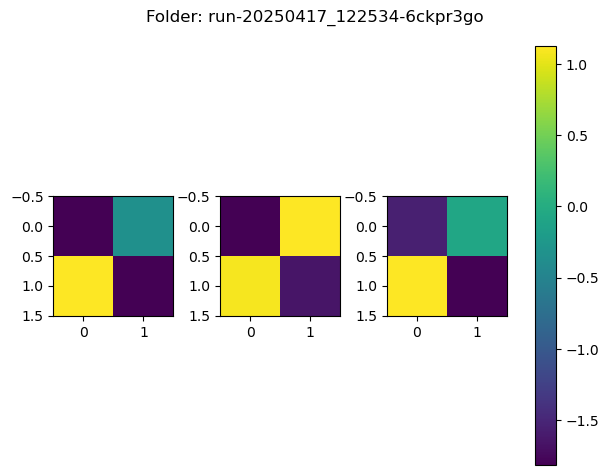

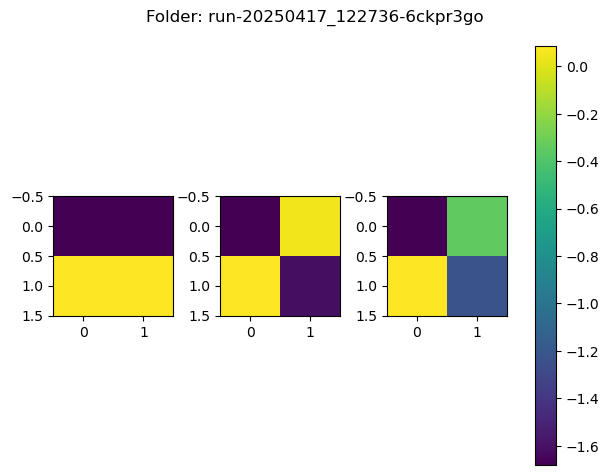

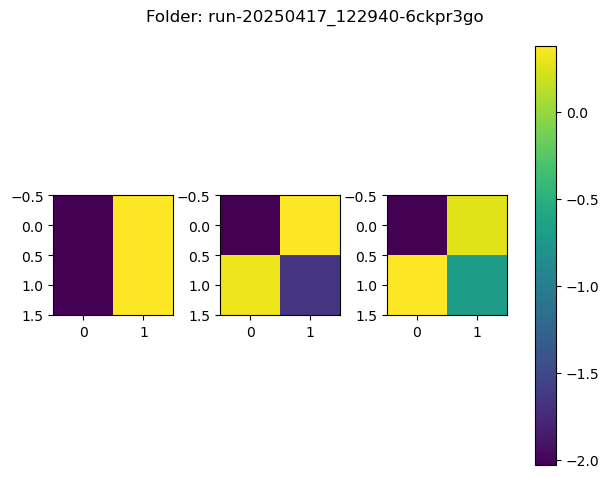

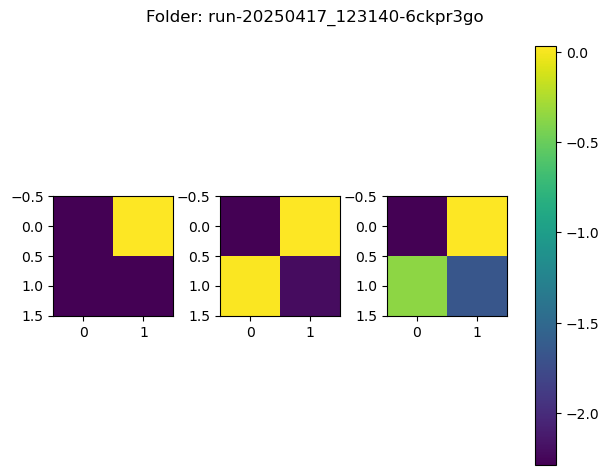

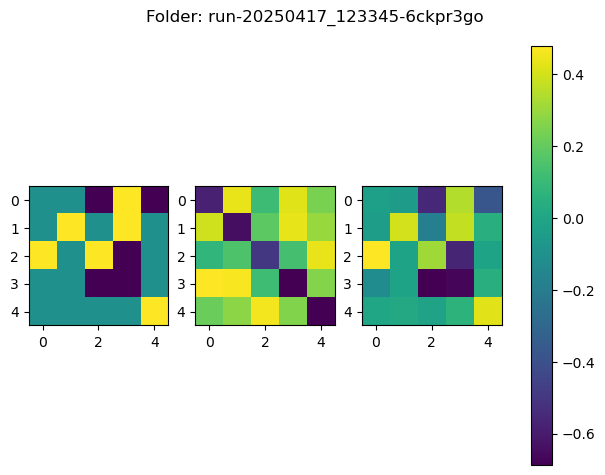

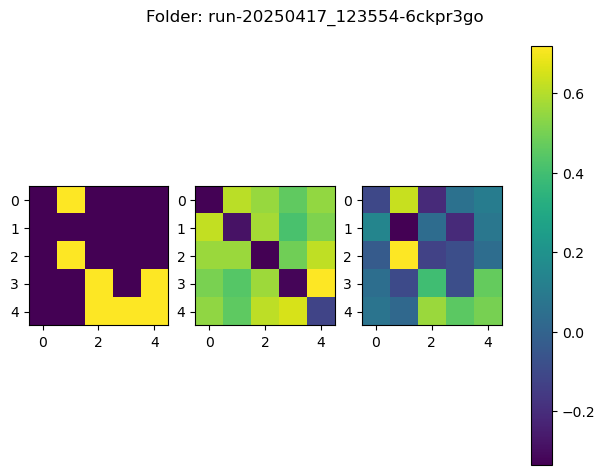

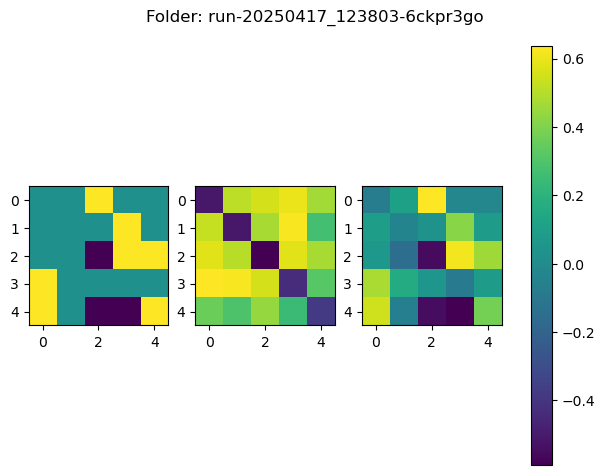

KeyboardInterrupt: 

In [161]:
for folder in As.keys():
    A = As[folder]['A']
    A_grit = As[folder]['A_grit']
    A_appex = As[folder]['A_appex']
    fig, axes = plt.subplots(nrows=1, ncols=3)
    im = axes[0].imshow(A)
    im = axes[1].imshow(A_grit)
    im = axes[2].imshow(A_appex)
    fig.suptitle(f"Folder: {folder}")
    fig.tight_layout()
    fig.colorbar(im, ax=axes.ravel().tolist())
    plt.show()
    